# Seepage analysis using Finite Difference Method


## Gauss-Seidel iteration

In [ ]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
## Dam
ldam = 200
rdam = 240

## Head
h = np.zeros([80, 440])
lhead = 105
rhead = 80

# Left head
h[0, 0:ldam]= lhead
# Right head
h[0, (ldam + 1):439]= rhead

# Error and tolerance
tolerance = 1.E-9
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

# Gauss-Seidel iteration
while error > tolerance:
    step = step + 1
    # Copy the head grid to residual
    residual = h.copy()
    
    for i in range(0, nrows):
        for j in range(0, ncols):
            # Top left side of dam boundary assign head
            if i == 0 and j <= (ldam + 1):
                h[i,j] = lhead
            
            # Top boundary beneath the dam
            elif i == 0 and j > (ldam + 1) and j < (rdam + 1):
                h[i,j] = (h[i,j-1]+h[i,j+1]+2*h[i+1,j])/4;
            
            # Top right side of dam boundary assign head
            elif i == 0 and j > (rdam):
                h[i,j]= rhead
                
            # Left boundary
            elif j == 0 and i > 0 and i < (nrows -1):
                h[i,j]=(h[i-1,j]+h[i+1,j]+2*h[i,j+1])/4

            # Right boundary
            elif j == (ncols -1) and i > 0 and i < (nrows - 1):
                h[i,j]=(2*h[i,j-1]+h[i-1,j]+h[i+1,j])/4
            
            # Left bottom corner
            elif i == (nrows -1) and j == 0:
                h[i,j]=(h[i-1,j]+h[i,j+1])/2
            
            # Bottom boundary
            elif i == (nrows -1) and j > 0 and j < (ncols - 1):
                h[i,j]=(h[i,j-1]+h[i,j+1]+2*h[i-1,j])/4
            
            # Right bottom corner
            elif i == (nrows -1) and  j == (ncols -1):
                h[i,j]=(h[i,j-1]+h[i-1,j])/2
            
            # Domain
            else:
                h[i,j]=(h[i-1,j]+h[i+1,j]+h[i,j-1]+h[i,j+1])/4
    
    # Error
    error = (np.square(np.subtract(h, residual))).max()

print('# of steps: %d, error: %le' %(step, error))
plt.contour(np.flipud(h), levels=10)

In [ ]:
plt.contour(np.flipud(h))

## Jacobi iteration

# of steps: 23645, error: 9.998400e-11


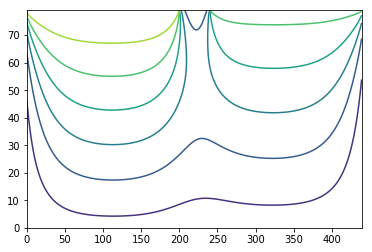

In [5]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
rows = 80
cols = 440

## Dam
ldam = 200
rdam = 240

## Head
h = np.zeros([rows, cols])
lhead = 105
rhead = 80

# Left head
h[0,0:ldam]= lhead
# Right head
h[0,(ldam+1):(cols-1)]= rhead

# Error and tolerance
tolerance = 1.E-10
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

# Jacobi iteration
while error > tolerance:
    # Number of steps
    step = step + 1
    
    # Copy the head grid to residual
    residual = h.copy()
    
    # Finite Difference Method
    # Apply boundary conditions
    h[0,:ldam] = lhead     # top left
    h[0, (rdam+1):]= rhead # top right
        
    # h[i, j] = (h[i-1, j] + h[i, j-1] + h[i, j+1] + h[i+1, j]) / 4
    # Define a kernel function with active neighbours
    k = generate_binary_structure(2, 1)
    k[1, 1] = False
    
    # Use convolution instead of loop iteration
    # https://en.wikipedia.org/wiki/Convolution
    h = convolve(h, k, mode='constant', cval=0.0)
    h *= 0.25
    # h[1:(nrows-2),1:(ncols-2)] = B[1:(nrows-2),1:(ncols-2)].copy()
        
    # Apply boundary conditions
    # Top left side of dam boundary assign head
    # if i == 0 and j < ldam + 2:
    h[0,:ldam] = lhead
                
    # Top right side of dam boundary assign head
    # elif i == 0 and j > rdam:
    h[0, (rdam+1):]= rhead
    
    # Top boundary beneath the dam
    for j in range((ldam+1), rdam):
        h[0,j] = (h[0, j-1] + 2 * h[1, j] + h[0, j+1]) / 4;

    # Bottom boundary
    for j in range(1, (ncols-2)):
        h[(nrows -1), j] = (h[(nrows-1), j-1] +
                            2 * h[nrows-2, j] + 
                            h[(nrows-1), j+1]) / 4

    # Left boundary
    for i in range(1, (nrows-2)):
        h[i, 0] = (h[i-1, 0] + 2 * h[i, 1] + h[i+1, 0]) / 4
        
    # Right boundary
    for i in range(1, (nrows-2)):
        h[i, (ncols -1)] = (2 * h[i, (ncols-2)] + 
                                h[i-1, (ncols-1)] + 
                                h[i+1, (ncols-1)]) / 4
        
    # Left bottom corner (i == (nrows -1) and j == 0):
    # h[i,j]=(h[i-1,j]+h[i,j+1])/2
    h[(nrows-1), 0] = (h[nrows-2, 0] + h[(nrows-1), 1]) / 2
    
                
    # Right bottom corner (i == (nrows -1) and  j == (ncols -1))
    # h[i,j]=(h[i,j-1]+h[i-1,j])/2
    h[(nrows-1), (ncols-1)] = (h[(nrows-1), (ncols-2)] + 
                               h[(nrows-2), (ncols-1)]) / 2

                
    error = (np.square(np.subtract(h, residual))).max()
    
print('# of steps: %d, error: %le' %(step, error))
plt.contour(np.flipud(h), levels=10)

## Naive Jacobi

1 11025.0
2 689.0625
3 172.265625
4 67.291259765625
5 43.06640625
6 24.224853515625
7 17.890669405460358
8 13.43788057565689
9 10.288377315737307
10 8.023858442902565
11 6.364627949460555
12 5.126015278165141
13 4.185090713521333
14 3.678302384930859
15 3.2398019111632217
16 2.8615611487724024
17 2.535449931130295
18 2.253963244898687
19 2.0104795610361745
20 1.7992967785038445
21 1.6155697477738722
22 1.455210876418831
23 1.3147834299499197
24 1.1914009242732215
25 1.082637862780406
26 1.0092605046609255
27 0.9416202409833662
28 0.8792961459488374
29 0.8218747641033721
30 0.7689596140019648
31 0.7201766376298251
32 0.6751769384279745
33 0.6336377322551578
34 0.5952621459262945
35 0.5597782973349046
36 0.5269379521754223
37 0.4965149560123369
38 0.46830357383312726
39 0.44211682323035434
40 0.4177848557171498
41 0.395153419032016
42 0.37815958106797887
43 0.36202607435647466
44 0.3467102043316369
45 0.33217020529385866
46 0.31836554373204834
47 0.3052571279145439
48 0.2928074448677486


347 0.005393036951906244
348 0.005361596615115605
349 0.005330386322223153
350 0.005299404165531818
351 0.00526864825294057
352 0.005238116707867897
353 0.0052078076691764105
354 0.005177719291095489
355 0.005147849743140995
356 0.005118197210039248
357 0.00508875989163489
358 0.005059536002816363
359 0.005030523773427373
360 0.005001721448177723
361 0.004973127286560546
362 0.004944739562761818
363 0.004916556565567313
364 0.004888576598280962
365 0.004860797978622693
366 0.004835181169565385
367 0.004809730279263876
368 0.004784444149169969
369 0.004759321627322567
370 0.004734361568377555
371 0.004709562833628472
372 0.004684924291034699
373 0.004660444815232759
374 0.004636123287560064
375 0.004611958596066281
376 0.004587949635526958
377 0.004564095307456515
378 0.004540394520113405
379 0.004516846188507632
380 0.004493449234409616
381 0.004470202586348037
382 0.004447105179613923
383 0.004424155956259498
384 0.004401353865098519
385 0.004378697861700534
386 0.004356186908385729
3

670 0.0014418987129981044
671 0.0014375272450034143
672 0.0014331724394569371
673 0.0014288342242016726
674 0.0014245125273912756
675 0.001420207277486649
676 0.0014159184032573725
677 0.001411645833780444
678 0.0014073894984390236
679 0.0014031493269211844
680 0.001398925249220793
681 0.0013947171956351912
682 0.0013905250967634229
683 0.001386348883509232
684 0.001382188487074517
685 0.0013780438389691914
686 0.0013741317221668597
687 0.0013702333227838858
688 0.001366348588386818
689 0.0013624774667130154
690 0.0013586199056717083
691 0.0013547758533426959
692 0.001350945257977659
693 0.00134712806800016
694 0.001343324232005633
695 0.001339533698759817
696 0.0013357564172044652
697 0.0013319923364484838
698 0.001328241405775714
699 0.0013245035746423017
700 0.00132077879267512
701 0.0013170670096743266
702 0.0013133681756122909
703 0.0013096822406335569
704 0.0013060091550542892
705 0.0013023488693632572
706 0.0012987013342222985
707 0.0012950665004642162
708 0.0012914443190942656


990 0.0007648837241812306
991 0.0007630513776640561
992 0.0007622505444508729
993 0.0007604287178175185
994 0.0007596283144566905
995 0.0007578169415158948
996 0.0007570169841835396
997 0.0007552159992029498
998 0.0007544165038156417
999 0.0007526258415176947
1000 0.0007518268237360487
1001 0.0007500464192946565
1002 0.0007492478945270809
1003 0.0007474776835660827
1004 0.0007466796669719193
1005 0.0007449195855590743
1006 0.0007441220920523003
1007 0.0007423720766981646
1008 0.0007415751209508715
1009 0.0007398351086041939
1010 0.0007390387050496553
1011 0.0007373086330958914
1012 0.0007365127959323796
1013 0.0007347926021887387
1014 0.0007339973453821584
1015 0.0007322869680949944
1016 0.0007314923053826501
1017 0.000729791683225247
1018 0.0007289976281188147
1019 0.0007273067001868819
1020 0.0007265132659755517
1021 0.0007248319717852365
1022 0.0007240391715386402
1023 0.0007223674510232101
1024 0.0007215752975941364
1025 0.0007199130911003007
1026 0.0007191215971291074
1027 0.00071

1298 0.00046287821660196234
1299 0.00046209825840843677
1300 0.00046145541587508263
1301 0.0004606796352524414
1302 0.0004600380204964285
1303 0.0004592663937399107
1304 0.00045862600635545605
1305 0.0004578585099093586
1306 0.00045721934946105723
1307 0.0004564559599186105
1308 0.00045581802594162263
1309 0.00045505872004425793
1310 0.0004544220120438894
1311 0.0004536667666786944
1312 0.00045303128413330906
1313 0.00045228007633261595
1314 0.00045164581869199417
1315 0.0004508986256329695
1316 0.00045026559231879106
1317 0.0004495223913221232
1318 0.00044889058172935053
1319 0.00044815135025824487
1320 0.0004475207637546913
1321 0.00044678547941297123
1322 0.00044615611534007507
1323 0.000445424755872995
1324 0.0004447966135465863
1325 0.00044406915683893974
1326 0.0004434422355482062
1327 0.00044271865962274785
1328 0.00044209295863309515
1329 0.000441373241649568
1330 0.0004407487602006829
1331 0.0004400328804563437
1332 0.00043940961776355
1333 0.00043869755369100834
1334 0.000438

1600 0.00029992885000561215
1601 0.0002995407143543864
1602 0.0002991369088201146
1603 0.00029875967717531046
1604 0.0002983475452601158
1605 0.0002979811434051588
1606 0.00029756074952203113
1607 0.0002972051037189106
1608 0.0002967765118425579
1609 0.0002964315488297389
1610 0.0002959948225002331
1611 0.0002956604694895986
1612 0.0002952156718155132
1613 0.0002948918564878578
1614 0.00029443905014865814
1615 0.0002941257006521318
1616 0.0002936649479020149
1617 0.00029336199284765095
1618 0.0002928933555179044
1619 0.00029260072397711747
1620 0.00029212426347992527
1621 0.0002918418849808065
1622 0.0002913576623110928
1623 0.00029108546683569603
1624 0.0002906052341684377
1625 0.000290331460557508
1626 0.0002898628205398403
1627 0.000289579857196688
1628 0.0002891227328524786
1629 0.0002888306478419023
1630 0.0002883849626827404
1631 0.00028808382361795933
1632 0.000287649501639145
1633 0.00028733937568639677
1634 0.000286916341363914
1635 0.0002865972952448605
1636 0.000286185473532

1900 0.0002086865653294911
1901 0.0002084533900698644
1902 0.0002082219590403625
1903 0.00020798844725526116
1904 0.00020775861966827237
1905 0.0002075247767588646
1906 0.00020729654327584016
1907 0.0002070623745988672
1908 0.00020683572593774548
1909 0.0002066012368079445
1910 0.00020637616374314294
1911 0.00020614135943218716
1912 0.0002059178527931667
1913 0.00020568273853003934
1914 0.00020546659459495483
1915 0.00020522537017429854
1916 0.0002050177934811181
1917 0.0002047692504508474
1918 0.00020457019103815519
1919 0.00020431437545841022
1920 0.00020412378363925278
1921 0.0002038607413099337
1922 0.00020367856767021134
1923 0.00020340834413071568
1924 0.000203234539527379
1925 0.00020295718005938038
1926 0.00020279169561903895
1927 0.00020250724524864503
1928 0.00020235003236597946
1929 0.00020205853586244488
1930 0.00020190954619923242
1931 0.0002016110480791308
1932 0.00020147023356186132
1933 0.00020117333276461439
1934 0.00020103209090852062
1935 0.0002007368617056115
1936 0

2198 0.0001533417239786467
2199 0.00015324354751303609
2200 0.00015305140688693319
2201 0.0001529476124369793
2202 0.000152761765476033
2203 0.00015265238270570515
2204 0.00015247279801441314
2205 0.00015235785644187824
2206 0.00015218450277506017
2207 0.00015206403177419565
2208 0.00015189687803564446
2209 0.00015177090683544402
2210 0.0001516099220779831
2211 0.00015147847976424016
2212 0.00015132363318890487
2213 0.00015118674870449026
2214 0.00015103800965901403
2215 0.00015089571180485224
2216 0.00015075304978355515
2217 0.00015060536721959615
2218 0.00015046875186292428
2219 0.00015031571310789176
2220 0.00015018511420073898
2221 0.00015002674763379617
2222 0.00014990213510644314
2223 0.00014973846896763272
2224 0.000149619812892682
2225 0.00014945087528354012
2226 0.00014933814587686007
2227 0.00014916396476120068
2228 0.00014905713238130226
2229 0.00014887773558582498
2230 0.00014877677073220038
2231 0.00014859218594709698
2232 0.00014849705926029772
2233 0.00014830731404037525

2497 0.00011728368289948193
2498 0.00011721738258293458
2499 0.0001170883981995977
2500 0.00011702195416674443
2501 0.00011689352297710371
2502 0.00011682693670072094
2503 0.00011669905630109278
2504 0.0001166323292450181
2505 0.00011650499724355781
2506 0.00011643813086256297
2507 0.00011631134487800475
2508 0.00011624434061797605
2509 0.00011611809828036932
2510 0.00011605095757879316
2511 0.00011592525652855218
2512 0.00011585798081346919
2513 0.00011573281870241501
2514 0.00011566540939321252
2515 0.0001155407838839293
2516 0.00011547324239167249
2517 0.0001153491511565614
2518 0.00011528147888401795
2519 0.00011515791960740541
2520 0.00011509011794739268
2521 0.00011496708832382018
2522 0.0001148991586618253
2523 0.0001147766563960206
2524 0.0001147086001086995
2525 0.00011458836722704564
2526 0.00011451844137166515
2527 0.00011440266107407511
2528 0.0001143286815364811
2529 0.00011421733504326323
2530 0.00011413931969116242
2531 0.00011403238829972695
2532 0.00011395035492582357


2798 9.282489704622788e-05
2799 9.277182184625e-05
2800 9.26930749072952e-05
2801 9.263878690892198e-05
2802 9.256149846597357e-05
2803 9.250714463891272e-05
2804 9.24301672364491e-05
2805 9.237574838341027e-05
2806 9.229908073401452e-05
2807 9.224459765341571e-05
2808 9.216823847424829e-05
2809 9.211369195954524e-05
2810 9.203763997403769e-05
2811 9.198303081421383e-05
2812 9.190728475089464e-05
2813 9.185261373040478e-05
2814 9.177717232336354e-05
2815 9.172244022194147e-05
2816 9.164730221020295e-05
2817 9.159250980348606e-05
2818 9.151767393228967e-05
2819 9.146282199094585e-05
2820 9.138828701016756e-05
2821 9.133337630024812e-05
2822 9.125914096561149e-05
2823 9.120417224883466e-05
2824 9.113023532121761e-05
2825 9.10752093553867e-05
2826 9.100156960067317e-05
2827 9.094648713833136e-05
2828 9.087314332794142e-05
2829 9.081800511787563e-05
2830 9.074495602902206e-05
2831 9.068976281491895e-05
2832 9.061700722896957e-05
2833 9.056175975105241e-05
2834 9.04892964552776e-05
2835 9.0

3107 7.56507214104072e-05
3108 7.560656665280155e-05
3109 7.555827989763262e-05
3110 7.551429624209618e-05
3111 7.546599591696257e-05
3112 7.542218266069081e-05
3113 7.537386917878188e-05
3114 7.533022562198793e-05
3115 7.528189939430292e-05
3116 7.523947472253823e-05
3117 7.519008627500918e-05
3118 7.515039126272687e-05
3119 7.509842953265526e-05
3120 7.506145555606526e-05
3121 7.500692887975899e-05
3122 7.497266734162896e-05
3123 7.491558402898474e-05
3124 7.488402635901478e-05
3125 7.482439469381986e-05
3126 7.479553234784824e-05
3127 7.473336058783568e-05
3128 7.470718504852105e-05
3129 7.464248142548598e-05
3130 7.461898420145293e-05
3131 7.455175692149153e-05
3132 7.453092954758277e-05
3133 7.446306180244242e-05
3134 7.444302082842909e-05
3135 7.437535037117927e-05
3136 7.435525778529234e-05
3137 7.428778389212262e-05
3138 7.426764016054209e-05
3139 7.420036210995796e-05
3140 7.418016769657402e-05
3141 7.411308477024867e-05
3142 7.40928401361775e-05
3143 7.404464358427242e-05
314

3414 6.730167092512187e-05
3415 6.728214046238227e-05
3416 6.726262044144772e-05
3417 6.724310881405021e-05
3418 6.722360762318665e-05
3419 6.720411480912637e-05
3420 6.718463242639385e-05
3421 6.71651584036277e-05
3422 6.714569480687329e-05
3423 6.712623955355277e-05
3424 6.710679472081828e-05
3425 6.708735821488194e-05
3426 6.70679321241709e-05
3427 6.704851434346096e-05
3428 6.702910697279688e-05
3429 6.700970789546646e-05
3430 6.699031922289278e-05
3431 6.697093882670783e-05
3432 6.695156883011352e-05
3433 6.693220709309269e-05
3434 6.691285575050308e-05
3435 6.689351265068499e-05
3436 6.68741799400291e-05
3437 6.685485545523992e-05
3438 6.683554135458305e-05
3439 6.681623546278527e-05
3440 6.679693995003839e-05
3441 6.677765262921453e-05
3442 6.675837568225068e-05
3443 6.673910691040325e-05
3444 6.671984850734767e-05
3445 6.670059826226706e-05
3446 6.668135838091682e-05
3447 6.666212664070368e-05
3448 6.664290525910798e-05
3449 6.66236920013609e-05
3450 6.660551115248884e-05
3451 

3722 6.273148393383473e-05
3723 6.272072132042271e-05
3724 6.270996116194552e-05
3725 6.269919897420281e-05
3726 6.268904758885462e-05
3727 6.26793420180082e-05
3728 6.266963321983524e-05
3729 6.265992573058855e-05
3730 6.265021501060622e-05
3731 6.264050561748425e-05
3732 6.263079299021734e-05
3733 6.26210817077376e-05
3734 6.261136718759099e-05
3735 6.260165403037599e-05
3736 6.25919376319158e-05
3737 6.258222261424325e-05
3738 6.257250435180326e-05
3739 6.25627874881121e-05
3740 6.255306737607494e-05
3741 6.254334868079668e-05
3742 6.253362673336896e-05
3743 6.252390622070293e-05
3744 6.251418245219627e-05
3745 6.250446013650299e-05
3746 6.249473456105317e-05
3747 6.248501045657339e-05
3748 6.247528308836495e-05
3749 6.246555720927592e-05
3750 6.245582806248613e-05
3751 6.244610042278927e-05
3752 6.243636951147574e-05
3753 6.242664012538978e-05
3754 6.241690746343441e-05
3755 6.240717634494621e-05
3756 6.239744194650436e-05
3757 6.23877091095935e-05
3758 6.237797298864476e-05
3759 6

4029 6.074808723974658e-05
4030 6.074516240176875e-05
4031 6.0742234296861415e-05
4032 6.07392940768295e-05
4033 6.0736350624724075e-05
4034 6.073339505606578e-05
4035 6.073043629035609e-05
4036 6.072746540667103e-05
4037 6.072497857036236e-05
4038 6.072256516978727e-05
4039 6.072013907661689e-05
4040 6.071770930729091e-05
4041 6.071526684454428e-05
4042 6.071282074149784e-05
4043 6.0710361943935326e-05
4044 6.0707899541985435e-05
4045 6.070542444437544e-05
4046 6.070294577823639e-05
4047 6.07004544151892e-05
4048 6.06979595196939e-05
4049 6.069545192599376e-05
4050 6.0692940835761526e-05
4051 6.069041704592371e-05
4052 6.068788979563694e-05
4053 6.068534984435051e-05
4054 6.0682806468643934e-05
4055 6.06806420435244e-05
4056 6.06786039012911e-05
4057 6.067656186757521e-05
4058 6.067450660289523e-05
4059 6.0672447483641895e-05
4060 6.067037513229742e-05
4061 6.066829896323583e-05
4062 6.066620956101897e-05
4063 6.0664116377832834e-05
4064 6.0662009960213484e-05
4065 6.065989979870698e-

4332 6.041628135377205e-05
4333 6.04146217580563e-05
4334 6.041294537477312e-05
4335 6.041126805695153e-05
4336 6.040957394219505e-05
4337 6.040787893859716e-05
4338 6.0406167128596224e-05
4339 6.040445447556328e-05
4340 6.0402725006613666e-05
4341 6.040099474044333e-05
4342 6.039924764863152e-05
4343 6.039749980541211e-05
4344 6.039573512694655e-05
4345 6.03939697429435e-05
4346 6.039218751382321e-05
4347 6.03904046250924e-05
4348 6.038860488143814e-05
4349 6.038680452410197e-05
4350 6.038498730176965e-05
4351 6.038316951185122e-05
4352 6.038133484681836e-05
4353 6.037949966024142e-05
4354 6.037764758844135e-05
4355 6.0375795041140626e-05
4356 6.037392559846243e-05
4357 6.037205572632835e-05
4358 6.037016894839593e-05
4359 6.036828178727447e-05
4360 6.036637770999855e-05
4361 6.036447329569122e-05
4362 6.0362551954717164e-05
4363 6.0360630322925654e-05
4364 6.035869175385423e-05
4365 6.035675294029076e-05
4366 6.035479717884364e-05
4367 6.035284121917566e-05
4368 6.035086830080892e-05

4635 5.954598278010513e-05
4636 5.9542013357538654e-05
4637 5.9538050331054684e-05
4638 5.953406812520841e-05
4639 5.953009236666293e-05
4640 5.952609740668376e-05
4641 5.952210894554546e-05
4642 5.951810126063651e-05
4643 5.9514100126156145e-05
4644 5.951007974557671e-05
4645 5.950606596684189e-05
4646 5.950203291974293e-05
4647 5.949800652595215e-05
4648 5.949396084143107e-05
4649 5.948992186183883e-05
4650 5.948586356893946e-05
4651 5.9481812032527376e-05
4652 5.94777411601851e-05
4653 5.9473677096100336e-05
4654 5.946959367325167e-05
4655 5.9465517110368476e-05
4656 5.9461421166060617e-05
4657 5.9457332133418624e-05
4658 5.945322369653541e-05
4659 5.9449122223010886e-05
4660 5.944500132227279e-05
4661 5.944088743674293e-05
4662 5.9436754101035724e-05
4663 5.943262783232384e-05
4664 5.942848209036987e-05
4665 5.942434346724534e-05
4666 5.942018534765825e-05
4667 5.9416034398891276e-05
4668 5.941186393034033e-05
4669 5.940770068453755e-05
4670 5.940351789569277e-05
4671 5.93993423816

4938 5.808475826876864e-05
4939 5.807918016164399e-05
4940 5.807357864101336e-05
4941 5.806799173976317e-05
4942 5.80623813911537e-05
4943 5.805678571867018e-05
4944 5.8051166564984594e-05
4945 5.804556214426493e-05
4946 5.803993420834851e-05
4947 5.8034321062224116e-05
4948 5.8028684366972964e-05
4949 5.8023062518217806e-05
4950 5.8017417086308176e-05
4951 5.8011786557746985e-05
4952 5.800613241190593e-05
4953 5.800049322625179e-05
4954 5.7994830389203004e-05
4955 5.798918256921974e-05
4956 5.798351106352119e-05
4957 5.7977854631969175e-05
4958 5.797217448033776e-05
4959 5.7966509459703394e-05
4960 5.79608206844739e-05
4961 5.795514709751065e-05
4962 5.79494497215013e-05
4963 5.7943767590580484e-05
4964 5.7938061636065114e-05
4965 5.7932370983825034e-05
4966 5.792665647345264e-05
4967 5.792095732236579e-05
4968 5.791523427834922e-05
4969 5.7909526650884595e-05
4970 5.790379509570358e-05
4971 5.7898079014164407e-05
4972 5.789233897018703e-05
4973 5.788661445703518e-05
4974 5.7880865946

5241 5.621460172999389e-05
5242 5.620790526602982e-05
5243 5.62012323219005e-05
5244 5.619453006805831e-05
5245 5.618785139498494e-05
5246 5.6181143368739606e-05
5247 5.617445898423169e-05
5248 5.616774520294678e-05
5249 5.616105512450889e-05
5250 5.6154335605756033e-05
5251 5.6147639850781255e-05
5252 5.6140914611914173e-05
5253 5.613421319789714e-05
5254 5.6127482256317826e-05
5255 5.612077520064171e-05
5256 5.611403857369398e-05
5257 5.610732589363051e-05
5258 5.610058359854682e-05
5259 5.609386531152244e-05
5260 5.6087117365636714e-05
5261 5.608039348896643e-05
5262 5.6073639909394784e-05
5263 5.606691046028218e-05
5264 5.606015126445504e-05
5265 5.6053416260151924e-05
5266 5.604665146506909e-05
5267 5.6039910922769076e-05
5268 5.603314054574459e-05
5269 5.602639448268947e-05
5270 5.6019618540660037e-05
5271 5.601286697382068e-05
5272 5.6006085483984e-05
5273 5.599932843064536e-05
5274 5.5992541410034584e-05
5275 5.598577888715753e-05
5276 5.597898635285399e-05
5277 5.5972218377553

5544 5.4076393717680774e-05
5545 5.406903693926228e-05
5546 5.4061643733751705e-05
5547 5.4054283532130406e-05
5548 5.404688685321883e-05
5549 5.403952324154412e-05
5550 5.403212310208468e-05
5551 5.402475609355313e-05
5552 5.4017352506759556e-05
5553 5.400998211445813e-05
5554 5.40025750933302e-05
5555 5.3995201330288596e-05
5556 5.398779088787323e-05
5557 5.398041376722047e-05
5558 5.397299991661174e-05
5559 5.396561945131515e-05
5560 5.3958202205497627e-05
5561 5.3950818408467254e-05
5562 5.394339778042048e-05
5563 5.393601066477007e-05
5564 5.3928586667259785e-05
5565 5.392119624588926e-05
5566 5.391376889214577e-05
5567 5.3906375177949955e-05
5568 5.389894448052025e-05
5569 5.38915474864411e-05
5570 5.388411345838884e-05
5571 5.3876713197258884e-05
5572 5.3869275851381825e-05
5573 5.38618723360807e-05
5574 5.385443168517159e-05
5575 5.384702492852171e-05
5576 5.383958098536823e-05
5577 5.383217100018694e-05
5578 5.38247237774675e-05
5579 5.381731057646281e-05
5580 5.38098600871114

5847 5.1777058585897095e-05
5848 5.176927584186849e-05
5849 5.1761535763276735e-05
5850 5.175375125837076e-05
5851 5.174600948295236e-05
5852 5.17382232269664e-05
5853 5.173047976449428e-05
5854 5.1722691767016686e-05
5855 5.1714946627156985e-05
5856 5.170715689777162e-05
5857 5.169941009013484e-05
5858 5.1691618638523245e-05
5859 5.168387017276643e-05
5860 5.1676077008605586e-05
5861 5.166832689433014e-05
5862 5.166053202708819e-05
5863 5.165278027389099e-05
5864 5.164498371323586e-05
5865 5.1637230330658186e-05
5866 5.162943208604902e-05
5867 5.162167708357658e-05
5868 5.16138771646212e-05
5869 5.1606120551888344e-05
5870 5.159831896803691e-05
5871 5.159056075452029e-05
5872 5.158275751532055e-05
5873 5.157499771039027e-05
5874 5.156719282528341e-05
5875 5.155943143850921e-05
5876 5.155162491703397e-05
5877 5.154386195777695e-05
5878 5.153605380926349e-05
5879 5.152828928708436e-05
5880 5.1520479521011414e-05
5881 5.151271344526229e-05
5882 5.1504902070849116e-05
5883 5.1497134450928

6149 4.940405971403404e-05
6150 4.9396110259599654e-05
6151 4.938821305939786e-05
6152 4.938026309930969e-05
6153 4.9372365456055284e-05
6154 4.936441499725634e-05
6155 4.935651691796677e-05
6156 4.93485659676958e-05
6157 4.934066745938471e-05
6158 4.933271602457715e-05
6159 4.932481709425439e-05
6160 4.93168651818419e-05
6161 4.930896583631396e-05
6162 4.9301013453424065e-05
6163 4.9293113699793054e-05
6164 4.9285160853050585e-05
6165 4.92772606984148e-05
6166 4.926930739493974e-05
6167 4.926140684599463e-05
6168 4.925345309280341e-05
6169 4.9245552156440253e-05
6170 4.9237597960545496e-05
6171 4.922969664375152e-05
6172 4.9221742011862945e-05
6173 4.92138403215219e-05
6174 4.9205885260644637e-05
6175 4.9197983203636525e-05
6176 4.9190027720472905e-05
6177 4.918212530357434e-05
6178 4.9174169405122024e-05
6179 4.916626663530519e-05
6180 4.91583103282591e-05
6181 4.915040721229315e-05
6182 4.914245050374308e-05
6183 4.913454704829382e-05
6184 4.912658994482767e-05
6185 4.91186861568560

6452 4.6999817607078823e-05
6453 4.699192490547393e-05
6454 4.698397113744981e-05
6455 4.697607889337528e-05
6456 4.696812552867283e-05
6457 4.696023374705497e-05
6458 4.695228079081756e-05
6459 4.694438947667705e-05
6460 4.693643693375285e-05
6461 4.692854609191266e-05
6462 4.692059396743898e-05
6463 4.691270360301114e-05
6464 4.690475190173287e-05
6465 4.689686201953441e-05
6466 4.688891074668013e-05
6467 4.68810213517197e-05
6468 4.687307051202839e-05
6469 4.686518160921439e-05
6470 4.685723120790852e-05
6471 4.684934280204905e-05
6472 4.684139284366716e-05
6473 4.6833504939859195e-05
6474 4.682555542932601e-05
6475 4.681766803237174e-05
6476 4.680971897480349e-05
6477 4.680183208950215e-05
6478 4.6793883489817543e-05
6479 4.6785997121159865e-05
6480 4.677804898408023e-05
6481 4.677016313666518e-05
6482 4.676221546720056e-05
6483 4.675433014611012e-05
6484 4.6746382948975986e-05
6485 4.6738498158997647e-05
6486 4.673055143919805e-05
6487 4.672266718511632e-05
6488 4.671472094736092e

6754 4.462191235779466e-05
6755 4.461413909131761e-05
6756 4.460629683536927e-05
6757 4.459852465892107e-05
6758 4.459068344251682e-05
6759 4.4582912359565665e-05
6760 4.457507218619558e-05
6761 4.4567302200302246e-05
6762 4.45594630733592e-05
6763 4.455169418789238e-05
6764 4.4543856111051513e-05
6765 4.4536088329377634e-05
6766 4.4528251306027194e-05
6767 4.452048463151041e-05
6768 4.451264866484676e-05
6769 4.4504883101038605e-05
6770 4.4497048194824716e-05
6771 4.448928374508476e-05
6772 4.4481449902607224e-05
6773 4.4473686570387544e-05
6774 4.446585379521503e-05
6775 4.445809158377588e-05
6776 4.445025987900098e-05
6777 4.444249879188466e-05
6778 4.443466816116621e-05
6779 4.442690820162845e-05
6780 4.4419078648244035e-05
6781 4.441131981963309e-05
6782 4.4403491347236886e-05
6783 4.439573365289873e-05
6784 4.4387906264574385e-05
6785 4.438014970794745e-05
6786 4.437232340706051e-05
6787 4.436456799139158e-05
6788 4.435674278149466e-05
6789 4.434898851002832e-05
6790 4.4341164394

7057 4.228407203968697e-05
7058 4.227642166405855e-05
7059 4.226884905259878e-05
7060 4.226120015332385e-05
7061 4.2253629065659125e-05
7062 4.224598164480295e-05
7063 4.2238412083345757e-05
7064 4.223076614343381e-05
7065 4.2223198110410135e-05
7066 4.2215553653689045e-05
7067 4.2207987151415546e-05
7068 4.220034418022258e-05
7069 4.219277921092188e-05
7070 4.218513772768488e-05
7071 4.2177574293670215e-05
7072 4.216993430063067e-05
7073 4.21623724041213e-05
7074 4.215473390370357e-05
7075 4.214717354691706e-05
7076 4.213953654117473e-05
7077 4.213197772660372e-05
7078 4.2124342217957726e-05
7079 4.2116784947631905e-05
7080 4.2109150938501416e-05
7081 4.210159521472553e-05
7082 4.2093962707343536e-05
7083 4.208640853232841e-05
7084 4.2078777528649686e-05
7085 4.2071224904696704e-05
7086 4.206359540750402e-05
7087 4.205604433682063e-05
7088 4.204841634797325e-05
7089 4.2040866832765266e-05
7090 4.203324035476595e-05
7091 4.202569239723753e-05
7092 4.201806743231086e-05
7093 4.201052103

7360 4.001433363272548e-05
7361 4.000701379818046e-05
7362 3.999961130972703e-05
7363 3.999229328018745e-05
7364 3.99848925576218e-05
7365 3.997757633427776e-05
7366 3.997017737916823e-05
7367 3.996286296347827e-05
7368 3.995546577730206e-05
7369 3.994815317081331e-05
7370 3.994075775504637e-05
7371 3.993344695912504e-05
7372 3.992605331542167e-05
7373 3.991874433152256e-05
7374 3.991135246108681e-05
7375 3.990404529066351e-05
7376 3.989665519505741e-05
7377 3.9889349839562264e-05
7378 3.9881961520256786e-05
7379 3.9874657981140904e-05
7380 3.986727143960579e-05
7381 3.985996971804986e-05
7382 3.985258495584333e-05
7383 3.984528505356522e-05
7384 3.983790207224418e-05
7385 3.98306039903325e-05
7386 3.9823222791093863e-05
7387 3.9815926531353624e-05
7388 3.980854711557253e-05
7389 3.980125267909004e-05
7390 3.97938750485887e-05
7391 3.9786582436897426e-05
7392 3.977920659286916e-05
7393 3.977191580732204e-05
7394 3.976454175131759e-05
7395 3.975725279317678e-05
7396 3.974988052647676e-0

7663 3.7826144826268796e-05
7664 3.7819023515637224e-05
7665 3.781199218007768e-05
7666 3.780487281339943e-05
7667 3.779784345433119e-05
7668 3.779072603256798e-05
7669 3.77836986510229e-05
7670 3.7776583174786096e-05
7671 3.7769557771445734e-05
7672 3.776244424186998e-05
7673 3.775542081758972e-05
7674 3.7748309235459354e-05
7675 3.7741287791006416e-05
7676 3.773417815710497e-05
7677 3.772715869342033e-05
7678 3.772005100887959e-05
7679 3.771303352672872e-05
7680 3.770592779215588e-05
7681 3.76989122922162e-05
7682 3.769180850865396e-05
7683 3.7684794991863823e-05
7684 3.767769315991775e-05
7685 3.767068162712738e-05
7686 3.766358174792558e-05
7687 3.765657219989709e-05
7688 3.7649474274130655e-05
7689 3.764246671153816e-05
7690 3.763537074015898e-05
7691 3.762836516393734e-05
7692 3.762127114763484e-05
7693 3.76142675585437e-05
7694 3.760717549818085e-05
7695 3.760017389706615e-05
7696 3.759308379359217e-05
7697 3.758608418112474e-05
7698 3.757899603540081e-05
7699 3.75719984124249e-

7967 3.5720779565787686e-05
7968 3.5713962033473766e-05
7969 3.570723884265583e-05
7970 3.570042335278311e-05
7971 3.569370222912293e-05
7972 3.5686888781938864e-05
7973 3.5680169725754546e-05
7974 3.567335832167588e-05
7975 3.566664133336987e-05
7976 3.565983197306734e-05
7977 3.5653117053041446e-05
7978 3.5646309736675954e-05
7979 3.56395968852466e-05
7980 3.5632791613402765e-05
7981 3.562608083097065e-05
7982 3.5619277604062756e-05
7983 3.5612568891027965e-05
7984 3.560576770955451e-05
7985 3.559906106623176e-05
7986 3.5592261930266695e-05
7987 3.5585557357054964e-05
7988 3.5578760267349974e-05
7989 3.557205776456287e-05
7990 3.556526272136034e-05
7991 3.5558562289395696e-05
7992 3.555176929327647e-05
7993 3.554507093244677e-05
7994 3.5538279983652105e-05
7995 3.553158369443876e-05
7996 3.552479479337885e-05
7997 3.551810057592383e-05
7998 3.5511313723092974e-05
7999 3.550462157796122e-05
8000 3.54978367736837e-05
8001 3.549114670101615e-05
8002 3.548436394570041e-05
8003 3.54776759

8271 3.3710115592379765e-05
8272 3.3703612123846354e-05
8273 3.369720617694825e-05
8274 3.3690704790668844e-05
8275 3.368430094293747e-05
8276 3.3677801638674024e-05
8277 3.367139989027242e-05
8278 3.3664902668281425e-05
8279 3.365850301912485e-05
8280 3.3652007879579885e-05
8281 3.364561032966575e-05
8282 3.363911727273999e-05
8283 3.363272182223019e-05
8284 3.3626230847931536e-05
8285 3.361983749690518e-05
8286 3.3613348605241216e-05
8287 3.36069573538594e-05
8288 3.360047054483738e-05
8289 3.359408139293132e-05
8290 3.358759666696999e-05
8291 3.3581209614535374e-05
8292 3.357472697155883e-05
8293 3.356834201883804e-05
8294 3.356186145893475e-05
8295 3.355547860584041e-05
8296 3.354900012918079e-05
8297 3.354261937587215e-05
8298 3.353614298237929e-05
8299 3.352976432868605e-05
8300 3.35232900186942e-05
8301 3.351691346477492e-05
8302 3.351044123820644e-05
8303 3.3504066784137e-05
8304 3.3497596640996254e-05
8305 3.349122428676993e-05
8306 3.3484756227307656e-05
8307 3.34783859729996

8572 3.1814260911214255e-05
8573 3.1808169579392064e-05
8574 3.180198078899942e-05
8575 3.1795891547181936e-05
8576 3.178970483685889e-05
8577 3.17836176849214e-05
8578 3.177743305447136e-05
8579 3.177134799228891e-05
8580 3.1765165441675305e-05
8581 3.175908246888243e-05
8582 3.175290199782818e-05
8583 3.174682111437967e-05
8584 3.17406427229278e-05
8585 3.173456392869808e-05
8586 3.1728387616571095e-05
8587 3.17223109112743e-05
8588 3.171613667867478e-05
8589 3.171006206218493e-05
8590 3.170388990867488e-05
8591 3.16978173808658e-05
8592 3.169164730632721e-05
8593 3.1685576866912514e-05
8594 3.1679408871227145e-05
8595 3.167334052008027e-05
8596 3.166717460320963e-05
8597 3.1661108340203786e-05
8598 3.1654944501949185e-05
8599 3.164888032687741e-05
8600 3.1642718567119916e-05
8601 3.163665647977506e-05
8602 3.1630496798315614e-05
8603 3.162443679857029e-05
8604 3.1618279195289536e-05
8605 3.1612221282936224e-05
8606 3.160606575779448e-05
8607 3.1600009932545586e-05
8608 3.15938564851

8873 3.0012855151161526e-05
8874 3.000697635725977e-05
8875 3.0001198078066173e-05
8876 2.9995321333187164e-05
8877 2.998954510630746e-05
8878 2.9983670410230037e-05
8879 2.9977896235203796e-05
8880 2.997202358762886e-05
8881 2.996625146407343e-05
8882 2.9960380864701798e-05
8883 2.9954610792390056e-05
8884 2.9948742240844662e-05
8885 2.994297421947158e-05
8886 2.993710771560858e-05
8887 2.9931341744869008e-05
8888 2.9925477288388878e-05
8889 2.9919713367744392e-05
8890 2.99138509582698e-05
8891 2.9908089087570616e-05
8892 2.990222872503502e-05
8893 2.9896468903975733e-05
8894 2.9890610587846156e-05
8895 2.988485281596592e-05
8896 2.9878996545942505e-05
8897 2.9873240822935825e-05
8898 2.9867386598873944e-05
8899 2.9861632924435207e-05
8900 2.985578074603473e-05
8901 2.985002911985824e-05
8902 2.984417898674131e-05
8903 2.983842940844365e-05
8904 2.9832581320309982e-05
8905 2.9826833789585307e-05
8906 2.9820987746212132e-05
8907 2.9815242262754493e-05
8908 2.9809398263996477e-05
8909 2

9170 2.832629100369059e-05
9171 2.8320812512193293e-05
9172 2.831523548743654e-05
9173 2.830975899197123e-05
9174 2.8304183965844025e-05
9175 2.8298709466022415e-05
9176 2.829313643798854e-05
9177 2.8287663933497917e-05
9178 2.8282092903021225e-05
9179 2.8276622393246538e-05
9180 2.8271053360244335e-05
9181 2.826558484487284e-05
9182 2.8260017808733374e-05
9183 2.8254551287301194e-05
9184 2.824898624763944e-05
9185 2.82435217196072e-05
9186 2.823795867626466e-05
9187 2.823249614131957e-05
9188 2.8226935093684546e-05
9189 2.8221474551362764e-05
9190 2.8215915499125646e-05
9191 2.8210456949038828e-05
9192 2.8204899891738976e-05
9193 2.8199443333423296e-05
9194 2.8193888270751007e-05
9195 2.8188433703742653e-05
9196 2.8182880635237278e-05
9197 2.8177428059223343e-05
9198 2.817187698442424e-05
9199 2.8166426398790064e-05
9200 2.8160877317462877e-05
9201 2.815542872189553e-05
9202 2.814988163350417e-05
9203 2.8144435027539884e-05
9204 2.8138889931774493e-05
9205 2.8133445314949513e-05
9206 

9469 2.671741446579251e-05
9470 2.671213062750508e-05
9471 2.6706946490467126e-05
9472 2.670166458684878e-05
9473 2.669648237632471e-05
9474 2.6691202406917347e-05
9475 2.6686022122447942e-05
9476 2.6680744086866902e-05
9477 2.6675565727919586e-05
9478 2.6670289625486636e-05
9479 2.6665113191528934e-05
9480 2.665983902193291e-05
9481 2.665466451257916e-05
9482 2.6649392275362108e-05
9483 2.6644219690006568e-05
9484 2.6638949384783918e-05
9485 2.6633778722820972e-05
9486 2.6628510348988167e-05
9487 2.662334161017898e-05
9488 2.6618075167351525e-05
9489 2.6612908351090575e-05
9490 2.660764383881067e-05
9491 2.6602478944565885e-05
9492 2.65972163621559e-05
9493 2.6592053389468582e-05
9494 2.6586792736837273e-05
9495 2.6581631685175462e-05
9496 2.6576372961572038e-05
9497 2.657121383047714e-05
9498 2.6565957035517262e-05
9499 2.6560799824530713e-05
9500 2.6555544957756803e-05
9501 2.6550389666273625e-05
9502 2.6545136727081714e-05
9503 2.6539983354643496e-05
9504 2.6534732342795775e-05
950

9766 2.520463430270057e-05
9767 2.5199729743400406e-05
9768 2.519472889882928e-05
9769 2.518982618960969e-05
9770 2.51848272073302e-05
9771 2.517992634767099e-05
9772 2.517492922716219e-05
9773 2.517003021647196e-05
9774 2.516503495735559e-05
9775 2.5160137795185645e-05
9776 2.515514439665577e-05
9777 2.5150249082414946e-05
9778 2.5145257544307282e-05
9779 2.5140364077547027e-05
9780 2.5135374399127155e-05
9781 2.5130482779185266e-05
9782 2.5125494960075185e-05
9783 2.5120605186432086e-05
9784 2.511561922604013e-05
9785 2.511073129824756e-05
9786 2.5105747196124612e-05
9787 2.5100861113591945e-05
9788 2.5095878869217744e-05
9789 2.5090994631425685e-05
9790 2.508601424428007e-05
9791 2.5081131850638246e-05
9792 2.507615332020114e-05
9793 2.5071272770261637e-05
9794 2.506629609608421e-05
9795 2.5061417389256857e-05
9796 2.505644257074806e-05
9797 2.505156570651397e-05
9798 2.504659274322513e-05
9799 2.5041717720994388e-05
9800 2.503674661240578e-05
9801 2.5031873431659712e-05
9802 2.5026

10063 2.377382327500145e-05
10064 2.376909244295488e-05
10065 2.376445756545351e-05
10066 2.3759728518730697e-05
10067 2.3755095409997325e-05
10068 2.3750368148299702e-05
10069 2.374573680776124e-05
10070 2.37410113303055e-05
10071 2.3736381757458258e-05
10072 2.3731658063807527e-05
10073 2.3727030258078678e-05
10074 2.3722308347796126e-05
10075 2.3717682308612974e-05
10076 2.371296218105422e-05
10077 2.3708337907844234e-05
10078 2.3703619562434285e-05
10079 2.3698997054694245e-05
10080 2.369428049092741e-05
10081 2.368965974801587e-05
10082 2.3684944965386575e-05
10083 2.368032598680057e-05
10084 2.3675612984872476e-05
10085 2.3670995770109132e-05
10086 2.3666284548169414e-05
10087 2.366166909658772e-05
10088 2.365695965420027e-05
10089 2.3652345965297615e-05
10090 2.364763830195728e-05
10091 2.3643026375231152e-05
10092 2.363832049029467e-05
10093 2.363371032510449e-05
10094 2.3629006218066965e-05
10095 2.362439781391048e-05
10096 2.361969548440524e-05
10097 2.361508884057311e-05
100

10351 2.246122317221413e-05
10352 2.245674392866835e-05
10353 2.245235801593866e-05
10354 2.2447880480457258e-05
10355 2.2443496256150968e-05
10356 2.2439020428311735e-05
10357 2.2434637891741265e-05
10358 2.243016377085284e-05
10359 2.2425782921600045e-05
10360 2.242131050724044e-05
10361 2.2416931344685367e-05
10362 2.2412460636230838e-05
10363 2.2408083159820995e-05
10364 2.2403614156849765e-05
10365 2.2399238366032797e-05
10366 2.2394771067921395e-05
10367 2.239039696214509e-05
10368 2.2385931368337475e-05
10369 2.238155894698254e-05
10370 2.237709505699004e-05
10371 2.237272431950458e-05
10372 2.2368262132771408e-05
10373 2.2363893078670877e-05
10374 2.235943259464139e-05
10375 2.2355065223374145e-05
10376 2.2350606441425656e-05
10377 2.2346240752305847e-05
10378 2.2341783672017387e-05
10379 2.2337419664493724e-05
10380 2.2332964285377214e-05
10381 2.2328601958965686e-05
10382 2.2324148280331707e-05
10383 2.231978763448128e-05
10384 2.2315335655842045e-05
10385 2.2310976689934693e

10638 2.122322433507687e-05
10639 2.121907417749246e-05
10640 2.1214835326240812e-05
10641 2.121068677706575e-05
10642 2.120644955606518e-05
10643 2.120230261476789e-05
10644 2.1198067023285535e-05
10645 2.1193921689334604e-05
10646 2.118968772683412e-05
10647 2.1185543999567454e-05
10648 2.118131166564345e-05
10649 2.1177169544529973e-05
10650 2.1172938838515563e-05
10651 2.1168798323089724e-05
10652 2.1164569244514362e-05
10653 2.1160430334179963e-05
10654 2.115620288250785e-05
10655 2.1152065576668878e-05
10656 2.1147839751299008e-05
10657 2.1143704049424986e-05
10658 2.1139479849887214e-05
10659 2.1135345751447794e-05
10660 2.113112317707609e-05
10661 2.1126990681541082e-05
10662 2.1122769731930906e-05
10663 2.111863883863963e-05
10664 2.1114419513255902e-05
10665 2.11102902216132e-05
10666 2.1106072519855695e-05
10667 2.1101944829527726e-05
10668 2.109772875079639e-05
10669 2.109360266112298e-05
10670 2.108938820494848e-05
10671 2.108526371533494e-05
10672 2.1081050881182792e-05
1

10926 2.004801770502281e-05
10927 2.004409345891255e-05
10928 2.0040083791163127e-05
10929 2.003616107398822e-05
10930 2.00321529588765e-05
10931 2.0028231770063992e-05
10932 2.002422520701112e-05
10933 2.0020305545988245e-05
10934 2.0016300534479135e-05
10935 2.0012382400800452e-05
10936 2.000837894032014e-05
10937 2.0004462333349614e-05
10938 2.000046042331974e-05
10939 1.9996545342612214e-05
10940 1.9992544982454592e-05
10941 1.998863142737439e-05
10942 1.9984632616701608e-05
10943 1.9980720586740324e-05
10944 1.9976723324910953e-05
10945 1.9972812819496813e-05
10946 1.9968817106060167e-05
10947 1.996490812468507e-05
10948 1.9960913959063574e-05
10949 1.995700650109258e-05
10950 1.9953013882708856e-05
10951 1.9949107947761158e-05
10952 1.994511687610145e-05
10953 1.9941212463478977e-05
10954 1.9937222937966243e-05
10955 1.9933320047161547e-05
10956 1.9929332067345797e-05
10957 1.9925430697851556e-05
10958 1.9921444263156043e-05
10959 1.991754441446507e-05
10960 1.991355952437664e-05

11213 1.894053086669178e-05
11214 1.893673783123449e-05
11215 1.8933028173503813e-05
11216 1.8929236614958327e-05
11217 1.8925528408466037e-05
11218 1.8921738326338646e-05
11219 1.8918031570721458e-05
11220 1.891424296451858e-05
11221 1.891053765898067e-05
11222 1.8906750528147086e-05
11223 1.8903046672387267e-05
11224 1.8899261016491474e-05
11225 1.8895558609837912e-05
11226 1.8891774428324988e-05
11227 1.888807347035316e-05
11228 1.8884290762668344e-05
11229 1.8880591252706827e-05
11230 1.887681001823381e-05
11231 1.8873111955858393e-05
11232 1.8869332194228006e-05
11233 1.886563557889111e-05
11234 1.886185728961079e-05
11235 1.8858162120765002e-05
11236 1.8854385303095506e-05
11237 1.8850691580255324e-05
11238 1.8846916233766177e-05
11239 1.884322395644621e-05
11240 1.8839450080707032e-05
11241 1.8835759248298667e-05
11242 1.8831986842755838e-05
11243 1.8828297454650687e-05
11244 1.8824526518627452e-05
11245 1.882083857440231e-05
11246 1.8817069107592048e-05
11247 1.8813382606700504

11501 1.7889782229534253e-05
11502 1.7886196542242697e-05
11503 1.7882690456760223e-05
11504 1.7879106172146073e-05
11505 1.787560146261925e-05
11506 1.7872018580330645e-05
11507 1.786851524629484e-05
11508 1.7864933765679643e-05
11509 1.7861431806670367e-05
11510 1.785785172725685e-05
11511 1.785435114268964e-05
11512 1.7850772464066257e-05
11513 1.7847273253476934e-05
11514 1.7843695975052134e-05
11515 1.7840198137856608e-05
11516 1.7836622258979044e-05
11517 1.7833125794773476e-05
11518 1.782955131509208e-05
11519 1.782605622329272e-05
11520 1.7822483142276498e-05
11521 1.781898942247976e-05
11522 1.7815417739597875e-05
11523 1.7811925391160367e-05
11524 1.780835510594215e-05
11525 1.7804864128400618e-05
11526 1.7801295240375514e-05
11527 1.7797805633206887e-05
11528 1.779423814178459e-05
11529 1.7790749904465965e-05
11530 1.778718380911632e-05
11531 1.7783696941184897e-05
11532 1.7780132241617605e-05
11533 1.7776646742490865e-05
11534 1.7773083437936357e-05
11535 1.776959930721173e

11789 1.689668360090361e-05
11790 1.6893294735902075e-05
11791 1.6889981577714357e-05
11792 1.6886594043565997e-05
11793 1.6883282188888563e-05
11794 1.6879895985026006e-05
11795 1.6876585433357698e-05
11796 1.6873200559272158e-05
11797 1.6869891310111987e-05
11798 1.6866507765528294e-05
11799 1.686319981837542e-05
11800 1.6859817602668303e-05
11801 1.68565109570804e-05
11802 1.685313006968318e-05
11803 1.6849824725101394e-05
11804 1.6846445165564253e-05
11805 1.6843141121488255e-05
11806 1.6839762889478145e-05
11807 1.683646014546606e-05
11808 1.6833083240300144e-05
11809 1.6829781795851948e-05
11810 1.682640621719743e-05
11811 1.682310607175496e-05
11812 1.68197318189877e-05
11813 1.6816432972226116e-05
11814 1.6813060044897006e-05
11815 1.6809762496200183e-05
11816 1.680639089386027e-05
11817 1.6803094642728833e-05
11818 1.679972436475454e-05
11819 1.679642941074753e-05
11820 1.6793060456864937e-05
11821 1.6789766799483276e-05
11822 1.6786399169069135e-05
11823 1.6783106807755696e-0

12077 1.5958240705039893e-05
12078 1.59550384954229e-05
12079 1.5951908031894064e-05
12080 1.594870708371196e-05
12081 1.594557785426754e-05
12082 1.5942378167147534e-05
12083 1.5939250171082303e-05
12084 1.593605174487864e-05
12085 1.5932924981828012e-05
12086 1.5929727815487345e-05
12087 1.5926602284973444e-05
12088 1.592340637846372e-05
12089 1.592028208000878e-05
12090 1.591708743284423e-05
12091 1.591396436585727e-05
12092 1.5910770977438923e-05
12093 1.590764914166929e-05
12094 1.5904457011398396e-05
12095 1.5901336406368774e-05
12096 1.589814553387348e-05
12097 1.5895026158993394e-05
12098 1.589183654390193e-05
12099 1.5888718398694426e-05
12100 1.5885530040295276e-05
12101 1.588241312439685e-05
12102 1.5879226022545093e-05
12103 1.5876110335252547e-05
12104 1.5872924489237036e-05
12105 1.5869810030300407e-05
12106 1.5866625439749934e-05
12107 1.586351220857966e-05
12108 1.5860328873123098e-05
12109 1.5857216869356187e-05
12110 1.5854034788283e-05
12111 1.585092401133026e-05
121

12364 1.5074533287738515e-05
12365 1.507157455400994e-05
12366 1.5068549222565241e-05
12367 1.5065591656670131e-05
12368 1.5062567520341606e-05
12369 1.5059611121823835e-05
12370 1.5056588180478043e-05
12371 1.5053632948991882e-05
12372 1.505061120150294e-05
12373 1.5047657136702804e-05
12374 1.504463658282735e-05
12375 1.5041683684147255e-05
12376 1.5038664323531734e-05
12377 1.503571259051612e-05
12378 1.5032694423027445e-05
12379 1.5029743855110691e-05
12380 1.5026726879844492e-05
12381 1.5023777476791741e-05
12382 1.5020761693394854e-05
12383 1.5017813454640819e-05
12384 1.50147988628703e-05
12385 1.501185178796002e-05
12386 1.5008838387022388e-05
12387 1.5005892475501089e-05
12388 1.5002880265153681e-05
12389 1.4999935516676802e-05
12390 1.499692449645682e-05
12391 1.4993980910459768e-05
12392 1.4990971079904582e-05
12393 1.4988028656043058e-05
12394 1.498502001458016e-05
12395 1.4982078752179928e-05
12396 1.4979071299677068e-05
12397 1.4976131198504113e-05
12398 1.497312493449901

12652 1.4236722319685995e-05
12653 1.4233927195375847e-05
12654 1.4231069372020604e-05
12655 1.422827535215998e-05
12656 1.4225418660228811e-05
12657 1.4222625744597358e-05
12658 1.4219770183432954e-05
12659 1.4216978371488846e-05
12660 1.4214123941077135e-05
12661 1.4211333232171583e-05
12662 1.4208479931962703e-05
12663 1.4205690325982838e-05
12664 1.420283815542712e-05
12665 1.4200049651724506e-05
12666 1.419719861048671e-05
12667 1.4194411208841515e-05
12668 1.4191561296372318e-05
12669 1.4188774996136492e-05
12670 1.4185926212207962e-05
12671 1.4183141013054836e-05
12672 1.4180293357117954e-05
12673 1.4177509258720951e-05
12674 1.417466273022691e-05
12675 1.4171879731938549e-05
12676 1.4169034330659744e-05
12677 1.416625243226072e-05
12678 1.4163408157755601e-05
12679 1.4160627358598795e-05
12680 1.4157784210319041e-05
12681 1.4155004510185371e-05
12682 1.4152162487903628e-05
12683 1.4149383886253258e-05
12684 1.414654298931459e-05
12685 1.4143765485821706e-05
12686 1.414092571399

12937 1.345334786550948e-05
12938 1.3450646451040552e-05
12939 1.3448004983602792e-05
12940 1.344530464057798e-05
12941 1.3442664217828603e-05
12942 1.343996494592946e-05
12943 1.3437325567349887e-05
12944 1.3434627366258052e-05
12945 1.3431989031434078e-05
12946 1.3429291900622949e-05
12947 1.3426654609244665e-05
12948 1.342395854829199e-05
12949 1.342132229984131e-05
12950 1.34186273084291e-05
12951 1.3415992102596352e-05
12952 1.34132981801985e-05
12953 1.3410664016570008e-05
12954 1.3407971162764692e-05
12955 1.3405338040926929e-05
12956 1.340264625539653e-05
12957 1.3400014174832056e-05
12958 1.3397323457259035e-05
12959 1.3394692417762678e-05
12960 1.3392002767413509e-05
12961 1.338937276836413e-05
12962 1.3386684185129608e-05
12963 1.338405522621826e-05
12964 1.3381367709573222e-05
12965 1.337873979038708e-05
12966 1.3376053339910529e-05
12967 1.3373426460036915e-05
12968 1.3370741075411927e-05
12969 1.3368115234334376e-05
12970 1.3365430914932394e-05
12971 1.3362806112550262e-0

13225 1.2705365847494075e-05
13226 1.2702814558387012e-05
13227 1.2700319383238297e-05
13228 1.2697769107777237e-05
13229 1.2695274919888342e-05
13230 1.2692725657569112e-05
13231 1.2690232456646646e-05
13232 1.2687684207167744e-05
13233 1.2685191992918372e-05
13234 1.2682644755877142e-05
13235 1.268015352770398e-05
13236 1.267760730269792e-05
13237 1.2675117060206734e-05
13238 1.267257184683349e-05
13239 1.267008258983252e-05
13240 1.2667538387791012e-05
13241 1.266505011568389e-05
13242 1.2662506924470855e-05
13243 1.2660019637066024e-05
13244 1.265747745638062e-05
13245 1.2654991153082068e-05
13246 1.2652449982421355e-05
13247 1.2649964663037715e-05
13248 1.2647424502303246e-05
13249 1.264494016644098e-05
13250 1.2642401014725784e-05
13251 1.2639917661789455e-05
13252 1.2637379519096403e-05
13253 1.2634897148894909e-05
13254 1.2632360014822646e-05
13255 1.2629878626861873e-05
13256 1.2627342500908195e-05
13257 1.2624862094997199e-05
13258 1.2622326976559117e-05
13259 1.2619847552103

13511 1.2003669465771465e-05
13512 1.2001259204696216e-05
13513 1.1998901350127085e-05
13514 1.1996492047728503e-05
13515 1.1994135126416606e-05
13516 1.1991726782605992e-05
13517 1.1989370794273778e-05
13518 1.1986963408568733e-05
13519 1.198460835293873e-05
13520 1.1982201925152205e-05
13521 1.1979847801651858e-05
13522 1.1977442331105004e-05
13523 1.1975089139653832e-05
13524 1.1972684626159829e-05
13525 1.197033236608725e-05
13526 1.1967928809164333e-05
13527 1.1965577480291691e-05
13528 1.196317487975319e-05
13529 1.1960824481606918e-05
13530 1.1958422836971316e-05
13531 1.1956073369176332e-05
13532 1.1953672680060587e-05
13533 1.1951324142340198e-05
13534 1.1948924408459634e-05
13535 1.1946576800438964e-05
13536 1.1944178021214292e-05
13537 1.1941831342420402e-05
13538 1.1939433517763653e-05
13539 1.193708776792017e-05
13540 1.193469089725235e-05
13541 1.193234607598481e-05
13542 1.1929950159021707e-05
13543 1.1927606266053923e-05
13544 1.1925211302315082e-05
13545 1.192286833717

13796 1.1342920708720066e-05
13797 1.1340691774271032e-05
13798 1.1338414907649323e-05
13799 1.1336186855875292e-05
13800 1.1333910896046432e-05
13801 1.1331683726397694e-05
13802 1.132940867309133e-05
13803 1.1327182385209744e-05
13804 1.1324908238155584e-05
13805 1.1322682831778758e-05
13806 1.1320409590515315e-05
13807 1.1318185065189694e-05
13808 1.1315912729446899e-05
13809 1.1313689085005912e-05
13810 1.1311417654226976e-05
13811 1.130919489021732e-05
13812 1.1306924364036864e-05
13813 1.130470248019656e-05
13814 1.1302432858440426e-05
13815 1.1300211854316449e-05
13816 1.1297943136714958e-05
13817 1.1295723011949989e-05
13818 1.1293455198042498e-05
13819 1.1291235952279358e-05
13820 1.1288969041605416e-05
13821 1.1286750674678033e-05
13822 1.1284484666872846e-05
13823 1.1282267178328742e-05
13824 1.1280002073218564e-05
13825 1.1277785462605438e-05
13826 1.127552125973022e-05
13827 1.1273305526786832e-05
13828 1.127104222578213e-05
13829 1.1268827370151887e-05
13830 1.12665649707

14084 1.0712170860402988e-05
14085 1.0710065488162708e-05
14086 1.0707915621706897e-05
14087 1.0705811083193464e-05
14088 1.0703662073581932e-05
14089 1.0701558368454197e-05
14090 1.0699410215896174e-05
14091 1.0697307343720096e-05
14092 1.0695160047588025e-05
14093 1.0693058008208594e-05
14094 1.0690911568154005e-05
14095 1.0688810361137444e-05
14096 1.0686664776997827e-05
14097 1.0684564402096333e-05
14098 1.0682419673151804e-05
14099 1.0680320130024783e-05
14100 1.067817625629884e-05
14101 1.0676077544605788e-05
14102 1.0673934525657513e-05
14103 1.0671836645058053e-05
14104 1.0669694480539556e-05
14105 1.0667597430693437e-05
14106 1.0665456120256952e-05
14107 1.0663359900824044e-05
14108 1.0661219444214732e-05
14109 1.065912405485502e-05
14110 1.0656984451632534e-05
14111 1.0654889892098908e-05
14112 1.0652751141823085e-05
14113 1.0650657411775745e-05
14114 1.0648519514377593e-05
14115 1.0646426613291363e-05
14116 1.0644289568423654e-05
14117 1.0642197496144483e-05
14118 1.06400613

14371 1.0145371106085737e-05
14372 1.0143572312930943e-05
14373 1.0141583860658946e-05
14374 1.0139783416383112e-05
14375 1.0137798022043129e-05
14376 1.0135995928502554e-05
14377 1.013401358984633e-05
14378 1.0132209848896451e-05
14379 1.0130230563495741e-05
14380 1.0128425176629332e-05
14381 1.012644894232832e-05
14382 1.0124641911580138e-05
14383 1.0122668725952579e-05
14384 1.0120860052904315e-05
14385 1.0118889913886694e-05
14386 1.011707960011934e-05
14387 1.0115112505468192e-05
14388 1.0113300552923593e-05
14389 1.0111336500306008e-05
14390 1.0109522910744355e-05
14391 1.0107561897918785e-05
14392 1.010574667318982e-05
14393 1.010378869782531e-05
14394 1.0101971839326247e-05
14395 1.0100016899183206e-05
14396 1.009819840894291e-05
14397 1.0096246501872972e-05
14398 1.009442638146782e-05
14399 1.0092477505142937e-05
14400 1.0090655756509767e-05
14401 1.008870990869315e-05
14402 1.008688653349707e-05
14403 1.0084943711772365e-05
14404 1.0083118711768014e-05
14405 1.008117891399065

14663 9.607066454480222e-06
14664 9.605123886925267e-06
14665 9.603479251384908e-06
14666 9.601539558617801e-06
14667 9.599893381758734e-06
14668 9.59795656180594e-06
14669 9.596308845141863e-06
14670 9.594374895854586e-06
14671 9.592725641162617e-06
14672 9.590794560480983e-06
14673 9.589143769449387e-06
14674 9.587215555138366e-06
14675 9.585563229278655e-06
14676 9.58363787919219e-06
14677 9.581984020279148e-06
14678 9.58006153236005e-06
14679 9.578406141903737e-06
14680 9.576486514007733e-06
14681 9.574829593605493e-06
14682 9.572912823677166e-06
14683 9.571254375101475e-06
14684 9.569340460822486e-06
14685 9.567680485669182e-06
14686 9.56576942524965e-06
14687 9.564107925025926e-06
14688 9.562199716149334e-06
14689 9.560536692537498e-06
14690 9.558631333064099e-06
14691 9.556966787833552e-06
14692 9.555064275712349e-06
14693 9.553398210368112e-06
14694 9.551498543461138e-06
14695 9.549830959595403e-06
14696 9.547934135853426e-06
14697 9.546265035057662e-06
14698 9.544371052432309e

14961 9.087016267084257e-06
14962 9.085479307825799e-06
14963 9.083622464172428e-06
14964 9.082088077016404e-06
14965 9.080229923678486e-06
14966 9.078698106776427e-06
14967 9.076838645421465e-06
14968 9.075309396583171e-06
14969 9.07344862844983e-06
14970 9.071921946085339e-06
14971 9.070059872839713e-06
14972 9.068535754846113e-06
14973 9.066672377982346e-06
14974 9.06515082234323e-06
14975 9.063286143183657e-06
14976 9.06176714805462e-06
14977 9.059901168177638e-06
14978 9.058384731543946e-06
14979 9.056517452527212e-06
14980 9.055003572546053e-06
14981 9.053134995538888e-06
14982 9.051623670197218e-06
14983 9.049753796946994e-06
14984 9.048245024403608e-06
14985 9.04637385631489e-06
14986 9.0448676345584e-06
14987 9.042995173120598e-06
14988 9.041491500311411e-06
14989 9.039617746756881e-06
14990 9.038116621056186e-06
14991 9.036243814031372e-06
14992 9.034742996271955e-06
14993 9.032872865343927e-06
14994 9.031370625694384e-06
14995 9.029503168819867e-06
14996 9.027999508802943e-0

15256 8.600258416794088e-06
15257 8.598724681191896e-06
15258 8.597047603162519e-06
15259 8.595516291991127e-06
15260 8.593837983901439e-06
15261 8.592309095059989e-06
15262 8.590629558177783e-06
15263 8.589103090149461e-06
15264 8.587422325825228e-06
15265 8.585898276760677e-06
15266 8.584216286427573e-06
15267 8.582694654311688e-06
15268 8.58101143940222e-06
15269 8.579492222637048e-06
15270 8.57780778425007e-06
15271 8.576290980905372e-06
15272 8.574605320721876e-06
15273 8.573090929034675e-06
15274 8.571404048401983e-06
15275 8.569892066526832e-06
15276 8.568203966708459e-06
15277 8.566694392967093e-06
15278 8.565005075225984e-06
15279 8.563497907691316e-06
15280 8.561807373539362e-06
15281 8.56030261045145e-06
15282 8.558610861150371e-06
15283 8.557108500666877e-06
15284 8.555415537810372e-06
15285 8.553915578172857e-06
15286 8.552221402855138e-06
15287 8.550723842139706e-06
15288 8.549028455786962e-06
15289 8.547533292486026e-06
15290 8.545836696523746e-06
15291 8.544343928631817

15552 8.138112420410604e-06
15553 8.136624284988635e-06
15554 8.135076972700551e-06
15555 8.133587673490063e-06
15556 8.132042652623837e-06
15557 8.13055219100278e-06
15558 8.129009460109358e-06
15559 8.127517837211935e-06
15560 8.125977394437743e-06
15561 8.124484611559702e-06
15562 8.122946455294997e-06
15563 8.12145251381248e-06
15564 8.119916642448174e-06
15565 8.118421543493723e-06
15566 8.116887955178478e-06
15567 8.115391700208028e-06
15568 8.113860393253233e-06
15569 8.112362983398214e-06
15570 8.110833956196923e-06
15571 8.109335392831077e-06
15572 8.107808643615143e-06
15573 8.10630892794973e-06
15574 8.104784455113608e-06
15575 8.103283588440242e-06
15576 8.10176139013635e-06
15577 8.10025937382696e-06
15578 8.098739448451175e-06
15579 8.097236283796162e-06
15580 8.095718629745019e-06
15581 8.094214317710742e-06
15582 8.092698933219758e-06
15583 8.091193475338114e-06
15584 8.089680358724393e-06
15585 8.088173756284039e-06
15586 8.086662905865387e-06
15587 8.085155159992759e-

15850 7.698044084874392e-06
15851 7.696466917118266e-06
15852 7.695172174800062e-06
15853 7.693597181085995e-06
15854 7.692301332229771e-06
15855 7.69072851093505e-06
15856 7.689431556550644e-06
15857 7.687860906289685e-06
15858 7.686562847780484e-06
15859 7.684994366695476e-06
15860 7.683695205227862e-06
15861 7.682128891855726e-06
15862 7.680828628674312e-06
15863 7.679264481316267e-06
15864 7.677963117665101e-06
15865 7.676401134859344e-06
15866 7.675098671666929e-06
15867 7.673538851716076e-06
15868 7.672235290382903e-06
15869 7.670677631826446e-06
15870 7.669372973437473e-06
15871 7.667817474658095e-06
15872 7.666511720297811e-06
15873 7.664958379757588e-06
15874 7.663651530903409e-06
15875 7.662100346829005e-06
15876 7.660792404642973e-06
15877 7.65924337565514e-06
15878 7.657934341141449e-06
15879 7.656387465546922e-06
15880 7.655077340023902e-06
15881 7.653532616130144e-06
15882 7.652221400758264e-06
15883 7.65067882718794e-06
15884 7.64936652312713e-06
15885 7.64782609826764e-

16145 7.285852484860193e-06
16146 7.2844075371391106e-06
16147 7.283135288486263e-06
16148 7.281689402069904e-06
16149 7.280419101882121e-06
16150 7.278972277708117e-06
16151 7.277703924382936e-06
16152 7.276256163618529e-06
16153 7.274989755784172e-06
16154 7.273541059442738e-06
16155 7.2722765955747065e-06
16156 7.27082696489909e-06
16157 7.2695644437034275e-06
16158 7.268113879552735e-06
16159 7.2668532994295515e-06
16160 7.265401803045599e-06
16161 7.264143162625511e-06
16162 7.26269073486653e-06
16163 7.261434032550971e-06
16164 7.25998067481092e-06
16165 7.258725909308302e-06
16166 7.257271622444455e-06
16167 7.256018792310606e-06
16168 7.254563577409543e-06
16169 7.253312681124356e-06
16170 7.2518565393487006e-06
16171 7.250607575469253e-06
16172 7.249150507904551e-06
16173 7.247903474912017e-06
16174 7.246445482566812e-06
16175 7.245200379172536e-06
16176 7.243741463131399e-06
16177 7.242498287894267e-06
16178 7.241038449317749e-06
16179 7.239797200567823e-06
16180 7.2383364403

16438 6.898305977417464e-06
16439 6.897067806672119e-06
16440 6.895734166915978e-06
16441 6.894495090648863e-06
16442 6.8931633117684765e-06
16443 6.891923330808379e-06
16444 6.890593411410344e-06
16445 6.889352526884111e-06
16446 6.888024465501018e-06
16447 6.886782678385796e-06
16448 6.885456473774621e-06
16449 6.884213785047104e-06
16450 6.882889435816191e-06
16451 6.8816458466017525e-06
16452 6.880323351360032e-06
16453 6.8790788625598775e-06
16454 6.877758220065957e-06
16455 6.876512832655421e-06
16456 6.875194041444839e-06
16457 6.873947756547857e-06
16458 6.8726308151567855e-06
16459 6.871383633822265e-06
16460 6.8700685409365045e-06
16461 6.868820464138371e-06
16462 6.86750721844427e-06
16463 6.866258247156005e-06
16464 6.864946847340463e-06
16465 6.863696982535106e-06
16466 6.862387427136658e-06
16467 6.861136669861265e-06
16468 6.859828957716848e-06
16469 6.858577308943537e-06
16470 6.85727143844398e-06
16471 6.856018899144453e-06
16472 6.854714869127802e-06
16473 6.853461440

16732 6.530319623045002e-06
16733 6.528958876243833e-06
16734 6.5278845089808065e-06
16735 6.526522998597043e-06
16736 6.525450299668163e-06
16737 6.524088026615107e-06
16738 6.5230169947823455e-06
16739 6.521653959972876e-06
16740 6.520584593781e-06
16741 6.519220798200165e-06
16742 6.518153096557413e-06
16743 6.516788541117219e-06
16744 6.515722502859708e-06
16745 6.514357188254108e-06
16746 6.513292812000845e-06
16747 6.511926739431225e-06
16748 6.510864023946853e-06
16749 6.509497194106383e-06
16750 6.5084361383011006e-06
16751 6.507068552172662e-06
16752 6.506009154594619e-06
16753 6.504640813160646e-06
16754 6.503583072648573e-06
16755 6.502213976746073e-06
16756 6.501157892066714e-06
16757 6.499788042604783e-06
16758 6.498733612452951e-06
16759 6.4973630104851645e-06
16760 6.49631023362867e-06
16761 6.494938879990785e-06
16762 6.493887755197964e-06
16763 6.492515650652947e-06
16764 6.491466176692671e-06
16765 6.490093322292787e-06
16766 6.489045498006836e-06
16767 6.487671894586

17027 6.180740047106165e-06
17028 6.1795894929961655e-06
17029 6.178436002400206e-06
17030 6.177284702776972e-06
17031 6.176132813352768e-06
17032 6.174980768887761e-06
17033 6.173830479584267e-06
17034 6.172677691231115e-06
17035 6.17152900085648e-06
17036 6.17037546942716e-06
17037 6.169228376860637e-06
17038 6.16807410323734e-06
17039 6.1669286072880635e-06
17040 6.165773592423149e-06
17041 6.164629691830181e-06
17042 6.163473936463876e-06
17043 6.162331630107954e-06
17044 6.16117513512126e-06
17045 6.160034421813039e-06
17046 6.1588771880865476e-06
17047 6.157738066707713e-06
17048 6.156580095051082e-06
17049 6.155442564342757e-06
17050 6.154283855706304e-06
17051 6.153147914621659e-06
17052 6.15198846974375e-06
17053 6.1508541170249165e-06
17054 6.1496939367845725e-06
17055 6.1485611713151815e-06
17056 6.147400256591009e-06
17057 6.146269077114226e-06
17058 6.145107428784432e-06
17059 6.143977834255318e-06
17060 6.142815453127246e-06
17061 6.141687442289974e-06
17062 6.14052432931

17321 5.851065752090121e-06
17322 5.849826024909731e-06
17323 5.848884156198656e-06
17324 5.847645973240561e-06
17325 5.846703370842876e-06
17326 5.845466730887587e-06
17327 5.844523395590774e-06
17328 5.843288297556751e-06
17329 5.842344230079239e-06
17330 5.841110672954088e-06
17331 5.8401658740826705e-06
17332 5.838933856648372e-06
17333 5.837988327306841e-06
17334 5.83675784848323e-06
17335 5.8358115894576135e-06
17336 5.834582648096325e-06
17337 5.833635660240947e-06
17338 5.832408255194101e-06
17339 5.831460539225622e-06
17340 5.830234669551723e-06
17341 5.829286226255101e-06
17342 5.828061890807171e-06
17343 5.827112720967011e-06
17344 5.825889918667167e-06
17345 5.8249400231363155e-06
17346 5.823718752701351e-06
17347 5.822768132400852e-06
17348 5.8215483928224346e-06
17349 5.820597048535744e-06
17350 5.819378838668818e-06
17351 5.8184267711104835e-06
17352 5.817210089947597e-06
17353 5.816257299900392e-06
17354 5.815042146160345e-06
17355 5.814088634680831e-06
17356 5.81287500

17615 5.538914227537282e-06
17616 5.53788988796116e-06
17617 5.536848601917757e-06
17618 5.535825649971076e-06
17619 5.534783743805314e-06
17620 5.533762178271057e-06
17621 5.532719652852345e-06
17622 5.531699472915128e-06
17623 5.5306563289119074e-06
17624 5.529637533489311e-06
17625 5.528593771569735e-06
17626 5.52757635964664e-06
17627 5.526531980545381e-06
17628 5.5255159511739075e-06
17629 5.5244709557588975e-06
17630 5.523456307791149e-06
17631 5.522410696662743e-06
17632 5.5213974292184855e-06
17633 5.520351203177111e-06
17634 5.51933931510936e-06
17635 5.518292474955073e-06
17636 5.517281965250871e-06
17637 5.516234511649838e-06
17638 5.515225379430156e-06
17639 5.5141773130482375e-06
17640 5.51316955723419e-06
17641 5.512120878736956e-06
17642 5.51111449838358e-06
17643 5.510065208636446e-06
17644 5.50906020273244e-06
17645 5.508010302333585e-06
17646 5.507006669734692e-06
17647 5.505956159682201e-06
17648 5.504953899378025e-06
17649 5.503902780136042e-06
17650 5.5029018911833

17907 5.245316099127675e-06
17908 5.244482415168431e-06
17909 5.243361443544561e-06
17910 5.24252713884537e-06
17911 5.241407513556562e-06
17912 5.240572588768397e-06
17913 5.239454308766475e-06
17914 5.238618764670134e-06
17915 5.237501828972421e-06
17916 5.2366656662182465e-06
17917 5.235550074037585e-06
17918 5.234713293145564e-06
17919 5.2335990433699994e-06
17920 5.232761645185001e-06
17921 5.231648736898094e-06
17922 5.230810722199566e-06
17923 5.2296991543552475e-06
17924 5.228860523727298e-06
17925 5.2277502954749246e-06
17926 5.2269110496313644e-06
17927 5.225802159990677e-06
17928 5.224962299580021e-06
17929 5.223854747571181e-06
17930 5.223014273371566e-06
17931 5.2219080580151426e-06
17932 5.221066970674449e-06
17933 5.219962091056371e-06
17934 5.219120391222188e-06
17935 5.218016846428758e-06
17936 5.2171745348133015e-06
17937 5.216072323801372e-06
17938 5.215229401116533e-06
17939 5.2141285229732134e-06
17940 5.213284989865657e-06
17941 5.2121854436135454e-06
17942 5.2113

18201 4.965630070695868e-06
18202 4.964712350855457e-06
18203 4.963779240360337e-06
18204 4.962860996866176e-06
18205 4.961929097210462e-06
18206 4.961010330733083e-06
18207 4.960079640801677e-06
18208 4.959160352074608e-06
18209 4.958230871259222e-06
18210 4.957311060699203e-06
18211 4.9563827880121095e-06
18212 4.955462456352082e-06
18213 4.95453539099578e-06
18214 4.953614538778548e-06
18215 4.952688679766102e-06
18216 4.951767307723982e-06
18217 4.9508426541321295e-06
18218 4.949920762997081e-06
18219 4.948997313902952e-06
18220 4.948074904090471e-06
18221 4.9471526588244754e-06
18222 4.9462297310659395e-06
18223 4.945308688642691e-06
18224 4.944385243479531e-06
18225 4.943465403103671e-06
18226 4.942541441140264e-06
18227 4.94162280189039e-06
18228 4.9406983237940145e-06
18229 4.939780884685951e-06
18230 4.938855891123581e-06
18231 4.937939651426217e-06
18232 4.937014143001343e-06
18233 4.9360991017944086e-06
18234 4.93517307917339e-06
18235 4.9342592355370095e-06
18236 4.93333269

18494 4.701567237658957e-06
18495 4.7008018496314175e-06
18496 4.699813653353241e-06
18497 4.699049353064342e-06
18498 4.69806072066361e-06
18499 4.697297507488104e-06
18500 4.696308439470042e-06
18501 4.695546312290209e-06
18502 4.694556809221434e-06
18503 4.693795767535858e-06
18504 4.692805829859549e-06
18505 4.692045872859147e-06
18506 4.691055501264534e-06
18507 4.690296627955897e-06
18508 4.689305822947243e-06
18509 4.688548032768222e-06
18510 4.6875567949110775e-06
18511 4.686800086868996e-06
18512 4.6858084167286645e-06
18513 4.685052790077384e-06
18514 4.6840606881573875e-06
18515 4.683306142151079e-06
18516 4.682313609139211e-06
18517 4.681560142909346e-06
18518 4.680567179308597e-06
18519 4.679814792048518e-06
18520 4.6788213983616525e-06
18521 4.678070089265052e-06
18522 4.6770762662404775e-06
18523 4.6763260345013755e-06
18524 4.6753317825183836e-06
18525 4.674582627392607e-06
18526 4.673587947076119e-06
18527 4.6728398678197935e-06
18528 4.671844759610119e-06
18529 4.6710

18788 4.4508337412281595e-06
18789 4.450045459575448e-06
18790 4.449174824534776e-06
18791 4.448386094135219e-06
18792 4.447516523642714e-06
18793 4.446727345110785e-06
18794 4.445858838320593e-06
18795 4.4450692122704734e-06
18796 4.444201768516853e-06
18797 4.443411695262864e-06
18798 4.442545313760542e-06
18799 4.441754793976302e-06
18800 4.440889473880434e-06
18801 4.440098508119455e-06
18802 4.439234248705336e-06
18803 4.438442837401108e-06
18804 4.437579638064083e-06
18805 4.436787781829505e-06
18806 4.435925641605961e-06
18807 4.435133341053653e-06
18808 4.434272259159973e-06
18809 4.433479514662877e-06
18810 4.432619490435471e-06
18811 4.431826302605715e-06
18812 4.430967335381245e-06
18813 4.430173704711004e-06
18814 4.429315793587121e-06
18815 4.428521720628178e-06
18816 4.427664864882363e-06
18817 4.426870350186236e-06
18818 4.42601454903647e-06
18819 4.425219593094631e-06
18820 4.42436484593858e-06
18821 4.423569449302048e-06
18822 4.422715755178963e-06
18823 4.421919918458

19084 4.2118941355265825e-06
19085 4.211045088312058e-06
19086 4.2103239291954554e-06
19087 4.2094745086874955e-06
19088 4.208754305864074e-06
19089 4.207904512464865e-06
19090 4.207185265370081e-06
19091 4.206335099714787e-06
19092 4.205616807492861e-06
19093 4.204766270041497e-06
19094 4.204048932011872e-06
19095 4.203198023165973e-06
19096 4.202481638648384e-06
19097 4.201630358867568e-06
19098 4.200914927298542e-06
19099 4.200063277100452e-06
19100 4.199348797741993e-06
19101 4.1984967776440264e-06
19102 4.197783249641992e-06
19103 4.196930860044864e-06
19104 4.196218282836622e-06
19105 4.195365524315506e-06
19106 4.19465389716399e-06
19107 4.193800770177368e-06
19108 4.193090092462237e-06
19109 4.1922365974101824e-06
19110 4.1915268683949665e-06
19111 4.190673005793749e-06
19112 4.1899642247422985e-06
19113 4.1891099950497736e-06
19114 4.188402161342593e-06
19115 4.187547565132719e-06
19116 4.186840677976083e-06
19117 4.185985715648093e-06
19118 4.185279774423076e-06
19119 4.18442

19376 3.988707387392094e-06
19377 3.987877905589394e-06
19378 3.987220063009514e-06
19379 3.986391524714477e-06
19380 3.985733291006495e-06
19381 3.984905695385763e-06
19382 3.9842470711724314e-06
19383 3.9834204177333735e-06
19384 3.98276140335351e-06
19385 3.981935691376811e-06
19386 3.981276287339236e-06
19387 3.980451516162594e-06
19388 3.979791722862486e-06
19389 3.978967891767189e-06
19390 3.978307709712936e-06
19391 3.9774848180372654e-06
19392 3.976824247793694e-06
19393 3.976002294989541e-06
19394 3.975341336837846e-06
19395 3.974520322187337e-06
19396 3.973858976691909e-06
19397 3.973038899477471e-06
19398 3.9723771670324856e-06
19399 3.971558026650151e-06
19400 3.970895907819517e-06
19401 3.970077703552284e-06
19402 3.969415198673133e-06
19403 3.968597929860944e-06
19404 3.967935039496735e-06
19405 3.967118705536409e-06
19406 3.966455430137109e-06
19407 3.965640030255908e-06
19408 3.9649763702146904e-06
19409 3.964161903866585e-06
19410 3.963497859746198e-06
19411 3.96268432

19670 3.775893900276024e-06
19671 3.775196160509618e-06
19672 3.774485624593514e-06
19673 3.7737887344933312e-06
19674 3.773077871992422e-06
19675 3.7723818309900375e-06
19676 3.7716706423822163e-06
19677 3.77097544990943e-06
19678 3.770263935561977e-06
19679 3.769569590940458e-06
19680 3.768857751275677e-06
19681 3.768164253937738e-06
19682 3.7674520893225625e-06
19683 3.7667594387559122e-06
19684 3.7660469496674183e-06
19685 3.7653551452496505e-06
19686 3.7646423320543894e-06
19687 3.7639513729979447e-06
19688 3.763238236172595e-06
19689 3.7625481220210643e-06
19690 3.761834661931805e-06
19691 3.7611453920084604e-06
19692 3.7604316090764306e-06
19693 3.7597431828150633e-06
19694 3.759029077461202e-06
19695 3.7583414942407323e-06
19696 3.757627066830687e-06
19697 3.7569403260853927e-06
19698 3.7562255771498982e-06
19699 3.7555396782591968e-06
19700 3.7548246080533507e-06
19701 3.754139550396939e-06
19702 3.7534241593960053e-06
19703 3.752739942353838e-06
19704 3.752024231142956e-06
19

19960 3.5770606714057154e-06
19961 3.5764799666622493e-06
19962 3.57572626884051e-06
19963 3.575146329342768e-06
19964 3.574392362072669e-06
19965 3.5738131872331844e-06
19966 3.5730589510177458e-06
19967 3.5724805403030153e-06
19968 3.5717260354838508e-06
19969 3.5711483883068845e-06
19970 3.570393615171752e-06
19971 3.56981673099952e-06
19972 3.5690616899434457e-06
19973 3.568485568189447e-06
19974 3.567730259660953e-06
19975 3.5671548998462942e-06
19976 3.566399324132647e-06
19977 3.565824725617618e-06
19978 3.5650688831669666e-06
19979 3.5644950454194584e-06
19980 3.563738936518761e-06
19981 3.5631658589532425e-06
19982 3.5624094839966314e-06
19983 3.5618371661351016e-06
19984 3.56108052551651e-06
19985 3.5605089668275226e-06
19986 3.5597520608870683e-06
19987 3.5591812607321587e-06
19988 3.558424089917042e-06
19989 3.5578540477652474e-06
19990 3.557096612415233e-06
19991 3.5565273277358127e-06
19992 3.5557696281369147e-06
19993 3.5552011002921735e-06
19994 3.5544431369446336e-06
1

20251 3.388183308336025e-06
20252 3.387495179025792e-06
20253 3.386919607772563e-06
20254 3.3862322409028176e-06
20255 3.385656376524021e-06
20256 3.384969771729962e-06
20257 3.384393614564242e-06
20258 3.3837077712720554e-06
20259 3.3831313217101845e-06
20260 3.382446239346302e-06
20261 3.3818694977266018e-06
20262 3.3811851757699695e-06
20263 3.380608142430607e-06
20264 3.379924580308136e-06
20265 3.379347255743873e-06
20266 3.3786644529871938e-06
20267 3.378086837431342e-06
20268 3.3774047935200464e-06
20269 3.3768268873625168e-06
20270 3.3761456016719617e-06
20271 3.3755674053024862e-06
20272 3.374886877260522e-06
20273 3.3743083910686504e-06
20274 3.373628620259984e-06
20275 3.373049844530671e-06
20276 3.3723708304357743e-06
20277 3.3717917655060447e-06
20278 3.371113507553422e-06
20279 3.3705341538123316e-06
20280 3.3698566514829076e-06
20281 3.369277009214985e-06
20282 3.368600261989905e-06
20283 3.3680203317403597e-06
20284 3.367344339048811e-06
20285 3.366764120997516e-06
2028

20540 3.2103763745033157e-06
20541 3.209762185826941e-06
20542 3.2091792024730445e-06
20543 3.208564770125639e-06
20544 3.207982475039221e-06
20545 3.2073677992859293e-06
20546 3.2067861920271074e-06
20547 3.206171273183846e-06
20548 3.2055903532620253e-06
20549 3.2049751916954476e-06
20550 3.2043949586711126e-06
20551 3.203779554493325e-06
20552 3.20320000797802e-06
20553 3.2025843617080107e-06
20554 3.2020055010082534e-06
20555 3.201389612910483e-06
20556 3.2008114375873773e-06
20557 3.2001953080278765e-06
20558 3.199617817642697e-06
20559 3.199001446936479e-06
20560 3.198424640999842e-06
20561 3.197808029461774e-06
20562 3.1972319074336837e-06
20563 3.1966150554293065e-06
20564 3.196039616770002e-06
20565 3.195422524512266e-06
20566 3.1948477689362403e-06
20567 3.1942304367903856e-06
20568 3.1936563637074515e-06
20569 3.1930387919877624e-06
20570 3.192465400858787e-06
20571 3.1918475899301847e-06
20572 3.1912748802670426e-06
20573 3.1906568305450383e-06
20574 3.1900848018598003e-06


20829 3.0418358835506346e-06
20830 3.041347126475786e-06
20831 3.040700868817705e-06
20832 3.040212732602904e-06
20833 3.0395662759294393e-06
20834 3.0390787601124422e-06
20835 3.0384321047186977e-06
20836 3.037945208886997e-06
20837 3.037298354919333e-06
20838 3.0368120787101286e-06
20839 3.0361650265624733e-06
20840 3.0356793694645315e-06
20841 3.035032119382071e-06
20842 3.0345470808843905e-06
20843 3.0338996332112205e-06
20844 3.033415212951529e-06
20845 3.0327675679325716e-06
20846 3.0322837654002595e-06
20847 3.0316359233298227e-06
20848 3.031152738212439e-06
20849 3.0305046993846773e-06
20850 3.030022131073032e-06
20851 3.0293738958809134e-06
20852 3.0288919440134233e-06
20853 3.0282435125529464e-06
20854 3.0277621766198105e-06
20855 3.0271135493331225e-06
20856 3.0266328289730956e-06
20857 3.0259840061043326e-06
20858 3.0255039008079964e-06
20859 3.0248548826506264e-06
20860 3.0243753920570734e-06
20861 3.023726178854993e-06
20862 3.0232473024551984e-06
20863 3.0225978945510316

21119 2.8816655749810574e-06
21120 2.8811826198066907e-06
21121 2.8805909076693336e-06
21122 2.8801077265801507e-06
21123 2.8795166394885432e-06
21124 2.8790332328268902e-06
21125 2.87844277027928e-06
21126 2.877959138242691e-06
21127 2.877369299882194e-06
21128 2.8768854427645348e-06
21129 2.8762962279933853e-06
21130 2.875812146232991e-06
21131 2.8752235546946633e-06
21132 2.8747392484404985e-06
21133 2.8741512797786104e-06
21134 2.8736667492759465e-06
21135 2.8730794029897246e-06
21136 2.8725946486282463e-06
21137 2.872007924313464e-06
21138 2.8715229462900054e-06
21139 2.8709368434944502e-06
21140 2.8704516421502285e-06
21141 2.8698661604218757e-06
21142 2.869380736049799e-06
21143 2.868795874984955e-06
21144 2.86831022787779e-06
21145 2.8677259870247927e-06
21146 2.8672401174751707e-06
21147 2.866656496478792e-06
21148 2.8661704046348474e-06
21149 2.865587402995667e-06
21150 2.8651010891979282e-06
21151 2.8645187065610544e-06
21152 2.864032171101777e-06
21153 2.8634504070162575e-0

21409 2.729932833007569e-06
21410 2.729419994776374e-06
21411 2.7289145200617495e-06
21412 2.728401495202771e-06
21413 2.7278965854550294e-06
21414 2.727383374102837e-06
21415 2.7268790289881087e-06
21416 2.726365631371084e-06
21417 2.7258618503679273e-06
21418 2.7253482668551225e-06
21419 2.7248450496299973e-06
21420 2.7243312803557063e-06
21421 2.7238286265283016e-06
21422 2.7233146718612904e-06
21423 2.7228125810514393e-06
21424 2.72229844126649e-06
21425 2.72179691304729e-06
21426 2.7212825883252853e-06
21427 2.720781622270027e-06
21428 2.720267112885533e-06
21429 2.719766708708307e-06
21430 2.7192520148420127e-06
21431 2.718752172069557e-06
21432 2.718237293995805e-06
21433 2.717738012248782e-06
21434 2.7172229503354814e-06
21435 2.716724229141006e-06
21436 2.716208983662197e-06
21437 2.7157108227817845e-06
21438 2.7151953938240284e-06
21439 2.714697792738302e-06
21440 2.7141821806691064e-06
21441 2.7136851390462047e-06
21442 2.7131693440456173e-06
21443 2.7126728614601888e-06
214

21700 2.5856204447171624e-06
21701 2.585192875969678e-06
21702 2.584655392981956e-06
21703 2.5842283341578385e-06
21704 2.5836906999587013e-06
21705 2.583264150836968e-06
21706 2.5827263655930663e-06
21707 2.5823003257244394e-06
21708 2.581762389648032e-06
21709 2.581336858720435e-06
21710 2.5807987720236798e-06
21711 2.5803737496795007e-06
21712 2.5798355126201072e-06
21713 2.5794109985475286e-06
21714 2.578872611383074e-06
21715 2.5784486051334807e-06
21716 2.577910068030155e-06
21717 2.5774865692464046e-06
21718 2.5769478824615814e-06
21719 2.576524890832299e-06
21720 2.575986054623219e-06
21721 2.575563569745921e-06
21722 2.575024584232878e-06
21723 2.574602605796477e-06
21724 2.574063471373318e-06
21725 2.5736419989300455e-06
21726 2.5731027157168645e-06
21727 2.572681749001516e-06
21728 2.572142317209524e-06
21729 2.57172185586583e-06
21730 2.5711822757517153e-06
21731 2.570762319332412e-06
21732 2.5702225911527436e-06
21733 2.569803139393018e-06
21734 2.5692632633586714e-06
2173

21988 2.4503147307695103e-06
21989 2.4499249598478186e-06
21990 2.4494006335298537e-06
21991 2.449010683352398e-06
21992 2.4484868758682675e-06
21993 2.4480967466935033e-06
21994 2.4475734576456676e-06
21995 2.447183149643005e-06
21996 2.446660378678563e-06
21997 2.446269892195156e-06
21998 2.4457476389168924e-06
21999 2.445356974166382e-06
22000 2.444835238221698e-06
22001 2.4444443953731918e-06
22002 2.443923176454074e-06
22003 2.4435321557654627e-06
22004 2.4430114535195866e-06
22005 2.442620255159796e-06
22006 2.4421000692794065e-06
22007 2.4417086935505256e-06
22008 2.4411890235947528e-06
22009 2.440797470621111e-06
22010 2.4402783162381e-06
22011 2.4398865864103552e-06
22012 2.4393679473371612e-06
22013 2.4389760407794344e-06
22014 2.4384579165312983e-06
22015 2.4380658334564377e-06
22016 2.43754822381508e-06
22017 2.437155964480197e-06
22018 2.4366388690499304e-06
22019 2.436246433578928e-06
22020 2.4357298520973225e-06
22021 2.435337240747118e-06
22022 2.4348211727744326e-06
22

22277 2.3217071393644096e-06
22278 2.3212539940789853e-06
22279 2.320840520589764e-06
22280 2.3203878455107622e-06
22281 2.3199742239335057e-06
22282 2.3195220187281913e-06
22283 2.3191082493058307e-06
22284 2.3186565137281604e-06
22285 2.318242596660225e-06
22286 2.317791330291161e-06
22287 2.317377265777095e-06
22288 2.3169264682843207e-06
22289 2.316512256609993e-06
22290 2.316061927704578e-06
22291 2.3156475689394553e-06
22292 2.3151977083325947e-06
22293 2.3147832027623416e-06
22294 2.3143338101653345e-06
22295 2.313919157859294e-06
22296 2.3134702328538757e-06
22297 2.3130554341839716e-06
22298 2.3126069764817225e-06
22299 2.3121920315171463e-06
22300 2.3117440408297724e-06
22301 2.311328949942172e-06
22302 2.310881425938269e-06
22303 2.3104661891534745e-06
22304 2.310019131501796e-06
22305 2.30960374910482e-06
22306 2.30915715751744e-06
22307 2.3087416297067725e-06
22308 2.3082955038095156e-06
22309 2.3078798307403803e-06
22310 2.307434170245591e-06
22311 2.307018352202653e-06
2

22565 2.200173625080377e-06
22566 2.19978496041787e-06
22567 2.19935219089126e-06
22568 2.198963951894172e-06
22569 2.198531062162833e-06
22570 2.198143248601622e-06
22571 2.1977102387256296e-06
22572 2.197322850244453e-06
22573 2.196889720494514e-06
22574 2.196502756737684e-06
22575 2.1960695073422475e-06
22576 2.195682968164808e-06
22577 2.195249599141639e-06
22578 2.1948634842302473e-06
22579 2.1944299959760587e-06
22580 2.19404430489119e-06
22581 2.1936106974236272e-06
22582 2.1932254300206267e-06
22583 2.192791703567777e-06
22584 2.1924068594495115e-06
22585 2.191973014197277e-06
22586 2.1915885931351042e-06
22587 2.1911546293534333e-06
22588 2.1907706309925806e-06
22589 2.1903365487409662e-06
22590 2.189952972853013e-06
22591 2.189518772401214e-06
22592 2.1891356185896037e-06
22593 2.188701300081101e-06
22594 2.1883185682017348e-06
22595 2.187884131737893e-06
22596 2.187501821394487e-06
22597 2.187067267328841e-06
22598 2.18668537825137e-06
22599 2.1862507065590335e-06
22600 2.18

22856 2.083868974923299e-06
22857 2.0834206112871668e-06
22858 2.083091054144362e-06
22859 2.082642595377441e-06
22860 2.0823134226319977e-06
22861 2.081864868867583e-06
22862 2.081536080223517e-06
22863 2.0810874316768506e-06
22864 2.080759026756307e-06
22865 2.080310283601536e-06
22866 2.0799822622317916e-06
22867 2.0795334246019802e-06
22868 2.079205786487418e-06
22869 2.078756854515576e-06
22870 2.0784295993607096e-06
22871 2.077980573261732e-06
22872 2.0776537008121684e-06
22873 2.077204580677946e-06
22874 2.0768780906384412e-06
22875 2.076428876765614e-06
22876 2.076102768963898e-06
22877 2.075653461403241e-06
22878 2.0753277354623823e-06
22879 2.07487833434656e-06
22880 2.074552990094494e-06
22881 2.0741034957198296e-06
22882 2.0737785327389583e-06
22883 2.0733289451560772e-06
22884 2.0730043633563884e-06
22885 2.072554682779561e-06
22886 2.072230481743728e-06
22887 2.071780708305308e-06
22888 2.071456887861651e-06
22889 2.0710070216939247e-06
22890 2.0706835815481197e-06
22891 

23147 1.973620633264974e-06
23148 1.973300117401399e-06
23149 1.9728839458075666e-06
23150 1.9725633076264647e-06
23151 1.972147532171011e-06
23152 1.97182677188896e-06
23153 1.971411392318875e-06
23154 1.971090510032632e-06
23155 1.970675526015217e-06
23156 1.9703545219411975e-06
23157 1.969939933263576e-06
23158 1.9696188075383054e-06
23159 1.9692046139079116e-06
23160 1.9688833667476183e-06
23161 1.9684695679517606e-06
23162 1.968148199413066e-06
23163 1.967734795199271e-06
23164 1.9674133054583857e-06
23165 1.9670002955344175e-06
23166 1.9666786847674677e-06
23167 1.9662660688013638e-06
23168 1.9659443373039496e-06
23169 1.965532115083426e-06
23170 1.965210262951766e-06
23171 1.964798434224783e-06
23172 1.964476461515224e-06
23173 1.964065026069684e-06
23174 1.9637429330377037e-06
23175 1.9633318904226307e-06
23176 1.9630096772837644e-06
23177 1.9625990273271263e-06
23178 1.962276694137539e-06
23179 1.961866436707172e-06
23180 1.961543983642427e-06
23181 1.961134118367378e-06
23182

23435 1.8703082544693308e-06
23436 1.8699717563318825e-06
23437 1.8696099734875e-06
23438 1.869273375396182e-06
23439 1.8689119521517696e-06
23440 1.8685752543111455e-06
23441 1.8682141903120304e-06
23442 1.8678773928488783e-06
23443 1.867516687934764e-06
23444 1.8671797909757983e-06
23445 1.8668194448699383e-06
23446 1.8664824485806495e-06
23447 1.866122461045244e-06
23448 1.8657853655910403e-06
23449 1.8654257363495664e-06
23450 1.8650885418569627e-06
23451 1.8647292707494556e-06
23452 1.8643919773060952e-06
23453 1.8640330640562306e-06
23454 1.86369567186613e-06
23455 1.8633371162364973e-06
23456 1.862999625464773e-06
23457 1.8626414271792671e-06
23458 1.8623038379521707e-06
23459 1.8619459967735938e-06
23460 1.8616083092560992e-06
23461 1.8612508249085735e-06
23462 1.8609130391880329e-06
23463 1.8605559115121122e-06
23464 1.8602180278308968e-06
23465 1.8598612565508901e-06
23466 1.859523274996214e-06
23467 1.8591668598753119e-06
23468 1.8588287805343574e-06
23469 1.8584727212583608

23722 1.7726954206950717e-06
23723 1.7723826512858637e-06
23724 1.7720332271135895e-06
23725 1.7717207838601901e-06
23726 1.7713712799108518e-06
23727 1.7710591626646013e-06
23728 1.7707095790181017e-06
23729 1.7703977874791218e-06
23730 1.7700481242531558e-06
23731 1.7697366583107609e-06
23732 1.7693869155851518e-06
23733 1.7690757749396676e-06
23734 1.768725953021012e-06
23735 1.768415137410686e-06
23736 1.7680652363030702e-06
23737 1.7677547455418572e-06
23738 1.7674047653627394e-06
23739 1.7670945992646635e-06
23740 1.7667445401692227e-06
23741 1.7664346985106004e-06
23742 1.7660845606917079e-06
23743 1.765775043211176e-06
23744 1.7654248267105481e-06
23745 1.7651156332223905e-06
23746 1.7647653381950063e-06
23747 1.7644564685135727e-06
23748 1.7641060950765798e-06
23749 1.763797548903051e-06
23750 1.7634470972112932e-06
23751 1.763138874322469e-06
23752 1.762788344530712e-06
23753 1.7624804447412147e-06
23754 1.762129836928685e-06
23755 1.7618222600154857e-06
23756 1.7614715744122

24010 1.6798322974672697e-06
24011 1.6795642659157257e-06
24012 1.6792046582655253e-06
24013 1.6789369220616477e-06
24014 1.6785772526262402e-06
24015 1.6783098115954692e-06
24016 1.6779500804474069e-06
24017 1.6776829344520655e-06
24018 1.6773231417006758e-06
24019 1.677056290492711e-06
24020 1.6766964362472745e-06
24021 1.6764298796155471e-06
24022 1.676069964058885e-06
24023 1.6758037017923395e-06
24024 1.6754437250703844e-06
24025 1.675177756921267e-06
24026 1.6748177190327531e-06
24027 1.6745520448637694e-06
24028 1.6741919459545459e-06
24029 1.6739265655916695e-06
24030 1.6735664058442745e-06
24031 1.6733013189297136e-06
24032 1.6729410984530787e-06
24033 1.672676304923293e-06
24034 1.6723160238262835e-06
24035 1.672051523470722e-06
24036 1.6716911817886579e-06
24037 1.6714269743968654e-06
24038 1.671066572312028e-06
24039 1.6708026576001588e-06
24040 1.670442195294737e-06
24041 1.6701785731627305e-06
24042 1.6698180506351675e-06
24043 1.669554720762647e-06
24044 1.66919413823174

24295 1.5927778611598108e-06
24296 1.5924328312234295e-06
24297 1.592182805670773e-06
24298 1.5918380847540074e-06
24299 1.5915879716516769e-06
24300 1.5912435595436527e-06
24301 1.5909933588972988e-06
24302 1.590649255458934e-06
24303 1.590398967453434e-06
24304 1.5900551724381632e-06
24305 1.5898047971507907e-06
24306 1.5894613103838311e-06
24307 1.5892108479634881e-06
24308 1.588867669198467e-06
24309 1.5886171197223386e-06
24310 1.588274248820457e-06
24311 1.5880236124373258e-06
24312 1.5876810491881983e-06
24313 1.5874303260109646e-06
24314 1.5870880701684894e-06
24315 1.586837260310004e-06
24316 1.5864953117713883e-06
24317 1.586244415308647e-06
24318 1.5859027737563658e-06
24319 1.5856517909095018e-06
24320 1.5853104562051077e-06
24321 1.5850593870152153e-06
24322 1.5847183588771945e-06
24323 1.5844672035642482e-06
24324 1.584126481854301e-06
24325 1.5838752404593038e-06
24326 1.583534825003414e-06
24327 1.5832834975673604e-06
24328 1.5829433881915846e-06
24329 1.582691974969996

24580 1.510155639778751e-06
24581 1.5098943353737304e-06
24582 1.5095914999036195e-06
24583 1.5093301241264287e-06
24584 1.5090275698818534e-06
24585 1.5087661228032716e-06
24586 1.5084638497247162e-06
24587 1.5082023314503891e-06
24588 1.5079003393038255e-06
24589 1.5076387499742514e-06
24590 1.507337038455969e-06
24591 1.5070753781766925e-06
24592 1.506773947262237e-06
24593 1.5065122161038544e-06
24594 1.506211065559458e-06
24595 1.5059492636622992e-06
24596 1.5056483932542987e-06
24597 1.505386520688882e-06
24598 1.5050859302534632e-06
24599 1.5048239871948735e-06
24600 1.5045236765682772e-06
24601 1.5042616630520683e-06
24602 1.5039616320706045e-06
24603 1.5036995482717321e-06
24604 1.503399796702069e-06
24605 1.5031376426211704e-06
24606 1.5028381702649367e-06
24607 1.5025759461465422e-06
24608 1.5022767528402744e-06
24609 1.5020144587546097e-06
24610 1.5017155443000799e-06
24611 1.5014531803521708e-06
24612 1.50115454458606e-06
24613 1.5008921108460613e-06
24614 1.50059375360511

24868 1.4310430848826176e-06
24869 1.4307725767818082e-06
24870 1.4305083820820724e-06
24871 1.4302378173881788e-06
24872 1.4299738782672666e-06
24873 1.4297032570449475e-06
24874 1.4294395733486768e-06
24875 1.4291688957305195e-06
24876 1.4289054672707895e-06
24877 1.4286347333553418e-06
24878 1.4283715599781018e-06
24879 1.4281007698298978e-06
24880 1.4278378513811596e-06
24881 1.4275670051326224e-06
24882 1.4273043413565884e-06
24883 1.4270334391061283e-06
24884 1.4267710299168713e-06
24885 1.426500071728897e-06
24886 1.4262379169386805e-06
24887 1.4259669029454552e-06
24888 1.4257050023326848e-06
24889 1.4254339325985414e-06
24890 1.4251722860435193e-06
24891 1.4249011606666868e-06
24892 1.4246397679819052e-06
24893 1.424368587128408e-06
24894 1.4241074481942689e-06
24895 1.423836211894378e-06
24896 1.4235753264217723e-06
24897 1.4233040348074903e-06
24898 1.4230434027786902e-06
24899 1.42277205584633e-06
24900 1.4225116770063e-06
24901 1.4222402749216772e-06
24902 1.42198014908328

25154 1.356566158818578e-06
25155 1.3562885097525536e-06
25156 1.3560591754078485e-06
25157 1.3557814828887105e-06
25158 1.3555523807292528e-06
25159 1.3552746449153725e-06
25160 1.3550457747300928e-06
25161 1.354767995647432e-06
25162 1.3545393572253665e-06
25163 1.3542615349991157e-06
25164 1.3540331283278314e-06
25165 1.3537552630169609e-06
25166 1.3535270877864035e-06
25167 1.353249179516001e-06
25168 1.3530212356476965e-06
25169 1.3527432844436046e-06
25170 1.3525155718260445e-06
25171 1.3522375778132505e-06
25172 1.3520100962358166e-06
25173 1.3517320594731569e-06
25174 1.3515048087914157e-06
25175 1.351226729403778e-06
25176 1.3509997094403148e-06
25177 1.3507215875194894e-06
25178 1.3504947980969673e-06
25179 1.3502166337016756e-06
25180 1.349990074741907e-06
25181 1.3497118679308385e-06
25182 1.349485539223586e-06
25183 1.3492072901214386e-06
25184 1.3489811915555924e-06
25185 1.3487029002209776e-06
25186 1.3484770315534489e-06
25187 1.3481986981439666e-06
25188 1.347973059296

25439 1.2861485523224009e-06
25440 1.2859506528359796e-06
25441 1.2856676471972004e-06
25442 1.2854699584665488e-06
25443 1.2851869211510182e-06
25444 1.284989443039871e-06
25445 1.2847063741982658e-06
25446 1.2845091066026188e-06
25447 1.28422600625669e-06
25448 1.2840289489437532e-06
25449 1.2837458172440708e-06
25450 1.2835489700777655e-06
25451 1.283265807078222e-06
25452 1.283069169922526e-06
25453 1.2827859756769905e-06
25454 1.282589548460314e-06
25455 1.2823063230226253e-06
25456 1.2821101055446664e-06
25457 1.2818268490330038e-06
25458 1.2816308411257294e-06
25459 1.2813475535616923e-06
25460 1.2811517551536583e-06
25461 1.280868436687503e-06
25462 1.2806728476429456e-06
25463 1.2803894982961984e-06
25464 1.2801941183507816e-06
25465 1.279910738241445e-06
25466 1.2797155673560292e-06
25467 1.2794321565055835e-06
25468 1.279237194544589e-06
25469 1.2789537531030822e-06
25470 1.2787589998024186e-06
25471 1.2784755277912797e-06
25472 1.2782809831440691e-06
25473 1.277997480681102

25726 1.218997278236013e-06
25727 1.2187351748247498e-06
25728 1.2185415158957323e-06
25729 1.2182796366320883e-06
25730 1.2180859232781183e-06
25731 1.2178242679934268e-06
25732 1.2176305003357648e-06
25733 1.217369068892789e-06
25734 1.2171752469899178e-06
25735 1.2169140392828306e-06
25736 1.216720163224557e-06
25737 1.2164591790221749e-06
25738 1.2162652489609572e-06
25739 1.216004488157572e-06
25740 1.2158105040890876e-06
25741 1.2155499665790326e-06
25742 1.2153559285929714e-06
25743 1.2150956142392836e-06
25744 1.2149015224252902e-06
25745 1.2146414309970881e-06
25746 1.2144472854447707e-06
25747 1.2141874168678785e-06
25748 1.2139932176667951e-06
25749 1.2137335717418006e-06
25750 1.2135393189814704e-06
25751 1.2132798956029743e-06
25752 1.2130855893728692e-06
25753 1.2128263884042046e-06
25754 1.2126320286998586e-06
25755 1.212373050004422e-06
25756 1.212178636977845e-06
25757 1.211919880419079e-06
25758 1.2117254141283374e-06
25759 1.2114668795384586e-06
25760 1.2112723600728

26011 1.155717573273177e-06
26012 1.155516975975054e-06
26013 1.1552854991104971e-06
26014 1.1550848583369826e-06
26015 1.1548535858447418e-06
26016 1.1546529017107842e-06
26017 1.1544218334004338e-06
26018 1.1542211059598545e-06
26019 1.1539902417021265e-06
26020 1.1537894710392537e-06
26021 1.1535588107965095e-06
26022 1.1533579969345735e-06
26023 1.1531275404860489e-06
26024 1.1529266835703557e-06
26025 1.1526964307869357e-06
26026 1.1524955308711737e-06
26027 1.1522654816543063e-06
26028 1.1520645387921374e-06
26029 1.1518346930128013e-06
26030 1.1516337072578655e-06
26031 1.1514040647870933e-06
26032 1.1512030362539971e-06
26033 1.1509735969323775e-06
26034 1.1507725256746893e-06
26035 1.1505432893733711e-06
26036 1.15034217547512e-06
26037 1.1501131420653029e-06
26038 1.1499119855495202e-06
26039 1.149683154902461e-06
26040 1.149481955914063e-06
26041 1.1492533279010626e-06
26042 1.1490520864934843e-06
26043 1.1488236609858987e-06
26044 1.148622377182092e-06
26045 1.1483941540208

26298 1.0953303948427017e-06
26299 1.0951268299813873e-06
26300 1.0949207007273824e-06
26301 1.094717322003689e-06
26302 1.0945111592480983e-06
26303 1.0943079665995798e-06
26304 1.0941017703919254e-06
26305 1.0938987636372433e-06
26306 1.093692534027032e-06
26307 1.0934897131038209e-06
26308 1.0932834502296853e-06
26309 1.0930808149864387e-06
26310 1.0928745188680862e-06
26311 1.0926720691236623e-06
26312 1.0924657398105098e-06
26313 1.0922634755026724e-06
26314 1.0920571131035128e-06
26315 1.0918550340809378e-06
26316 1.0916486386451152e-06
26317 1.0914467448456281e-06
26318 1.0912403164224595e-06
26319 1.0910386076354619e-06
26320 1.0908321463336204e-06
26321 1.0906306224673446e-06
26322 1.0904241283360826e-06
26323 1.0902227892987931e-06
26324 1.0900162623873391e-06
26325 1.0898151080576619e-06
26326 1.0896085484152225e-06
26327 1.0894075786125048e-06
26328 1.0892009863179335e-06
26329 1.0890002010099072e-06
26330 1.088793576112352e-06
26331 1.0885929751481264e-06
26332 1.088386317

26584 1.0382673964620187e-06
26585 1.0380892461963465e-06
26586 1.0378789673858624e-06
26587 1.0377009865257013e-06
26588 1.037490683094844e-06
26589 1.037312871525202e-06
26590 1.0371025434616516e-06
26591 1.0369249010965325e-06
26592 1.0367145485616172e-06
26593 1.036537075257173e-06
26594 1.0363266982385272e-06
26595 1.0361493939377752e-06
26596 1.0359389924809016e-06
26597 1.0357618570111689e-06
26598 1.035551431219401e-06
26599 1.035374464465936e-06
26600 1.0351640143557983e-06
26601 1.0349872162906454e-06
26602 1.0347767419364756e-06
26603 1.0346001123871233e-06
26604 1.0343896138921325e-06
26605 1.0342131527150547e-06
26606 1.0340026300956956e-06
26607 1.033826337205233e-06
26608 1.0336157905357463e-06
26609 1.0334396658173746e-06
26610 1.0332290951430716e-06
26611 1.0330531384823153e-06
26612 1.032842543877372e-06
26613 1.0326667551886845e-06
26614 1.0324561366983554e-06
26615 1.0322805158384671e-06
26616 1.032069873536864e-06
26617 1.0318944204780553e-06
26618 1.03168375435263

26875 9.832754708156679e-07
26876 9.830622071884013e-07
26877 9.829076362062836e-07
26878 9.826943559282847e-07
26879 9.825399386453798e-07
26880 9.823266418149137e-07
26881 9.821723781509915e-07
26882 9.819590647817716e-07
26883 9.818049546003094e-07
26884 9.815916248186874e-07
26885 9.814376680113774e-07
26886 9.812243217747082e-07
26887 9.810705183177502e-07
26888 9.80857155667863e-07
26889 9.80703505424865e-07
26890 9.804901264880019e-07
26891 9.803366292663486e-07
26892 9.801232340842727e-07
26893 9.799698898602628e-07
26894 9.797564784747097e-07
26895 9.796032871683741e-07
26896 9.793898595929301e-07
26897 9.792368210680806e-07
26898 9.790233774288234e-07
26899 9.788704915774495e-07
26900 9.78657031859798e-07
26901 9.785042985739406e-07
26902 9.782908228476676e-07
26903 9.781382420194117e-07
26904 9.779247503823583e-07
26905 9.777723219600397e-07
26906 9.775588143413791e-07
26907 9.774065381890564e-07
26908 9.77193014798979e-07
26909 9.770408908088561e-07
26910 9.76827351604606e-

27170 9.304421340405087e-07
27171 9.303005649438147e-07
27172 9.300940801282352e-07
27173 9.299524751599972e-07
27174 9.29746155866202e-07
27175 9.296045151544516e-07
27176 9.293983612729856e-07
27177 9.29256684808692e-07
27178 9.290506962575481e-07
27179 9.289089841412652e-07
27180 9.287031608110691e-07
27181 9.285614131706836e-07
27182 9.283557548973294e-07
27183 9.282139716963647e-07
27184 9.280084784253578e-07
27185 9.278666597094979e-07
27186 9.276613313589793e-07
27187 9.275194772286313e-07
27188 9.273143137167645e-07
27189 9.271724241628096e-07
27190 9.269674253257002e-07
27191 9.268255004758499e-07
27192 9.266206662317552e-07
27193 9.264787061315753e-07
27194 9.262740363714273e-07
27195 9.261320410391127e-07
27196 9.259275356812419e-07
27197 9.257855051896761e-07
27198 9.255811641250951e-07
27199 9.254390985197832e-07
27200 9.252349216122124e-07
27201 9.250928209659782e-07
27202 9.248888081612014e-07
27203 9.24746672519496e-07
27204 9.245428236813211e-07
27205 9.244006530895782

27465 8.804991494499719e-07
27466 8.803159144307259e-07
27467 8.801696263929051e-07
27468 8.799865422844867e-07
27469 8.79840226218905e-07
27470 8.796572929179841e-07
27471 8.795109488936004e-07
27472 8.793281663235408e-07
27473 8.791817943293274e-07
27474 8.789991623868788e-07
27475 8.788527624917575e-07
27476 8.78670281020428e-07
27477 8.785238533732082e-07
27478 8.783415223497592e-07
27479 8.781950668860797e-07
27480 8.780128862073796e-07
27481 8.778664029960775e-07
27482 8.7768437253241e-07
27483 8.775378616689135e-07
27484 8.773559813438633e-07
27485 8.772094428170669e-07
27486 8.77027712527634e-07
27487 8.768811464062924e-07
27488 8.766995660495189e-07
27489 8.76552972375741e-07
27490 8.763715418753209e-07
27491 8.762249207177999e-07
27492 8.76043640024053e-07
27493 8.758969914248424e-07
27494 8.757158603817101e-07
27495 8.75569184409444e-07
27496 8.753882029141292e-07
27497 8.752414995842268e-07
27498 8.750606675871534e-07
27499 8.749139369681977e-07
27500 8.747332543400506e-07


27759 8.33354408347963e-07
27760 8.331923605186473e-07
27761 8.330424659837554e-07
27762 8.328805556647998e-07
27763 8.327306400066482e-07
27764 8.325688670226253e-07
27765 8.324189303062771e-07
27766 8.322572946114938e-07
27767 8.321073368760469e-07
27768 8.319458383729713e-07
27769 8.317958596575063e-07
27770 8.316344982486494e-07
27771 8.314844985922294e-07
27772 8.31323274206059e-07
27773 8.31173253621816e-07
27774 8.310121662127371e-07
27775 8.308621247915183e-07
27776 8.307011741585138e-07
27777 8.305511119393208e-07
27778 8.303902980886803e-07
27779 8.302402151104878e-07
27780 8.300795379190023e-07
27781 8.299294342466626e-07
27782 8.297688936429596e-07
27783 8.296187692636263e-07
27784 8.294583651763645e-07
27785 8.293082202066178e-07
27786 8.291479524868333e-07
27787 8.289977869396795e-07
27788 8.288376555678642e-07
27789 8.286874694821752e-07
27790 8.285274743094603e-07
27791 8.283772677240951e-07
27792 8.282174087310165e-07
27793 8.280671816589468e-07
27794 8.279074587225914

28055 7.88429933454277e-07
28056 7.882873019167565e-07
28057 7.881347480023418e-07
28058 7.879922414888363e-07
28059 7.878396727133565e-07
28060 7.876972911064124e-07
28061 7.87544707455594e-07
28062 7.874024507387007e-07
28063 7.872498522487151e-07
28064 7.871077203297066e-07
28065 7.869551070619225e-07
28066 7.86813099823461e-07
28067 7.866604717887997e-07
28068 7.865185891892248e-07
28069 7.863659464742142e-07
28070 7.862241883710637e-07
28071 7.860715310369879e-07
28072 7.859298973886576e-07
28073 7.857772253707922e-07
28074 7.85635716085311e-07
28075 7.854830294953082e-07
28076 7.853416445563005e-07
28077 7.851889434301848e-07
28078 7.850476826449893e-07
28079 7.848949670439587e-07
28080 7.847538303962626e-07
28081 7.846011003059493e-07
28082 7.844600877290895e-07
28083 7.843073432106518e-07
28084 7.841664546128191e-07
28085 7.840136957022169e-07
28086 7.838729310168067e-07
28087 7.837201577499809e-07
28088 7.835795168852536e-07
28089 7.834267292981294e-07
28090 7.832862121623862e

28350 7.460733282151919e-07
28351 7.459189931128804e-07
28352 7.457940127095692e-07
28353 7.456396682155648e-07
28354 7.455148014260031e-07
28355 7.453604475492698e-07
28356 7.452356942617174e-07
28357 7.450813310602893e-07
28358 7.449566912611831e-07
28359 7.448023187685265e-07
28360 7.446777922971365e-07
28361 7.44523410522186e-07
28362 7.443989973650016e-07
28363 7.442446064147628e-07
28364 7.441203064601898e-07
28365 7.439659062945182e-07
28366 7.438417195045614e-07
28367 7.436873101568716e-07
28368 7.43563236469035e-07
28369 7.434088180217348e-07
28370 7.432848573245346e-07
28371 7.431304297864838e-07
28372 7.430065820174907e-07
28373 7.428521454465405e-07
28374 7.42728410518852e-07
28375 7.425739648993464e-07
28376 7.424503427750825e-07
28377 7.4229588816484e-07
28378 7.421723787816408e-07
28379 7.420179152384453e-07
28380 7.418945184605303e-07
28381 7.417400460176616e-07
28382 7.416167618072248e-07
28383 7.414622804245222e-07
28384 7.413391087437707e-07
28385 7.411846185279152e-

28645 7.059568775555189e-07
28646 7.058478245738098e-07
28647 7.056924658859805e-07
28648 7.055835161244048e-07
28649 7.054281529175099e-07
28650 7.05319306245779e-07
28651 7.051639385986052e-07
28652 7.050551949580898e-07
28653 7.048998228539249e-07
28654 7.047911821621612e-07
28655 7.046358056797428e-07
28656 7.045272679258682e-07
28657 7.043718870723192e-07
28658 7.042634521739101e-07
28659 7.041080669802042e-07
28660 7.03999734831027e-07
28661 7.038443453519706e-07
28662 7.037361158696852e-07
28663 7.035807221123745e-07
28664 7.034725953100324e-07
28665 7.033171973053902e-07
28666 7.032091730530171e-07
28667 7.030537708319576e-07
28668 7.029458491187929e-07
28669 7.027904426883812e-07
28670 7.026826234083587e-07
28671 7.025272128233088e-07
28672 7.024194959180535e-07
28673 7.022640812092288e-07
28674 7.021564666442036e-07
28675 7.020010478186346e-07
28676 7.018935354402537e-07
28677 7.017381126240248e-07
28678 7.016307023740059e-07
28679 7.014752755026859e-07
28680 7.01367967346578

28939 6.681349826121262e-07
28940 6.680339987135312e-07
28941 6.678848047507591e-07
28942 6.677838009044238e-07
28943 6.676347202757578e-07
28944 6.675336964694957e-07
28945 6.673847290681011e-07
28946 6.672836853826092e-07
28947 6.671348311481278e-07
28948 6.670337676640569e-07
28949 6.668850265129374e-07
28950 6.667839432180597e-07
28951 6.666353150203824e-07
28952 6.665342119488962e-07
28953 6.663856967140176e-07
28954 6.662845739000987e-07
28955 6.661361715677601e-07
28956 6.660350290223719e-07
28957 6.658867394859534e-07
28958 6.657855772664424e-07
28959 6.656374004657514e-07
28960 6.655362186062456e-07
28961 6.653881544811114e-07
28962 6.652869530620864e-07
28963 6.651390015059956e-07
28964 6.650377804688165e-07
28965 6.648899414911959e-07
28966 6.647887009394791e-07
28967 6.646409743875261e-07
28968 6.645397143321573e-07
28969 6.643921001458224e-07
28970 6.642908206440146e-07
28971 6.641433188327545e-07
28972 6.640420198953626e-07
28973 6.638946303065062e-07
28974 6.637933119675

29234 6.322391837071008e-07
29235 6.321059199803279e-07
29236 6.320023464393849e-07
29237 6.318691862306394e-07
29238 6.317655976139898e-07
29239 6.316325408214325e-07
29240 6.31528937093211e-07
29241 6.313959837279811e-07
29242 6.312923649652553e-07
29243 6.311595149255638e-07
29244 6.310558811376254e-07
29245 6.309231343443125e-07
29246 6.308194855856009e-07
29247 6.306868419821116e-07
29248 6.305831783070355e-07
29249 6.304506378368331e-07
29250 6.303469592320745e-07
29251 6.302145218386482e-07
29252 6.301108283360241e-07
29253 6.299784939403253e-07
29254 6.298747855941947e-07
29255 6.297425541172082e-07
29256 6.296388309367964e-07
29257 6.295067023671958e-07
29258 6.294029643617227e-07
29259 6.29270938620537e-07
29260 6.291671858668546e-07
29261 6.29035262852602e-07
29262 6.289314953599014e-07
29263 6.287996750613037e-07
29264 6.286958928387704e-07
29265 6.285641751994756e-07
29266 6.284603783013564e-07
29267 6.283287631749149e-07
29268 6.282249516779603e-07
29269 6.280934390531477

29531 5.980132169169189e-07
29532 5.979077321032589e-07
29533 5.977892077975003e-07
29534 5.97683712223028e-07
29535 5.975652823199268e-07
29536 5.974597759484629e-07
29537 5.973414403729076e-07
29538 5.972359233000892e-07
29539 5.971176819989583e-07
29540 5.970121542544833e-07
29541 5.968940071746753e-07
29542 5.967884687662692e-07
29543 5.966704158766589e-07
29544 5.965648668120444e-07
29545 5.964469080156637e-07
29546 5.963413483245141e-07
29547 5.9622348354639e-07
29548 5.961179133022529e-07
29549 5.96000142511326e-07
29550 5.958945616999436e-07
29551 5.957768848212887e-07
29552 5.956712934942256e-07
29553 5.955537104968171e-07
29554 5.954481086617426e-07
29555 5.95330619470703e-07
29556 5.952250071791425e-07
29557 5.951076117634778e-07
29558 5.950019890011542e-07
29559 5.948846872641158e-07
29560 5.947790540606082e-07
29561 5.946618459931653e-07
29562 5.945562023780331e-07
29563 5.944390878834928e-07
29564 5.943334339081951e-07
29565 5.94216412955639e-07
29566 5.94110748649696e-07

29828 5.65646446239819e-07
29829 5.655412718055134e-07
29830 5.654344737012716e-07
29831 5.653293853511422e-07
29832 5.652225803328433e-07
29833 5.651175779956153e-07
29834 5.65010766112355e-07
29835 5.649058497381467e-07
29836 5.647990309749125e-07
29837 5.646942004925071e-07
29838 5.645873749197249e-07
29839 5.644826303006422e-07
29840 5.643757979246377e-07
29841 5.64271139097705e-07
29842 5.641642999248049e-07
29843 5.640597268829217e-07
29844 5.639528809621356e-07
29845 5.638483935914813e-07
29846 5.637415409504564e-07
29847 5.636371392012846e-07
29848 5.635302798676531e-07
29849 5.634259636902366e-07
29850 5.633190976489523e-07
29851 5.63214867036246e-07
29852 5.631079943362555e-07
29853 5.630038491532487e-07
29854 5.628969698434778e-07
29855 5.627929101044853e-07
29856 5.62686024191185e-07
29857 5.625820498252291e-07
29858 5.624751573146522e-07
29859 5.623712682507899e-07
29860 5.622643691918139e-07
29861 5.621605653591335e-07
29862 5.620536597793011e-07
29863 5.619499411921467e-

30126 5.349197338773439e-07
30127 5.348268049181958e-07
30128 5.347192383407515e-07
30129 5.346263877306867e-07
30130 5.345188176636247e-07
30131 5.344260453765651e-07
30132 5.343184719081008e-07
30133 5.342257778556468e-07
30134 5.341182009285433e-07
30135 5.340255851054263e-07
30136 5.339180048286247e-07
30137 5.338254671672625e-07
30138 5.337178834627629e-07
30139 5.336254239163758e-07
30140 5.33517836893072e-07
30141 5.334254553941331e-07
30142 5.333178650570715e-07
30143 5.332255615588413e-07
30144 5.331179679338206e-07
30145 5.33025742410328e-07
30146 5.329181454401372e-07
30147 5.328259978446765e-07
30148 5.32718397596612e-07
30149 5.326263278824916e-07
30150 5.325187244238079e-07
30151 5.324267325236123e-07
30152 5.323191258178416e-07
30153 5.322272116434574e-07
30154 5.321196017578267e-07
30155 5.320277653248358e-07
30156 5.319201522643378e-07
30157 5.318283934639401e-07
30158 5.31720777275023e-07
30159 5.316290961020901e-07
30160 5.315214767275656e-07
30161 5.314298731148098e

30421 5.061544261932942e-07
30422 5.060465747843296e-07
30423 5.059647182722639e-07
30424 5.058568664184892e-07
30425 5.057750812011406e-07
30426 5.056672289267501e-07
30427 5.055855149600774e-07
30428 5.054776622488378e-07
30429 5.053960195292311e-07
30430 5.052881664457313e-07
30431 5.052065949089639e-07
30432 5.050987414369567e-07
30433 5.050172410188357e-07
30434 5.049093871824807e-07
30435 5.048279578996191e-07
30436 5.04720103702864e-07
30437 5.046387454305233e-07
30438 5.045308909378889e-07
30439 5.044496036725149e-07
30440 5.043417488475557e-07
30441 5.042605325855904e-07
30442 5.041526774726054e-07
30443 5.040715321095861e-07
30444 5.039636767326772e-07
30445 5.038826022247227e-07
30446 5.037747466079781e-07
30447 5.036937429112242e-07
30448 5.035858870787191e-07
30449 5.035049541493187e-07
30450 5.033970981452796e-07
30451 5.033162359192376e-07
30452 5.032083797273817e-07
30453 5.031275882213761e-07
30454 5.030197318254279e-07
30455 5.029390109553372e-07
30456 5.0283115441965

30715 4.790143190219648e-07
30716 4.78906598463379e-07
30717 4.788347503631821e-07
30718 4.78727032004806e-07
30719 4.786552487766127e-07
30720 4.785475326214351e-07
30721 4.784758142631252e-07
30722 4.783681003534463e-07
30723 4.782964468235772e-07
30724 4.781887351427089e-07
30725 4.78117146380205e-07
30726 4.780094369704262e-07
30727 4.779379129338881e-07
30728 4.77830205798158e-07
30729 4.777587464265592e-07
30730 4.776510416071252e-07
30731 4.775796468787495e-07
30732 4.774719443785526e-07
30733 4.774006142520515e-07
30734 4.772929140740328e-07
30735 4.772216485080753e-07
30736 4.771139506748082e-07
30737 4.7704274962808e-07
30738 4.769350542013813e-07
30739 4.768639176325817e-07
30740 4.767562245761062e-07
30741 4.7668515244395507e-07
30742 4.7657746178024694e-07
30743 4.7650645402386126e-07
30744 4.7639876575583696e-07
30745 4.763278223732111e-07
30746 4.762201365822366e-07
30747 4.7614925751251596e-07
30748 4.7604157412302885e-07
30749 4.7597075932500325e-07
30750 4.75863078398

31004 4.537338554345344e-07
31005 4.536650496865231e-07
31006 4.535637685836589e-07
31007 4.5349495341666306e-07
31008 4.5339374529093453e-07
31009 4.53324920672647e-07
31010 4.532237855002789e-07
31011 4.531549514940776e-07
31012 4.5305388923216334e-07
31013 4.5298504580574375e-07
31014 4.5288405643052653e-07
31015 4.528152036472332e-07
31016 4.527142870967089e-07
31017 4.526454249433629e-07
31018 4.525445811746807e-07
31019 4.5247570969546936e-07
31020 4.5237493868490866e-07
31021 4.523060578666485e-07
31022 4.5220535955227157e-07
31023 4.521364694582361e-07
31024 4.520358438163481e-07
31025 4.519669444142346e-07
31026 4.5186639136383445e-07
31027 4.517974827359899e-07
31028 4.516970022725194e-07
31029 4.516280844057368e-07
31030 4.515276764482398e-07
31031 4.5145874936751966e-07
31032 4.5135841387327143e-07
31033 4.512894776036014e-07
31034 4.511892145680755e-07
31035 4.511202691153376e-07
31036 4.510200784767382e-07
31037 4.509511238659009e-07
31038 4.508510055624612e-07
31039 4.50

31296 4.295619757638525e-07
31297 4.2949199271508034e-07
31298 4.294009210494814e-07
31299 4.29330931288426e-07
31300 4.292399265123338e-07
31301 4.291699300439899e-07
31302 4.2907899215416203e-07
31303 4.290089890021367e-07
31304 4.2891811790225203e-07
31305 4.288481081087566e-07
31306 4.2875730381420766e-07
31307 4.2868728738420664e-07
31308 4.285965497987246e-07
31309 4.285265267743973e-07
31310 4.284358558389713e-07
31311 4.283658262252703e-07
31312 4.282752219553193e-07
31313 4.2820518571999505e-07
31314 4.2811464809372934e-07
31315 4.2804460529752905e-07
31316 4.279541342373794e-07
31317 4.278840849224252e-07
31318 4.277936803880398e-07
31319 4.277236245220777e-07
31320 4.276332864917124e-07
31321 4.275632241168479e-07
31322 4.2747295255017724e-07
31323 4.274028836713297e-07
31324 4.273126784908877e-07
31325 4.272426031501337e-07
31326 4.271524643527952e-07
31327 4.2708238253646196e-07
31328 4.269923100819523e-07
31329 4.2692222183209e-07
31330 4.268322156801483e-07
31331 4.26762

31587 4.0675561288054447e-07
31588 4.0667383244688765e-07
31589 4.066030511908866e-07
31590 4.0652133205200055e-07
31591 4.0645054654723444e-07
31592 4.0636888868302243e-07
31593 4.0629809893358856e-07
31594 4.06216502269615e-07
31595 4.0614570831583954e-07
31596 4.0606417283203963e-07
31597 4.059933746598945e-07
31598 4.0591190033621006e-07
31599 4.058410979678898e-07
31600 4.0575968476616117e-07
31601 4.0568887822384797e-07
31602 4.056075261059306e-07
31603 4.055367153936954e-07
31604 4.0545542428526625e-07
31605 4.05384609461471e-07
31606 4.0530337936061923e-07
31607 4.052325603931239e-07
31608 4.051513912255718e-07
31609 4.0508056815461985e-07
31610 4.049994599184767e-07
31611 4.049286327300271e-07
31612 4.0484758540531273e-07
31613 4.047767541395817e-07
31614 4.04695767652075e-07
31615 4.04624932295021e-07
31616 4.0454400666092993e-07
31617 4.044731672346696e-07
31618 4.0439230237981155e-07
31619 4.043214589425973e-07
31620 4.042406548108956e-07
31621 4.041698073667391e-07
31622 4

31878 3.851459636836487e-07
31879 3.8507472424139664e-07
31880 3.850015110362463e-07
31881 3.849302694907033e-07
31882 3.848571123894239e-07
31883 3.847858687615325e-07
31884 3.8471276771041144e-07
31885 3.846415220387311e-07
31886 3.845684770017055e-07
31887 3.8449722930714896e-07
31888 3.844242402481702e-07
31889 3.843529905163979e-07
31890 3.842800574346725e-07
31891 3.842088056865873e-07
31892 3.8413592852846687e-07
31893 3.8406467474973425e-07
31894 3.839918534968236e-07
31895 3.8392059772595034e-07
31896 3.838478323070293e-07
31897 3.837765745648952e-07
31898 3.837038649968083e-07
31899 3.836326053042768e-07
31900 3.8355995149823516e-07
31901 3.8348868982336135e-07
31902 3.834160918138224e-07
31903 3.833448282126642e-07
31904 3.832722858932853e-07
31905 3.832010203690908e-07
31906 3.8312853375673753e-07
31907 3.830572663479312e-07
31908 3.829848353890913e-07
31909 3.8291356604613947e-07
31910 3.8284119070491875e-07
31911 3.8276991950141074e-07
31912 3.82697599724342e-07
31913 3.8

32167 3.6481975585788817e-07
32168 3.6475427775095345e-07
32169 3.6468287647504166e-07
32170 3.6461744971421755e-07
32171 3.645460482928548e-07
32172 3.644806728783531e-07
32173 3.6440927127980534e-07
32174 3.64343947160367e-07
32175 3.642725454386944e-07
32176 3.6420727259738704e-07
32177 3.641358707380113e-07
32178 3.64070649140759e-07
32179 3.6399924716340875e-07
32180 3.639340767761493e-07
32181 3.6386267466625324e-07
32182 3.637975554549413e-07
32183 3.6372615326650405e-07
32184 3.6366108519710497e-07
32185 3.6358968293268397e-07
32186 3.635246659711783e-07
32187 3.634532636333312e-07
32188 3.6338829777998086e-07
32189 3.633168953712623e-07
32190 3.6325198055780276e-07
32191 3.6318057813215544e-07
32192 3.6311571432460844e-07
32193 3.630443118674416e-07
32194 3.6297949903184565e-07
32195 3.629080965628235e-07
32196 3.628433346994714e-07
32197 3.627719322382438e-07
32198 3.627072212618345e-07
32199 3.6263581879381476e-07
32200 3.6257115875600784e-07
32201 3.624997563008366e-07
3220

32459 3.4536773489153385e-07
32460 3.4530943091033035e-07
32461 3.452381320871703e-07
32462 3.451798750486296e-07
32463 3.4510857778144303e-07
32464 3.4505036763662254e-07
32465 3.449790719273524e-07
32466 3.449209086941033e-07
32467 3.4484961454468766e-07
32468 3.4479149814070984e-07
32469 3.447202055697797e-07
32470 3.44662136029619e-07
32471 3.4459084505578796e-07
32472 3.4453282226381624e-07
32473 3.4446153290569575e-07
32474 3.4440355689646793e-07
32475 3.4433226913929635e-07
32476 3.4427433984728157e-07
32477 3.4420305372633635e-07
32478 3.4414517115273034e-07
32479 3.4407388663657755e-07
32480 3.4401605076590154e-07
32481 3.439447679064703e-07
32482 3.438869786732441e-07
32483 3.4381569748910364e-07
32484 3.437579548612095e-07
32485 3.436866753209318e-07
32486 3.4362897929959096e-07
32487 3.4355770142174455e-07
32488 3.4350005197485435e-07
32489 3.4342877579465296e-07
32490 3.433711728734681e-07
32491 3.432998984094527e-07
32492 3.4324234198190316e-07
32493 3.4317106923595456e-0

32751 3.269498983412311e-07
32752 3.268981479986817e-07
32753 3.268271867063312e-07
32754 3.2677547918812827e-07
32755 3.2670452099359815e-07
32756 3.2665285631798947e-07
32757 3.265819011576573e-07
32758 3.265302793103965e-07
32759 3.264593272181176e-07
32760 3.2640774815248335e-07
32761 3.2633679916209376e-07
32762 3.262852628476214e-07
32763 3.2621431694423664e-07
32764 3.2616282336670844e-07
32765 3.2609188056791407e-07
32766 3.260404296968858e-07
32767 3.2596949000403003e-07
32768 3.259180817928456e-07
32769 3.258471452235032e-07
32770 3.257957796741975e-07
32771 3.257248462297085e-07
32772 3.2567352329565076e-07
32773 3.2560259299357545e-07
32774 3.255513126768076e-07
32775 3.254803855184778e-07
32776 3.254291477561805e-07
32777 3.253582237753559e-07
32778 3.2530702855337357e-07
32779 3.2523610773516476e-07
32780 3.2518495500693157e-07
32781 3.2511403738507945e-07
32782 3.2506292715266467e-07
32783 3.249920127122777e-07
32784 3.24940944945342e-07
32785 3.2487003370393937e-07
3278

33041 3.096276897688977e-07
33042 3.095818821617498e-07
33043 3.0951146067926407e-07
33044 3.094656922017856e-07
33045 3.093952750990395e-07
33046 3.0934954573816427e-07
33047 3.092791330002014e-07
33048 3.0923344271125745e-07
33049 3.091630343863474e-07
33050 3.0911738315628667e-07
33051 3.090469792294653e-07
33052 3.0900136701364613e-07
33053 3.0893096748575975e-07
33054 3.08885394286952e-07
33055 3.088149991588443e-07
33056 3.087694649482246e-07
33057 3.086990742523228e-07
33058 3.086535789852887e-07
33059 3.0858319272242457e-07
33060 3.085377364017584e-07
33061 3.0846735458854633e-07
33062 3.0842193716966985e-07
33063 3.0835155977536906e-07
33064 3.083061812610733e-07
33065 3.0823580831807935e-07
33066 3.0819046864803305e-07
33067 3.0812010017294827e-07
33068 3.0807479933417834e-07
33069 3.080044353435933e-07
33070 3.079591733231286e-07
33071 3.0788881380208125e-07
33072 3.078435905711857e-07
33073 3.077732355362607e-07
33074 3.077280510504437e-07
33075 3.076577005182178e-07
33076 

33333 2.9311428708035097e-07
33334 2.9307022324334847e-07
33335 2.930042800216546e-07
33336 2.929602123476163e-07
33337 2.928943141137636e-07
33338 2.9285024263645363e-07
33339 2.9278438937588966e-07
33340 2.9274031405216276e-07
33341 2.9267450573496765e-07
33342 2.9263042662933156e-07
33343 2.925646632255924e-07
33344 2.9252058032565586e-07
33345 2.924548618208455e-07
33346 2.924107751757019e-07
33347 2.9234510152455677e-07
33348 2.9230101107570813e-07
33349 2.9223538227908905e-07
33350 2.9219128807561705e-07
33351 2.921257040575649e-07
33352 2.920816061331648e-07
33353 2.9201606690991393e-07
33354 2.919719652368278e-07
33355 2.919064707631756e-07
33356 2.9186236539043917e-07
33357 2.917969156519079e-07
33358 2.9175280655176755e-07
33359 2.916874015338861e-07
33360 2.916432887246533e-07
33361 2.9157792838225816e-07
33362 2.915338118668895e-07
33363 2.9146849618552965e-07
33364 2.914243759976667e-07
33365 2.9135910496289124e-07
33366 2.9131498110547423e-07
33367 2.912497546414816e-07
3

33623 2.7758546043104255e-07
33624 2.775409492243519e-07
33625 2.7748126450012674e-07
33626 2.7743675091478795e-07
33627 2.7737710755808264e-07
33628 2.7733259164147e-07
33629 2.772729895939676e-07
33630 2.7722847134853464e-07
33631 2.7716891061180385e-07
33632 2.771243900250399e-07
33633 2.7706487057072366e-07
33634 2.7702034766004605e-07
33635 2.7696086945979885e-07
33636 2.7691634425757154e-07
33637 2.768569072830578e-07
33638 2.768123797767652e-07
33639 2.76752984029568e-07
33640 2.767084542067018e-07
33641 2.766490996435516e-07
33642 2.766045675663538e-07
33643 2.765452541589442e-07
33644 2.7650071981489295e-07
33645 2.764414475349324e-07
33646 2.7639691091151563e-07
33647 2.7633767974566793e-07
33648 2.7629314089013994e-07
33649 2.762339508101293e-07
33650 2.7618940969503226e-07
33651 2.761302607024696e-07
33652 2.760857173451642e-07
33653 2.760266093819227e-07
33654 2.759820637997626e-07
33655 2.75922996867465e-07
33656 2.758784490628635e-07
33657 2.7581942311834566e-07
33658 2.

33915 2.627783344221366e-07
33916 2.627335766926225e-07
33917 2.6267968068906847e-07
33918 2.6263492192383467e-07
33919 2.62581063886997e-07
33920 2.625363040880194e-07
33921 2.624824839909913e-07
33922 2.624377231602459e-07
33923 2.6238394100525023e-07
33924 2.623391791592683e-07
33925 2.622854348611847e-07
33926 2.622406720310478e-07
33927 2.6218696565033527e-07
33928 2.6214220180889135e-07
33929 2.620885332895635e-07
33930 2.620437684678788e-07
33931 2.619901377539781e-07
33932 2.6194537195400985e-07
33933 2.618917790477905e-07
33934 2.6184701230058096e-07
33935 2.617934571606608e-07
33936 2.617486894536122e-07
33937 2.6169517208225127e-07
33938 2.6165040341731116e-07
33939 2.615969238167626e-07
33940 2.6155215418134085e-07
33941 2.6149871231025064e-07
33942 2.61453941749899e-07
33943 2.614005375814622e-07
33944 2.6135576609811447e-07
33945 2.613023995910101e-07
33946 2.612576271866014e-07
33947 2.6120429832858246e-07
33948 2.611595250195716e-07
33949 2.6110623379839243e-07
33950 2.

34207 2.487588766172395e-07
34208 2.4871405424505303e-07
34209 2.486654712840553e-07
34210 2.486206490660708e-07
34211 2.485721009763778e-07
34212 2.485272788716153e-07
34213 2.484787655568476e-07
34214 2.484339436235258e-07
34215 2.4838546511484113e-07
34216 2.4834064335448256e-07
34217 2.4829219961220227e-07
34218 2.482473780121701e-07
34219 2.4819896902495733e-07
34220 2.4815414758678146e-07
34221 2.481057733433023e-07
34222 2.48060952096823e-07
34223 2.4801261255743467e-07
34224 2.4796779149001644e-07
34225 2.47919486657554e-07
34226 2.478746657848692e-07
34227 2.478263956055637e-07
34228 2.4778157492913067e-07
34229 2.4773333941997556e-07
34230 2.476885189554541e-07
34231 2.4764031804856347e-07
34232 2.4759549782575097e-07
34233 2.475473315522631e-07
34234 2.475025115302351e-07
34235 2.474543798364372e-07
34236 2.474095600591224e-07
34237 2.4736146294787087e-07
34238 2.4731664340263025e-07
34239 2.4726858083437716e-07
34240 2.472237615509781e-07
34241 2.4717573350032463e-07
34242 

34498 2.3552907327290564e-07
34499 2.3548533198799615e-07
34500 2.3544060615361482e-07
34501 2.3539689683032453e-07
34502 2.3535217217034962e-07
34503 2.3530849481201144e-07
34504 2.352637713275864e-07
34505 2.3522012586860472e-07
34506 2.3517540357466058e-07
34507 2.3513179003216806e-07
34508 2.3508706892984286e-07
34509 2.3504348729339804e-07
34510 2.349987673838291e-07
34511 2.3495521758788663e-07
34512 2.3491049889976637e-07
34513 2.3486698096146113e-07
34514 2.3482226348214226e-07
34515 2.3477877737728054e-07
34516 2.3473406110789553e-07
34517 2.3469060685360168e-07
34518 2.3464589179527965e-07
34519 2.346024692985323e-07
34520 2.3455775549370434e-07
34521 2.345143647716444e-07
34522 2.3446965219389917e-07
34523 2.344262932498935e-07
34524 2.3438158191411507e-07
34525 2.343382546827301e-07
34526 2.3429354461755519e-07
34527 2.3425024910217303e-07
34528 2.3420554028119966e-07
34529 2.3416227647144512e-07
34530 2.3411756892329688e-07
34531 2.3407433680879466e-07
34532 2.340296305208

34784 2.232088821364155e-07
34785 2.2316952338842752e-07
34786 2.2312503006722563e-07
34787 2.2308570066158455e-07
34788 2.2304120944243547e-07
34789 2.2300190936951155e-07
34790 2.229574202129397e-07
34791 2.2291814946310904e-07
34792 2.2287366239675365e-07
34793 2.2283442094697578e-07
34794 2.227899359313828e-07
34795 2.2275072374521777e-07
34796 2.2270624083485077e-07
34797 2.2266705791610834e-07
34798 2.226225770983424e-07
34799 2.2258342341059994e-07
34800 2.225389447130441e-07
34801 2.2249982024670946e-07
34802 2.2245534364333364e-07
34803 2.224162483888193e-07
34804 2.223717738938185e-07
34805 2.223327078281366e-07
34806 2.222882354690977e-07
34807 2.2224919855587016e-07
34808 2.2220472832017146e-07
34809 2.221657205766268e-07
34810 2.221212524650473e-07
34811 2.2208227385482322e-07
34812 2.2203780788153644e-07
34813 2.2199885839507206e-07
34814 2.21954394560852e-07
34815 2.219154741618109e-07
34816 2.2187101246743355e-07
34817 2.2183212115965823e-07
34818 2.217876616460526e-07


35071 2.1149611995757944e-07
35072 2.114519794114405e-07
35073 2.114166699332691e-07
35074 2.1137253226947656e-07
35075 2.113372496906363e-07
35076 2.1129311487047845e-07
35077 2.112578592082442e-07
35078 2.1121372724528038e-07
35079 2.1117849845160638e-07
35080 2.1113436935939066e-07
35081 2.110991674384916e-07
35082 2.1105504120445318e-07
35083 2.1101986610831424e-07
35084 2.1097574278516798e-07
35085 2.1094059453106554e-07
35086 2.1089647408012242e-07
35087 2.1086135263311674e-07
35088 2.1081723506791527e-07
35089 2.107821404191819e-07
35090 2.1073802575325126e-07
35091 2.107029578809206e-07
35092 2.1065884612778207e-07
35093 2.1062380500999393e-07
35094 2.10579696157076e-07
35095 2.1054468178502324e-07
35096 2.1050057584584248e-07
35097 2.10465588210719e-07
35098 2.104214851857452e-07
35099 2.1038652425267412e-07
35100 2.1034242415541434e-07
35101 2.1030748991560466e-07
35102 2.102633927595566e-07
35103 2.1022848520421838e-07
35104 2.101843909507498e-07
35105 2.1014951007109845e-07

35358 2.003880424667491e-07
35359 2.0035642006981845e-07
35360 2.003127413259877e-07
35361 2.0028114359444005e-07
35362 2.0023746841504617e-07
35363 2.0020589535345126e-07
35364 2.001622237259864e-07
35365 2.0013067528804985e-07
35366 2.000870072254452e-07
35367 2.0005548341574747e-07
35368 2.0001181890550178e-07
35369 1.9998031971590816e-07
35370 1.9993665875823684e-07
35371 1.9990518418061466e-07
35372 1.9986152681385117e-07
35373 1.9983007678924592e-07
35374 1.9978642298818417e-07
35375 1.9975499754659758e-07
35376 1.9971134733684954e-07
35377 1.9967994643205635e-07
35378 1.9963629980112352e-07
35379 1.9960492343771802e-07
35380 1.9956128038580522e-07
35381 1.995299285556798e-07
35382 1.9948628912107408e-07
35383 1.9945496177804047e-07
35384 1.9941132594823946e-07
35385 1.9938002309690015e-07
35386 1.9933639084671877e-07
35387 1.993051124916721e-07
35388 1.9926148384668877e-07
35389 1.992302299544666e-07
35390 1.9918660491487554e-07
35391 1.9915537547739547e-07
35392 1.9911175405607

35646 1.8983016692415953e-07
35647 1.8980194656621215e-07
35648 1.897588229061247e-07
35649 1.8973062514670294e-07
35650 1.8968750562893989e-07
35651 1.8965933044817453e-07
35652 1.8961621507271106e-07
35653 1.895880624631179e-07
35654 1.8954495126705043e-07
35655 1.895168211963984e-07
35656 1.8947371414257125e-07
35657 1.8944560661576157e-07
35658 1.894025037412578e-07
35659 1.893744187260779e-07
35660 1.893313200061232e-07
35661 1.8930325749511195e-07
35662 1.89260162979136e-07
35663 1.8923212295246674e-07
35664 1.8918903262805526e-07
35665 1.8916101507827332e-07
35666 1.8911792890830015e-07
35667 1.8908993382795539e-07
35668 1.8904685184946486e-07
35669 1.8901887924346288e-07
35670 1.8897580144405115e-07
35671 1.8894785128022933e-07
35672 1.8890477765985624e-07
35673 1.888768499060695e-07
35674 1.8883378050174934e-07
35675 1.8880587516291662e-07
35676 1.8876280997459174e-07
35677 1.8873492701858367e-07
35678 1.8869186603385278e-07
35679 1.8866400546559375e-07
35680 1.886209486844058

35935 1.798020540809616e-07
35936 1.797607589672929e-07
35937 1.797344805261603e-07
35938 1.7969321202863715e-07
35939 1.7966693232106343e-07
35940 1.7962569039500858e-07
35941 1.7959940944649308e-07
35942 1.7955819407134012e-07
35943 1.7953191184715398e-07
35944 1.794907230505157e-07
35945 1.794644395761516e-07
35946 1.794232773133816e-07
35947 1.7939699257820454e-07
35948 1.793558568407945e-07
35949 1.7932957088231987e-07
35950 1.792884616617593e-07
35951 1.7926217444527736e-07
35952 1.7922109172102968e-07
35953 1.791948032720105e-07
35954 1.791537470235465e-07
35955 1.7912745735541603e-07
35956 1.790864275622153e-07
35957 1.7906013667636516e-07
35958 1.7901913332994281e-07
35959 1.7899284122776411e-07
35960 1.789518643196372e-07
35961 1.7892557101454263e-07
35962 1.7888462052420797e-07
35963 1.788583260175827e-07
35964 1.7881740193656587e-07
35965 1.787911062297945e-07
35966 1.7875020852559024e-07
35967 1.7872391162005848e-07
35968 1.7868304030823635e-07
35969 1.7865674220532748e-07

36222 1.7035410157373892e-07
36223 1.7032769526302111e-07
36224 1.7029008013630266e-07
36225 1.7026367329962988e-07
36226 1.7022608269208784e-07
36227 1.701996753305958e-07
36228 1.7016210923434994e-07
36229 1.7013570134917375e-07
36230 1.7009815975634572e-07
36231 1.7007175137206204e-07
36232 1.7003423423961342e-07
36233 1.7000782535734832e-07
36234 1.6997033272428916e-07
36235 1.6994392331001455e-07
36236 1.6990645512160616e-07
36237 1.6988004521160626e-07
36238 1.6984260144827896e-07
36239 1.6981619106710348e-07
36240 1.6977877173271666e-07
36241 1.6975236086976872e-07
36242 1.6971496595646821e-07
36243 1.6968855460115784e-07
36244 1.696511840893861e-07
36245 1.6962477225454249e-07
36246 1.6958742612475038e-07
36247 1.6956101381149204e-07
36248 1.6952369205584229e-07
36249 1.6949727926528726e-07
36250 1.6945998187594443e-07
36251 1.694335686209091e-07
36252 1.693962955666428e-07
36253 1.6936988187163423e-07
36254 1.6933263315631574e-07
36255 1.693062189990459e-07
36256 1.69268994579

36508 1.6143845118624776e-07
36509 1.614120174144082e-07
36510 1.6137777183072674e-07
36511 1.6135133817529456e-07
36512 1.6131711522791595e-07
36513 1.612906817012004e-07
36514 1.6125648134858974e-07
36515 1.6123004796289489e-07
36516 1.6119587018636296e-07
36517 1.6116943695398602e-07
36518 1.6113528175766955e-07
36519 1.6110884867949094e-07
36520 1.6107471605611398e-07
36521 1.610482831330135e-07
36522 1.6101417305249247e-07
36523 1.6098774028535137e-07
36524 1.6095365275182722e-07
36525 1.6092722015292685e-07
36526 1.6089315513633227e-07
36527 1.6086672270654854e-07
36528 1.6083268019962965e-07
36529 1.60806247939838e-07
36530 1.6077222794673869e-07
36531 1.6074579586920822e-07
36532 1.607117983484895e-07
36533 1.6068536645409126e-07
36534 1.606513913871223e-07
36535 1.6062495966533695e-07
36536 1.6059100707905608e-07
36537 1.6056457556492317e-07
36538 1.6053064541791886e-07
36539 1.6050421408952524e-07
36540 1.6047030638595446e-07
36541 1.6044387523278472e-07
36542 1.6040998996541

36795 1.529618869588091e-07
36796 1.5293074781887748e-07
36797 1.5290437647123317e-07
36798 1.5287325817689074e-07
36799 1.5284688755313915e-07
36800 1.5281579009765405e-07
36801 1.5278942020956886e-07
36802 1.5275834355288426e-07
36803 1.5273197439001948e-07
36804 1.527009185476352e-07
36805 1.5267455013286576e-07
36806 1.5264351508695343e-07
36807 1.526171473876239e-07
36808 1.5258613312036743e-07
36809 1.52559766181553e-07
36810 1.5252877270844104e-07
36811 1.5250240651969007e-07
36812 1.5247143380070924e-07
36813 1.5244506835157968e-07
36814 1.5241411638002922e-07
36815 1.5238775169337069e-07
36816 1.5235682045145525e-07
36817 1.5233045652791776e-07
36818 1.522995460089427e-07
36819 1.5227318284917576e-07
36820 1.5224229304644808e-07
36821 1.5221593064001206e-07
36822 1.521850615357539e-07
36823 1.5215869990547674e-07
36824 1.521278514930023e-07
36825 1.5210149063952806e-07
36826 1.5207066290106981e-07
36827 1.5204430283612548e-07
36828 1.5201349577608634e-07
36829 1.51987136478149

37081 1.4495306897479524e-07
37082 1.4492479240844571e-07
37083 1.448985622576323e-07
37084 1.448703049093646e-07
37085 1.4484407599076346e-07
37086 1.448158378002758e-07
37087 1.4478961015761883e-07
37088 1.4476139115115255e-07
37089 1.447351647416378e-07
37090 1.4470696493460663e-07
37091 1.4468073979113333e-07
37092 1.446525591124576e-07
37093 1.446263352246744e-07
37094 1.4459817368978104e-07
37095 1.445719510365346e-07
37096 1.4454380865003423e-07
37097 1.4451758728581656e-07
37098 1.4448946400909444e-07
37099 1.444632439019438e-07
37100 1.4443513975041906e-07
37101 1.4440892092239554e-07
37102 1.4438083585747473e-07
37103 1.443546182982311e-07
37104 1.4432655234612973e-07
37105 1.4430033606691557e-07
37106 1.442722891890553e-07
37107 1.442460741903212e-07
37108 1.442180463805269e-07
37109 1.441918326735155e-07
37110 1.4416382391482098e-07
37111 1.4413761148918766e-07
37112 1.441096217754258e-07
37113 1.4408341065319775e-07
37114 1.4405543998898816e-07
37115 1.4402923012745883e-07

37367 1.3736258530470556e-07
37368 1.3733694526877774e-07
37369 1.3731092594269994e-07
37370 1.3728530359746934e-07
37371 1.372592859629327e-07
37372 1.3723368129212798e-07
37373 1.3720766535994924e-07
37374 1.3718207834730633e-07
37375 1.3715606412829607e-07
37376 1.3713049475755827e-07
37377 1.3710448224147288e-07
37378 1.3707893050691557e-07
37379 1.370529196940401e-07
37380 1.3702738558994007e-07
37381 1.370013764910791e-07
37382 1.3697586002223238e-07
37383 1.3694985263766423e-07
37384 1.369243537773105e-07
37385 1.3689834812834712e-07
37386 1.368728668707692e-07
37387 1.368468629261384e-07
37388 1.3682139925511036e-07
37389 1.367953970361215e-07
37390 1.3676995094593477e-07
37391 1.3674395046337292e-07
37392 1.3671852193781027e-07
37393 1.366925231919462e-07
37394 1.3666711222530573e-07
37395 1.3664111521640988e-07
37396 1.3661572180299102e-07
37397 1.365897265208294e-07
37398 1.3656435063392767e-07
37399 1.3653835709978125e-07
37400 1.3651299873370766e-07
37401 1.364870069583431

37655 1.3011968935440937e-07
37656 1.3009649274415692e-07
37657 1.3007074741263907e-07
37658 1.300475670855946e-07
37659 1.3002182385948472e-07
37660 1.2999865975910786e-07
37661 1.2997291862828485e-07
37662 1.2994977079028146e-07
37663 1.2992403175487131e-07
37664 1.2990090015345955e-07
37665 1.2987516323407536e-07
37666 1.2985204785372798e-07
37667 1.2982631305048842e-07
37668 1.2980321387568613e-07
37669 1.2977748119894947e-07
37670 1.2975439822441794e-07
37671 1.2972866765382467e-07
37672 1.2970560088452857e-07
37673 1.2967987244067137e-07
37674 1.2965682186110004e-07
37675 1.2963109552362654e-07
37676 1.2960806111827906e-07
37677 1.2958233691800674e-07
37678 1.2955931869184785e-07
37679 1.2953359659819742e-07
37680 1.2951059452550425e-07
37681 1.2948487457950944e-07
37682 1.2946188864479643e-07
37683 1.2943617083633776e-07
37684 1.2941320103435275e-07
37685 1.293874853737641e-07
37686 1.293645317197002e-07
37687 1.2933881816619884e-07
37688 1.2931588063435833e-07
37689 1.292901692

37943 1.2325781976063872e-07
37944 1.2323687001017465e-07
37945 1.2321145271278564e-07
37946 1.2319051791634886e-07
37947 1.2316510306560925e-07
37948 1.2314418320834513e-07
37949 1.2311877082418423e-07
37950 1.230978659012159e-07
37951 1.2307245596366617e-07
37952 1.230515659601497e-07
37953 1.2302615848913347e-07
37954 1.2300528339023078e-07
37955 1.229798783657896e-07
37956 1.229590181965369e-07
37957 1.2293361562861787e-07
37958 1.2291277035424614e-07
37959 1.228873702527925e-07
37960 1.2286653986843994e-07
37961 1.2284114223342663e-07
37962 1.228203267242719e-07
37963 1.2279493156563425e-07
37964 1.2277413091686288e-07
37965 1.2274873821465717e-07
37966 1.2272795244133447e-07
37967 1.2270256223536302e-07
37968 1.226817913027643e-07
37969 1.2265640355317402e-07
37970 1.2263564748631717e-07
37971 1.2261026221299068e-07
37972 1.2258952097716627e-07
37973 1.2256413819002558e-07
37974 1.2254341177044253e-07
37975 1.2251803146945546e-07
37976 1.2249731987122533e-07
37977 1.2247194205635

38231 1.1675698993819809e-07
38232 1.1673810509894206e-07
38233 1.1671306271676673e-07
38234 1.1669419161523714e-07
38235 1.1666915198285681e-07
38236 1.1665029458543488e-07
38237 1.166252577124144e-07
38238 1.1660641404373248e-07
38239 1.1658137992992255e-07
38240 1.1656254996607769e-07
38241 1.1653751861133084e-07
38242 1.1651870234783706e-07
38243 1.1649367376170634e-07
38244 1.1647487120377785e-07
38245 1.1644984536671196e-07
38246 1.164310564904652e-07
38247 1.1640603342171586e-07
38248 1.1638725823236794e-07
38249 1.1636223792208701e-07
38250 1.1634347639576747e-07
38251 1.1631845886319525e-07
38252 1.1629971099543079e-07
38253 1.1627469622102827e-07
38254 1.162559620267297e-07
38255 1.162309500200377e-07
38256 1.1621222947534795e-07
38257 1.1618722023621478e-07
38258 1.1616851332697741e-07
38259 1.1614350687462434e-07
38260 1.1612481359637398e-07
38261 1.1609980991127211e-07
38262 1.1608113024986253e-07
38263 1.1605612935122647e-07
38264 1.1603746331188053e-07
38265 1.1601246518

38518 1.1062288797092893e-07
38519 1.1059825781877331e-07
38520 1.1058126954481106e-07
38521 1.1055664238217323e-07
38522 1.1053966672593265e-07
38523 1.1051504258091061e-07
38524 1.1049807952879915e-07
38525 1.1047345839168592e-07
38526 1.1045650793011883e-07
38527 1.1043188981010447e-07
38528 1.1041495194439166e-07
38529 1.1039033684121555e-07
38530 1.103734115577771e-07
38531 1.1034879947117942e-07
38532 1.103318867375612e-07
38533 1.1030727768616433e-07
38534 1.1029037753600182e-07
38535 1.10265771491222e-07
38536 1.1024888389207016e-07
38537 1.102242808536538e-07
38538 1.1020740581082793e-07
38539 1.101828058162572e-07
38540 1.1016594331619758e-07
38541 1.1014134634633523e-07
38542 1.1012449638492237e-07
38543 1.1009990243950511e-07
38544 1.100830650220505e-07
38545 1.1005847409138487e-07
38546 1.1004164918548286e-07
38547 1.100170612975934e-07
38548 1.1000024890856102e-07
38549 1.0997566405375037e-07
38550 1.0995886416805099e-07
38551 1.099342823460527e-07
38552 1.099174949690024

38805 1.048031114166009e-07
38806 1.0478785238405063e-07
38807 1.0476367164399046e-07
38808 1.0474842419409216e-07
38809 1.0472424667947507e-07
38810 1.0470901080841245e-07
38811 1.0468483653727616e-07
38812 1.0466961222284218e-07
38813 1.0464544117643738e-07
38814 1.0463022842401934e-07
38815 1.046060606111852e-07
38816 1.0459085941697304e-07
38817 1.0456669482816101e-07
38818 1.045515051791563e-07
38819 1.0452734382320287e-07
38820 1.04512165697225e-07
38821 1.0448800760133683e-07
38822 1.0447284101296194e-07
38823 1.0444868614002634e-07
38824 1.0443353108545287e-07
38825 1.0440937944430071e-07
38826 1.0439423590136117e-07
38827 1.0437008751000112e-07
38828 1.0435495547490201e-07
38829 1.043308103237892e-07
38830 1.0431568979273864e-07
38831 1.0429154788151288e-07
38832 1.0427643885071986e-07
38833 1.0425230017902085e-07
38834 1.0423720264469527e-07
38835 1.0421306723051276e-07
38836 1.041979811796897e-07
38837 1.0417384901348175e-07
38838 1.041587744423764e-07
38839 1.04134645514607

39092 9.929728747451334e-08
39093 9.927440731200216e-08
39094 9.925992055678858e-08
39095 9.923705442336139e-08
39096 9.922256767226008e-08
39097 9.91997155455472e-08
39098 9.918522882592588e-08
39099 9.916239068356775e-08
39100 9.914790397803124e-08
39101 9.912507983347685e-08
39102 9.911059316043049e-08
39103 9.908778300027574e-08
39104 9.907329635127583e-08
39105 9.905050016212472e-08
39106 9.903601353767798e-08
39107 9.901323132402817e-08
39108 9.899874472464036e-08
39109 9.897597647310127e-08
39110 9.896148990821948e-08
39111 9.893873561434653e-08
39112 9.892424908447255e-08
39113 9.890150873488393e-08
39114 9.888702223158241e-08
39115 9.8864295821841e-08
39116 9.884980935455376e-08
39117 9.882709687128754e-08
39118 9.881261044945107e-08
39119 9.87899118971605e-08
39120 9.877542552127214e-08
39121 9.875274088658958e-08
39122 9.873825455714701e-08
39123 9.871558382671194e-08
39124 9.870109753528406e-08
39125 9.867844070467221e-08
39126 9.86639544696158e-08
39127 9.864131153440185e-

39386 9.395221436674084e-08
39387 9.393131424096793e-08
39388 9.39168544350152e-08
39389 9.389596724804258e-08
39390 9.388150777700049e-08
39391 9.386063350728725e-08
39392 9.384617438895925e-08
39393 9.382531304979863e-08
39394 9.381085428456509e-08
39395 9.379000583701436e-08
39396 9.377554742525806e-08
39397 9.375471190001938e-08
39398 9.37402538421202e-08
39399 9.371943120026582e-08
39400 9.370497350530634e-08
39401 9.368416375142842e-08
39402 9.366970640238883e-08
39403 9.36489095323789e-08
39404 9.363445255573521e-08
39405 9.361366854809082e-08
39406 9.359921194421735e-08
39407 9.357844081222623e-08
39408 9.356398456410835e-08
39409 9.354322628627844e-08
39410 9.352877042037404e-08
39411 9.350802499260526e-08
39412 9.349356949190315e-08
39413 9.347283691878776e-08
39414 9.345838178366454e-08
39415 9.34376620437264e-08
39416 9.342320729193411e-08
39417 9.34025003984526e-08
39418 9.33880460043029e-08
39419 9.336735192712671e-08
39420 9.335289793442085e-08
39421 9.333221668682704e-0

39681 8.887517298753492e-08
39682 8.886078616514978e-08
39683 8.884172445794535e-08
39684 8.882733827632297e-08
39685 8.880828849149154e-08
39686 8.879390295090245e-08
39687 8.877486506769763e-08
39688 8.876048018534869e-08
39689 8.874145419996788e-08
39690 8.872706995072481e-08
39691 8.870805586783412e-08
39692 8.869367226890017e-08
39693 8.867467009315909e-08
39694 8.866028713633722e-08
39695 8.86412968385537e-08
39696 8.862691454949907e-08
39697 8.860793612587725e-08
39698 8.859355449638987e-08
39699 8.857458794313565e-08
39700 8.856020696502081e-08
39701 8.8541252286799e-08
39702 8.852687196877945e-08
39703 8.850792914488255e-08
39704 8.849354948722182e-08
39705 8.847461851386246e-08
39706 8.846023950837067e-08
39707 8.844132039866796e-08
39708 8.842694203715906e-08
39709 8.840803477041949e-08
39710 8.839365708696445e-08
39711 8.837476164250312e-08
39712 8.83603846373583e-08
39713 8.83415010113977e-08
39714 8.83271246763723e-08
39715 8.83082528820287e-08
39716 8.829387720893583e-08

39978 8.404469055369903e-08
39979 8.402732308156363e-08
39980 8.401305158111466e-08
39981 8.399569508848739e-08
39982 8.3981424503467e-08
39983 8.396407897859571e-08
39984 8.394980928446204e-08
39985 8.39324747320716e-08
39986 8.39182059536982e-08
39987 8.390088237850624e-08
39988 8.388661449959062e-08
39989 8.386930187338786e-08
39990 8.385503491056122e-08
39991 8.383773323807174e-08
39992 8.382346718326751e-08
39993 8.380617644452787e-08
39994 8.379191129791325e-08
39995 8.377463151410352e-08
39996 8.37603672758434e-08
39997 8.374309843522882e-08
39998 8.372883511371266e-08
39999 8.37115771963407e-08
40000 8.369731477528626e-08
40001 8.368006776943958e-08
40002 8.366580630656472e-08
40003 8.364857020874646e-08
40004 8.363430965487868e-08
40005 8.361708446159791e-08
40006 8.360282483333977e-08
40007 8.358561054110466e-08
40008 8.357135183039877e-08
40009 8.355414844393466e-08
40010 8.353989066737251e-08
40011 8.352269817497043e-08
40012 8.350844131628034e-08
40013 8.349125969802695e-0

40273 7.950319951897312e-08
40274 7.948907751273965e-08
40275 7.947327077398843e-08
40276 7.945914989599121e-08
40277 7.944335327095798e-08
40278 7.94292335132648e-08
40279 7.941344699870509e-08
40280 7.939932837741471e-08
40281 7.938355197008323e-08
40282 7.936943446925527e-08
40283 7.935366816590903e-08
40284 7.933955180964152e-08
40285 7.932379558302145e-08
40286 7.930968037138636e-08
40287 7.92939342342667e-08
40288 7.927982015132919e-08
40289 7.926408408446861e-08
40290 7.924997114630997e-08
40291 7.92342451544779e-08
40292 7.92201333531693e-08
40293 7.920441744113136e-08
40294 7.919030676874834e-08
40295 7.91746009252718e-08
40296 7.916049139788541e-08
40297 7.914479560374626e-08
40298 7.91306872294233e-08
40299 7.911500148139664e-08
40300 7.91008942442178e-08
40301 7.908521854707385e-08
40302 7.907111246309765e-08
40303 7.905544680561798e-08
40304 7.904134187491194e-08
40305 7.902568624588413e-08
40306 7.901158246052725e-08
40307 7.899593687271055e-08
40308 7.898183424076058e-08

40571 7.516552585436542e-08
40572 7.515158687236596e-08
40573 7.513722656676943e-08
40574 7.512328892375252e-08
40575 7.510893791968994e-08
40576 7.509500160006975e-08
40577 7.508065988676266e-08
40578 7.506672489832542e-08
40579 7.505239249614576e-08
40580 7.503845882331345e-08
40581 7.502413570591077e-08
40582 7.501020337203834e-08
40583 7.499588954420964e-08
40584 7.498195854150512e-08
40585 7.496765399247987e-08
40586 7.4953724313157e-08
40587 7.493942904773216e-08
40588 7.492550070734817e-08
40589 7.491121469919879e-08
40590 7.489728769774614e-08
40591 7.488301095945102e-08
40592 7.48690852891438e-08
40593 7.485481780994473e-08
40594 7.484089348632873e-08
40595 7.482663524769723e-08
40596 7.481271226298774e-08
40597 7.479846327749959e-08
40598 7.47845416394602e-08
40599 7.477030189636586e-08
40600 7.475638158944281e-08
40601 7.474215109354046e-08
40602 7.47282321254978e-08
40603 7.471401086604293e-08
40604 7.470009324464023e-08
40605 7.468588121089345e-08
40606 7.467196493611916e-

40866 7.11038482888132e-08
40867 7.109080138944087e-08
40868 7.10770713560799e-08
40869 7.106403301288509e-08
40870 7.10503044890557e-08
40871 7.10372747144307e-08
40872 7.102354766975356e-08
40873 7.101052646093664e-08
40874 7.099680091049054e-08
40875 7.098378824957457e-08
40876 7.097006420085798e-08
40877 7.095706009265844e-08
40878 7.094333754559383e-08
40879 7.093034197221341e-08
40880 7.091662093429338e-08
40881 7.090363390054886e-08
40882 7.088991435655811e-08
40883 7.087693586726332e-08
40884 7.086321782469346e-08
40885 7.085024785439639e-08
40886 7.083653131317163e-08
40887 7.082356986669094e-08
40888 7.080985484186074e-08
40889 7.079690190888468e-08
40890 7.078318838524259e-08
40891 7.077024397814919e-08
40892 7.07565319556176e-08
40893 7.074359605653757e-08
40894 7.072988553504025e-08
40895 7.071695814123105e-08
40896 7.070324913580631e-08
40897 7.069033024452466e-08
40898 7.06766227550889e-08
40899 7.06637123560369e-08
40900 7.065000635984352e-08
40901 7.063710446539244e-08

41161 6.726185434998619e-08
41162 6.724835484490144e-08
41163 6.723652477587411e-08
41164 6.72230268992312e-08
41165 6.721120470984311e-08
41166 6.719770849098106e-08
41167 6.718589417868404e-08
41168 6.717239958799229e-08
41169 6.716059315024136e-08
41170 6.714710020231795e-08
41171 6.713530162183904e-08
41172 6.712181033127356e-08
41173 6.711001960552716e-08
41174 6.709652995745106e-08
41175 6.708474709862238e-08
41176 6.707125908553596e-08
41177 6.705948408372173e-08
41178 6.70459977202088e-08
41179 6.703423055815121e-08
41180 6.70207458440713e-08
41181 6.700898651923729e-08
41182 6.69955034470933e-08
41183 6.69837519716628e-08
41184 6.697027054867128e-08
41185 6.695852690539657e-08
41186 6.694504713141677e-08
41187 6.693331131041346e-08
41188 6.691983320001002e-08
41189 6.690810520610129e-08
41190 6.689462873707329e-08
41191 6.688290857508002e-08
41192 6.686943374728922e-08
41193 6.685772139263226e-08
41194 6.684424822063895e-08
41195 6.683254368549074e-08
41196 6.681907216180338e-

41456 6.362547704374656e-08
41457 6.361475857427484e-08
41458 6.360151086812297e-08
41459 6.359079965681701e-08
41460 6.357755372193142e-08
41461 6.356684975210554e-08
41462 6.355360556679493e-08
41463 6.354290883610404e-08
41464 6.352966642167368e-08
41465 6.351897692777143e-08
41466 6.350573627686272e-08
41467 6.349505401740392e-08
41468 6.348181512266292e-08
41469 6.347114008814311e-08
41470 6.345790297086006e-08
41471 6.344723515893727e-08
41472 6.343399980459633e-08
41473 6.342333920577258e-08
41474 6.34101056141821e-08
41475 6.339945223327741e-08
41476 6.338622041855618e-08
41477 6.337557423892016e-08
41478 6.33623441865617e-08
41479 6.335170522016972e-08
41480 6.333847694428729e-08
41481 6.332784517449545e-08
41482 6.33146186605878e-08
41483 6.33039940993672e-08
41484 6.329076934724153e-08
41485 6.32801519851056e-08
41486 6.326692901601652e-08
41487 6.325631883633382e-08
41488 6.324309762149014e-08
41489 6.32324946362292e-08
41490 6.321927520402687e-08
41491 6.320867938941716e-0

41752 6.017472149753958e-08
41753 6.016503184956644e-08
41754 6.015205258554985e-08
41755 6.01423696211313e-08
41756 6.012939220254608e-08
41757 6.011971588466478e-08
41758 6.010674033915328e-08
41759 6.009707066565015e-08
41760 6.008409699296888e-08
41761 6.007443397561773e-08
41762 6.006146216159078e-08
41763 6.005180578429858e-08
41764 6.003883584261735e-08
41765 6.002918611715368e-08
41766 6.001621802668456e-08
41767 6.000657493696321e-08
41768 5.999360872531862e-08
41769 5.998397225526061e-08
41770 5.997100790827453e-08
41771 5.996137806965005e-08
41772 5.994841559404085e-08
41773 5.993879238469443e-08
41774 5.992583177326066e-08
41775 5.991621518408084e-08
41776 5.990325644353894e-08
41777 5.989364647237443e-08
41778 5.98806896024811e-08
41779 5.98710862471811e-08
41780 5.985813125464667e-08
41781 5.984853449915423e-08
41782 5.983558137678108e-08
41783 5.98259912328563e-08
41784 5.9813039980401e-08
41785 5.980345643199372e-08
41786 5.979050706311366e-08
41787 5.978093010808038e-0

42047 5.692346304404252e-08
42048 5.691076405764104e-08
42049 5.690201940995214e-08
42050 5.688932236163363e-08
42051 5.688058382849686e-08
42052 5.686788873831782e-08
42053 5.6859156317740134e-08
42054 5.6846463165084574e-08
42055 5.6837736848299014e-08
42056 5.68250456396661e-08
42057 5.681632543823397e-08
42058 5.680363619366449e-08
42059 5.679492207849705e-08
42060 5.6782234777385346e-08
42061 5.6773526766818e-08
42062 5.6760841422426514e-08
42063 5.675213950092691e-08
42064 5.673945610620023e-08
42065 5.6730760278554365e-08
42066 5.671807882644083e-08
42067 5.670938908389479e-08
42068 5.669670958765059e-08
42069 5.668802592822125e-08
42070 5.667534838756087e-08
42071 5.666667080249985e-08
42072 5.66539952171385e-08
42073 5.6645323717995553e-08
42074 5.66326500741195e-08
42075 5.662398463862138e-08
42076 5.6611312963002766e-08
42077 5.660265358917331e-08
42078 5.658998386799907e-08
42079 5.65813305741455e-08
42080 5.656866279360941e-08
42081 5.656001555747135e-08
42082 5.6547349737

42341 5.38562130315347e-08
42342 5.3843805425870097e-08
42343 5.383592263179394e-08
42344 5.382351703408477e-08
42345 5.381563985274572e-08
42346 5.3803236269271123e-08
42347 5.3795364698835285e-08
42348 5.378296314246121e-08
42349 5.3775097167912494e-08
42350 5.376269762513708e-08
42351 5.3754837271006807e-08
42352 5.374243974151175e-08
42353 5.373458498619635e-08
42354 5.3722189469665615e-08
42355 5.3714340304748806e-08
42356 5.3701946814039786e-08
42357 5.369410325745246e-08
42358 5.368171177907081e-08
42359 5.367387380264022e-08
42360 5.3661484342855176e-08
42361 5.365365196450908e-08
42362 5.3641264523000475e-08
42363 5.36334377277437e-08
42364 5.3621052304192836e-08
42365 5.3613231083619975e-08
42366 5.360084769086919e-08
42367 5.3593032049737833e-08
42368 5.358065066114623e-08
42369 5.3572840591055284e-08
42370 5.3560461232622e-08
42371 5.355265673832745e-08
42372 5.354027939657431e-08
42373 5.353248046310149e-08
42374 5.3520105144286354e-08
42375 5.3512311782967795e-08
42376 5.

42631 5.099234976548564e-08
42632 5.0980383497793154e-08
42633 5.0973136272090104e-08
42634 5.096117696212554e-08
42635 5.095393000470069e-08
42636 5.094197765668347e-08
42637 5.0934730954864575e-08
42638 5.0922785560184425e-08
42639 5.091553913978699e-08
42640 5.090360068342304e-08
42641 5.089635453177504e-08
42642 5.088442301153968e-08
42643 5.0877177135209507e-08
42644 5.086525256814499e-08
42645 5.085800694805713e-08
42646 5.084608931915118e-08
42647 5.083884397469343e-08
42648 5.0826933281755985e-08
42649 5.0819688219489445e-08
42650 5.080778445392381e-08
42651 5.0800539654781986e-08
42652 5.078864281440378e-08
42653 5.0781398284951324e-08
42654 5.0769508373979915e-08
42655 5.076226412718037e-08
42656 5.075038113062137e-08
42657 5.0743137166626244e-08
42658 5.073126107589608e-08
42659 5.072401738205495e-08
42660 5.071214822057834e-08
42661 5.0704904803446795e-08
42662 5.069304254983649e-08
42663 5.0685799415967266e-08
42664 5.0673944048848856e-08
42665 5.0666701204791894e-08
42666

42923 4.826230205494637e-08
42924 4.825131377236249e-08
42925 4.824411529779911e-08
42926 4.8233133455285396e-08
42927 4.822593537584051e-08
42928 4.821495997136217e-08
42929 4.8207762299624426e-08
42930 4.8196793324906084e-08
42931 4.818959603602148e-08
42932 4.817863350151067e-08
42933 4.817143661430611e-08
42934 4.8160480511728374e-08
42935 4.81532840325455e-08
42936 4.8142334347394274e-08
42937 4.8135138276335934e-08
42938 4.8124195012818375e-08
42939 4.811699934375238e-08
42940 4.810606249360507e-08
42941 4.8098867226636874e-08
42942 4.808793679406626e-08
42943 4.8080741941765e-08
42944 4.8069817912278106e-08
42945 4.806262346228197e-08
42946 4.805170584008688e-08
42947 4.8044511804960573e-08
42948 4.8033600581802047e-08
42949 4.802640695541687e-08
42950 4.801550212927296e-08
42951 4.8008308917958935e-08
42952 4.799741048680745e-08
42953 4.799021768443802e-08
42954 4.7979325646257945e-08
42955 4.797213325916059e-08
42956 4.7961247611930646e-08
42957 4.795405562153315e-08
42958 4.7

43217 4.5660937259136685e-08
43218 4.565085981844602e-08
43219 4.5643728957726886e-08
43220 4.563365747200192e-08
43221 4.5626527135419624e-08
43222 4.56164616027745e-08
43223 4.560933179038514e-08
43224 4.559927220893443e-08
43225 4.559214290258794e-08
43226 4.558208927044867e-08
43227 4.557496048234435e-08
43228 4.5564912791565746e-08
43229 4.555778452782908e-08
43230 4.554774277652996e-08
43231 4.55406150311519e-08
43232 4.5530579217452185e-08
43233 4.5523451996555754e-08
43234 4.5513422112511685e-08
43235 4.5506295416153404e-08
43236 4.5496271459888045e-08
43237 4.548914529418618e-08
43238 4.547912726382235e-08
43239 4.5472001622769806e-08
43240 4.546198951643144e-08
43241 4.545486440008447e-08
43242 4.544485820983704e-08
43243 4.543773361219389e-08
43244 4.5427733354339014e-08
43245 4.542060928151484e-08
43246 4.5410614929945434e-08
43247 4.540349138805332e-08
43248 4.539350294090025e-08
43249 4.53863799299943e-08
43250 4.5376397391443174e-08
43251 4.5369274905523096e-08
43252 4.5

43509 4.321582588952087e-08
43510 4.320658500683675e-08
43511 4.319953741113692e-08
43512 4.3190302026848035e-08
43513 4.318325505648054e-08
43514 4.317402518065538e-08
43515 4.3166978829729975e-08
43516 4.315775445471674e-08
43517 4.315070873505934e-08
43518 4.314148984730603e-08
43519 4.3134444753027216e-08
43520 4.3125231356697454e-08
43521 4.311818688781281e-08
43522 4.310897898116555e-08
43523 4.3101935131789956e-08
43524 4.309273272488517e-08
43525 4.3085689506834866e-08
43526 4.3076492580229294e-08
43527 4.3069449987619e-08
43528 4.3060258545473415e-08
43529 4.305321657242113e-08
43530 4.304403060710004e-08
43531 4.303698925952036e-08
43532 4.302780878107866e-08
43533 4.3020768058986234e-08
43534 4.301159305978797e-08
43535 4.3004552957303915e-08
43536 4.299538342971811e-08
43537 4.298834396453916e-08
43538 4.297917990093733e-08
43539 4.297214106718222e-08
43540 4.296298246583195e-08
43541 4.295594426351378e-08
43542 4.2946791128573093e-08
43543 4.293975355770442e-08
43544 4.293

43802 4.089295094946021e-08
43803 4.088600060739036e-08
43804 4.0877538320566947e-08
43805 4.0870588685158456e-08
43806 4.086213148661784e-08
43807 4.085518256359724e-08
43808 4.084673044597863e-08
43809 4.083978223532544e-08
43810 4.083133520275847e-08
43811 4.082438770445165e-08
43812 4.081594575532047e-08
43813 4.080899897508046e-08
43814 4.080056209628709e-08
43815 4.079361602835059e-08
43816 4.0785184229765155e-08
43817 4.077823886837158e-08
43818 4.076981214264115e-08
43819 4.076286748777234e-08
43820 4.075444583328589e-08
43821 4.0747501902135265e-08
43822 4.0739085311543736e-08
43823 4.0732142092613295e-08
43824 4.072373057577965e-08
43825 4.0716788063312866e-08
43826 4.0708381595686596e-08
43827 4.07014398126024e-08
43828 4.069303840977998e-08
43829 4.0686097333117755e-08
43830 4.0677700987757716e-08
43831 4.0670760623231236e-08
43832 4.0662369339458134e-08
43833 4.0655429698507596e-08
43834 4.0647043451790695e-08
43835 4.064010453439145e-08
43836 4.0631723328860956e-08
43837 

44093 3.8710743288893645e-08
44094 3.870299090517213e-08
44095 3.869614987606084e-08
44096 3.8688402196235595e-08
44097 3.86815619591329e-08
44098 3.867381898170653e-08
44099 3.866697952537969e-08
44100 3.865924124885628e-08
44101 3.8652402584430906e-08
44102 3.864466901290095e-08
44103 3.863783112914794e-08
44104 3.8630102244355064e-08
44105 3.8623265157982355e-08
44106 3.861554096960553e-08
44107 3.8608704658216787e-08
44108 3.860098515917797e-08
44109 3.8594149645060375e-08
44110 3.858643483386634e-08
44111 3.8579600111379886e-08
44112 3.857188999212027e-08
44113 3.856505605562805e-08
44114 3.8557350604485193e-08
44115 3.855051746509708e-08
44116 3.854281670290616e-08
44117 3.853598435498465e-08
44118 3.8528288269094134e-08
44119 3.8521456707006315e-08
44120 3.851376530150621e-08
44121 3.850693453077676e-08
44122 3.8499247781869725e-08
44123 3.849241781359778e-08
44124 3.8484735736529984e-08
44125 3.8477906559505296e-08
44126 3.8470229158364076e-08
44127 3.846340076695722e-08
44128 

44383 3.6651018504286506e-08
44384 3.6643922442451527e-08
44385 3.663720022327657e-08
44386 3.663010851287665e-08
44387 3.6623387153006745e-08
44388 3.661629978721467e-08
44389 3.660957927568887e-08
44390 3.6602496258557586e-08
44391 3.65957766007328e-08
44392 3.658869792000176e-08
44393 3.6581979110360154e-08
44394 3.6574904770083476e-08
44395 3.65681868139803e-08
44396 3.656111681277377e-08
44397 3.655439971556067e-08
44398 3.654733404660639e-08
44399 3.6540617802765936e-08
44400 3.65335564646829e-08
44401 3.652684107413314e-08
44402 3.6519784076403546e-08
44403 3.6513069533630555e-08
44404 3.650601685857819e-08
44405 3.649930317436278e-08
44406 3.6492254820609664e-08
44407 3.6485541994867714e-08
44408 3.6478497971892877e-08
44409 3.647178599911135e-08
44410 3.646474630010548e-08
44411 3.645803518562905e-08
44412 3.645099979293361e-08
44413 3.6444289536679005e-08
44414 3.6437258459772985e-08
44415 3.643054906165591e-08
44416 3.64235222991629e-08
44417 3.641681375367524e-08
44418 3.64

44673 3.4700703273802105e-08
44674 3.469421377429089e-08
44675 3.468761904466335e-08
44676 3.46811335687527e-08
44677 3.467453974903084e-08
44678 3.466805828485031e-08
44679 3.466146536963496e-08
44680 3.4654987921194726e-08
44681 3.4648395910380103e-08
44682 3.4641922471107246e-08
44683 3.463533137516692e-08
44684 3.462886195435817e-08
44685 3.462227175731546e-08
44686 3.46158063378226e-08
44687 3.460921705543747e-08
44688 3.4602755646556296e-08
44689 3.4596167268144933e-08
44690 3.4589709863307716e-08
44691 3.458312238876466e-08
44692 3.4576668981407444e-08
44693 3.4570082421196627e-08
44694 3.45636330100422e-08
44695 3.4557047369337065e-08
44696 3.4550601958391e-08
44697 3.454401721066618e-08
44698 3.4537575793369375e-08
44699 3.4530991964932105e-08
44700 3.4524554545288726e-08
44701 3.451797162018448e-08
44702 3.4511538191637025e-08
44703 3.4504956175040116e-08
44704 3.4498526731034364e-08
44705 3.4491945633394556e-08
44706 3.448552017793506e-08
44707 3.447893998330718e-08
44708 3.

44964 3.28480691463022e-08
44965 3.284160918696946e-08
44966 3.283568377060988e-08
44967 3.282922476668295e-08
44968 3.282330305775974e-08
44969 3.2816845003959994e-08
44970 3.2810927006435057e-08
44971 3.280446990263449e-08
44972 3.279855561017208e-08
44973 3.279209946138994e-08
44974 3.2786188872803786e-08
44975 3.277973367891009e-08
44976 3.277382679301422e-08
44977 3.276737254873411e-08
44978 3.276146935919891e-08
44979 3.275501607983687e-08
44980 3.2749116590621775e-08
44981 3.2742664255471274e-08
44982 3.273676846539206e-08
44983 3.2730317084611724e-08
44984 3.272442498734204e-08
44985 3.271797455566129e-08
44986 3.27120861551599e-08
44987 3.2705636677591e-08
44988 3.2699751962394525e-08
44989 3.26933034439473e-08
44990 3.268742241287603e-08
44991 3.268097485341884e-08
44992 3.2675097510430896e-08
44993 3.2668650909831554e-08
44994 3.266277724347216e-08
44995 3.2656331596463364e-08
44996 3.265046160042083e-08
44997 3.2644016917144574e-08
44998 3.263815061078332e-08
44999 3.263170

45257 3.108195352316795e-08
45258 3.107654873223578e-08
45259 3.107023155456475e-08
45260 3.106483018743642e-08
45261 3.1058513995635184e-08
45262 3.105311605121254e-08
45263 3.104680085515086e-08
45264 3.1041406327327654e-08
45265 3.10350921268551e-08
45266 3.102970100952858e-08
45267 3.102338779448313e-08
45268 3.101800009657179e-08
45269 3.101168787181236e-08
45270 3.1006303587213975e-08
45271 3.099999235759664e-08
45272 3.099461148521579e-08
45273 3.0988301245586826e-08
45274 3.098292378432878e-08
45275 3.097661453454006e-08
45276 3.097124048331034e-08
45277 3.0964932228215046e-08
45278 3.095956158091811e-08
45279 3.09532543103654e-08
45280 3.094788707590994e-08
45281 3.09415807997524e-08
45282 3.093621696204493e-08
45283 3.0929911680132954e-08
45284 3.0924551238084226e-08
45285 3.0918246950268216e-08
45286 3.091288990778635e-08
45287 3.090658660891954e-08
45288 3.090123297990245e-08
45289 3.0894930669835545e-08
45290 3.088958042321448e-08
45291 3.08832791167854e-08
45292 3.0877932

45546 2.943370001266147e-08
45547 2.942752757373131e-08
45548 2.9422599939409625e-08
45549 2.9416428523163727e-08
45550 2.9411504040898757e-08
45551 2.9405333637424614e-08
45552 2.940041231595117e-08
45553 2.9394242929960278e-08
45554 2.938932476826182e-08
45555 2.938315640933429e-08
45556 2.9378241396650694e-08
45557 2.9372074054877144e-08
45558 2.9367162195067426e-08
45559 2.9360995875154705e-08
45560 2.93560871623352e-08
45561 2.9349921868987386e-08
45562 2.934501630701493e-08
45563 2.9338852030327592e-08
45564 2.933394961818908e-08
45565 2.932778635799895e-08
45566 2.9322887099548418e-08
45567 2.9316724855691694e-08
45568 2.931182874018227e-08
45569 2.9305667517361647e-08
45570 2.9300774538917698e-08
45571 2.9294614351562227e-08
45572 2.9289724504310285e-08
45573 2.9283565342521486e-08
45574 2.9278678635182017e-08
45575 2.9272520484204167e-08
45576 2.9267636915768127e-08
45577 2.9261479794887975e-08
45578 2.9256599359483525e-08
45579 2.9250443253948987e-08
45580 2.9245565960290367e

45835 2.7871536545486317e-08
45836 2.7867046248763656e-08
45837 2.786102339712907e-08
45838 2.7856536020371067e-08
45839 2.7850514214562958e-08
45840 2.7846029747342314e-08
45841 2.7840008987181377e-08
45842 2.7835527438044637e-08
45843 2.7829507718609174e-08
45844 2.782502907713344e-08
45845 2.781901040298689e-08
45846 2.7814534668235404e-08
45847 2.780851703445886e-08
45848 2.7804044214973845e-08
45849 2.779802762612792e-08
45850 2.7793557706753817e-08
45851 2.778754216265967e-08
45852 2.778307515667476e-08
45853 2.7777060652415114e-08
45854 2.7772596544670025e-08
45855 2.7766583089540312e-08
45856 2.7762121883836786e-08
45857 2.7756109468185116e-08
45858 2.775165116358809e-08
45859 2.774563979197158e-08
45860 2.7741184382811993e-08
45861 2.7735174064518393e-08
45862 2.773072154986265e-08
45863 2.7724712270511184e-08
45864 2.7720262654159085e-08
45865 2.771425441830417e-08
45866 2.7709807699321144e-08
45867 2.770380050678335e-08
45868 2.7699356674774527e-08
45869 2.769335052064569e-0

46124 2.6393603607493063e-08
46125 2.638773223130343e-08
46126 2.6383648203183845e-08
46127 2.6377777892928208e-08
46128 2.6373696546118852e-08
46129 2.6367827296989706e-08
46130 2.6363748644469752e-08
46131 2.635788044243258e-08
46132 2.635380447871782e-08
46133 2.634793734204196e-08
46134 2.6343864057036857e-08
46135 2.6337997985529964e-08
46136 2.6333927382981708e-08
46137 2.6328062367227537e-08
46138 2.6323994446269955e-08
46139 2.631813049991258e-08
46140 2.6314065255068164e-08
46141 2.6308202368693075e-08
46142 2.6304139808316967e-08
46143 2.6298277977123944e-08
46144 2.629421809113104e-08
46145 2.628835731954042e-08
46146 2.628430010706709e-08
46147 2.627844039949608e-08
46148 2.627438585967854e-08
46149 2.6268527220541224e-08
46150 2.6264475352515544e-08
46151 2.625861777240608e-08
46152 2.6254568575309242e-08
46153 2.624871205403749e-08
46154 2.624466552700667e-08
46155 2.623881006438248e-08
46156 2.623476620655507e-08
46157 2.6228911806991282e-08
46158 2.6224870617504515e-08


46414 2.4988516553125598e-08
46415 2.4982799819955473e-08
46416 2.497909029359788e-08
46417 2.497337462985168e-08
46418 2.49696675863098e-08
46419 2.496395298729728e-08
46420 2.4960248416786406e-08
46421 2.495453489129074e-08
46422 2.4950832806478663e-08
46423 2.49451203542975e-08
46424 2.4941420731934798e-08
46425 2.4935709352868363e-08
46426 2.493201220562217e-08
46427 2.492630190395638e-08
46428 2.4922607222050555e-08
46429 2.4916897988610135e-08
46430 2.491320578021936e-08
46431 2.4907497623776283e-08
46432 2.4903807879128178e-08
46433 2.4898100794995244e-08
46434 2.4894413517776792e-08
46435 2.4888707505753196e-08
46436 2.4885022690681645e-08
46437 2.4879317755050105e-08
46438 2.4875635401328115e-08
46439 2.486993154188613e-08
46440 2.4866251653198374e-08
46441 2.4860548865261614e-08
46442 2.4856871436328453e-08
46443 2.485116972417709e-08
46444 2.4847494754201745e-08
46445 2.4841794108674038e-08
46446 2.4838121601339873e-08
46447 2.483242202671599e-08
46448 2.4828751981224913e-08

46702 2.3667044247415025e-08
46703 2.3661482449427034e-08
46704 2.3658115691686247e-08
46705 2.365255497794088e-08
46706 2.3649190503202756e-08
46707 2.3643630869118747e-08
46708 2.364026867664208e-08
46709 2.363471011327172e-08
46710 2.3631350206685245e-08
46711 2.3625792726929342e-08
46712 2.3622435092385038e-08
46713 2.361687869603362e-08
46714 2.361352334152938e-08
46715 2.3607968024004502e-08
46716 2.3604614948799825e-08
46717 2.3599060709892656e-08
46718 2.3595709913247228e-08
46719 2.3590156752748947e-08
46720 2.3586808229557618e-08
46721 2.3581256142895424e-08
46722 2.3577909896784677e-08
46723 2.3572358892479252e-08
46724 2.3569014913982265e-08
46725 2.3563464991823664e-08
46726 2.356012328892949e-08
46727 2.3554574448706745e-08
46728 2.3551235011952206e-08
46729 2.354568724473298e-08
46730 2.354235007338303e-08
46731 2.353680339204283e-08
46732 2.3533468489721733e-08
46733 2.35279228809693e-08
46734 2.3524590251299646e-08
46735 2.3519045719287073e-08
46736 2.351571535281327e-

46991 2.241010502176765e-08
46992 2.2406892755168874e-08
46993 2.240165086820722e-08
46994 2.2398438863053385e-08
46995 2.239319990027051e-08
46996 2.2389988156577568e-08
46997 2.238475211705715e-08
46998 2.238154063909303e-08
46999 2.237630750916389e-08
47000 2.2373096305445913e-08
47001 2.2367866092698398e-08
47002 2.2364655146235323e-08
47003 2.2359427845506408e-08
47004 2.23562171690654e-08
47005 2.2350992779442795e-08
47006 2.2347782373036416e-08
47007 2.2342560893608036e-08
47008 2.2339350757248813e-08
47009 2.2334132182855265e-08
47010 2.2330922312308785e-08
47011 2.23257066462877e-08
47012 2.232249703732192e-08
47013 2.231728427451691e-08
47014 2.2314074939885183e-08
47015 2.2308865087876808e-08
47016 2.23056560233445e-08
47017 2.2300449068486672e-08
47018 2.229724026982274e-08
47019 2.229203621969631e-08
47020 2.2288827691158172e-08
47021 2.2283626536367073e-08
47022 2.2280418273725218e-08
47023 2.2275220026089415e-08
47024 2.2272012037840882e-08
47025 2.2266816679483115e-08
4

47280 2.1221745328720035e-08
47281 2.1216908615925637e-08
47282 2.1213737908544297e-08
47283 2.12089038964909e-08
47284 2.1205733497593282e-08
47285 2.1200902201988725e-08
47286 2.119773211157093e-08
47287 2.1192903523286568e-08
47288 2.118973374134529e-08
47289 2.1184907855395076e-08
47290 2.118173837365432e-08
47291 2.1176915193328184e-08
47292 2.117374601178832e-08
47293 2.116892554037356e-08
47294 2.1165756675574295e-08
47295 2.116093890395037e-08
47296 2.115777034348242e-08
47297 2.1152955270803338e-08
47298 2.11497870270655e-08
47299 2.114497464835117e-08
47300 2.114180670893909e-08
47301 2.1136997031610153e-08
47302 2.1133829404785777e-08
47303 2.1129022419731193e-08
47304 2.112585510548971e-08
47305 2.1121050815995897e-08
47306 2.111788381020192e-08
47307 2.1113082211293604e-08
47308 2.1109915513944137e-08
47309 2.110511660064904e-08
47310 2.1101950215870046e-08
47311 2.1097154003859482e-08
47312 2.1093987923389297e-08
47313 2.1089194395305016e-08
47314 2.10860286315241e-08
473

47568 2.0099190672275718e-08
47569 2.009473004075601e-08
47570 2.0091606183081585e-08
47571 2.008714805694435e-08
47572 2.0084024538955e-08
47573 2.007956893352515e-08
47574 2.007644576728527e-08
47575 2.007199267371565e-08
47576 2.0068869843098003e-08
47577 2.006441925657479e-08
47578 2.0061296773641935e-08
47579 2.0056848697403158e-08
47580 2.0053726554085382e-08
47581 2.0049280987343025e-08
47582 2.0046159187647987e-08
47583 2.004171612961377e-08
47584 2.003859468156982e-08
47585 2.0034154127431884e-08
47586 2.0031033018949718e-08
47587 2.0026594967922543e-08
47588 2.002347420702957e-08
47589 2.001903865430558e-08
47590 2.001591824098224e-08
47591 2.0011485189797937e-08
47592 2.0008365115983788e-08
47593 2.0003934577613684e-08
47594 2.0000814843291525e-08
47595 1.9996386796849554e-08
47596 1.999326741807877e-08
47597 1.9988841870819082e-08
47598 1.9985722835522033e-08
47599 1.998129978264217e-08
47600 1.997818108678376e-08
47601 1.9973760531518207e-08
47602 1.9970642191148015e-08
47

47856 1.903592911529918e-08
47857 1.9031817468831452e-08
47858 1.9028745249183672e-08
47859 1.9024635938907146e-08
47860 1.902156409514428e-08
47861 1.9017457108565167e-08
47862 1.9014385648493885e-08
47863 1.9010280992719252e-08
47864 1.9007209904548466e-08
47865 1.9003107582763554e-08
47866 1.9000036862544777e-08
47867 1.8995936862263794e-08
47868 1.899286652171971e-08
47869 1.8988768853962713e-08
47870 1.8985698889142676e-08
47871 1.898160354925933e-08
47872 1.8978533956215528e-08
47873 1.897444093955872e-08
47874 1.8971371718260878e-08
47875 1.8967281028014877e-08
47876 1.8964212186260323e-08
47877 1.8960123809951885e-08
47878 1.8957055347707346e-08
47879 1.8952969296348172e-08
47880 1.894990120575441e-08
47881 1.894581747861308e-08
47882 1.8942749759639415e-08
47883 1.8938668352073336e-08
47884 1.893560101251142e-08
47885 1.8931521923790557e-08
47886 1.8928454955785838e-08
47887 1.8924378181271304e-08
47888 1.892131158479367e-08
47889 1.8917237131576738e-08
47890 1.891417091832183

48144 1.8028834514523003e-08
48145 1.8025046636551e-08
48146 1.802203016269349e-08
48147 1.8018244445551954e-08
48148 1.8015228369276636e-08
48149 1.8011444812285896e-08
48150 1.800842914117904e-08
48151 1.8004647755099778e-08
48152 1.8001632477675002e-08
48153 1.7997853254196837e-08
48154 1.7994838370413696e-08
48155 1.799106130504376e-08
48156 1.798804683010973e-08
48157 1.7984271925979265e-08
48158 1.7981257852224452e-08
48159 1.7977485097219965e-08
48160 1.7974471424601305e-08
48161 1.7970700829477527e-08
48162 1.7967687554141235e-08
48163 1.796391911440838e-08
48164 1.796090624393054e-08
48165 1.7957139962718e-08
48166 1.7954127493244465e-08
48167 1.7950363354640074e-08
48168 1.7947351293743215e-08
48169 1.7943589312301918e-08
48170 1.7940577648513497e-08
48171 1.7936817819749005e-08
48172 1.7933806553026966e-08
48173 1.7930048872455696e-08
48174 1.7927038010369163e-08
48175 1.792328248111952e-08
48176 1.792027201601346e-08
48177 1.7916518637407923e-08
48178 1.7913508576848227e-08

48432 1.707494518712045e-08
48433 1.70714575925647e-08
48434 1.706850032714881e-08
48435 1.7065014742342413e-08
48436 1.7062057897684134e-08
48437 1.705857431456868e-08
48438 1.7055617894327112e-08
48439 1.705213632340599e-08
48440 1.7049180316392465e-08
48441 1.704570074960932e-08
48442 1.704274516690543e-08
48443 1.70392675999179e-08
48444 1.7036312452598263e-08
48445 1.7032836888484098e-08
48446 1.702988215052581e-08
48447 1.7026408584945846e-08
48448 1.7023454274842778e-08
48449 1.7019982710874406e-08
48450 1.7017028824862424e-08
48451 1.7013559261873865e-08
48452 1.701060579989814e-08
48453 1.7007138229844735e-08
48454 1.700418518443867e-08
48455 1.7000719617810685e-08
48456 1.6997767000039026e-08
48457 1.6994303425087608e-08
48458 1.699135122748481e-08
48459 1.6987889647287107e-08
48460 1.6984937869800325e-08
48461 1.6981478287431143e-08
48462 1.6978526937413984e-08
48463 1.6975069341132977e-08
48464 1.6972118418529768e-08
48465 1.6968662811413428e-08
48466 1.6965712312466165e-08

48719 1.6174350875522456e-08
48720 1.6171455268693683e-08
48721 1.6168246109790795e-08
48722 1.616535094108103e-08
48723 1.6162143645370535e-08
48724 1.6159248921943693e-08
48725 1.615604348522356e-08
48726 1.6153149199790092e-08
48727 1.6149945621473445e-08
48728 1.6147051777583252e-08
48729 1.614385006069421e-08
48730 1.6140956651061814e-08
48731 1.6137756791401862e-08
48732 1.61348638267979e-08
48733 1.613166582016999e-08
48734 1.6128773293310647e-08
48735 1.6125577139130154e-08
48736 1.6122685060780587e-08
48737 1.611949075846195e-08
48738 1.6116599117731193e-08
48739 1.6113406673905673e-08
48740 1.6110515474339154e-08
48741 1.6107324877597344e-08
48742 1.610443411913227e-08
48743 1.6101245376104342e-08
48744 1.609835505867727e-08
48745 1.6095168161565645e-08
48746 1.6092278288719216e-08
48747 1.608909324415125e-08
48748 1.6086203808610776e-08
48749 1.6083020616001064e-08
48750 1.6080131621308836e-08
48751 1.6076950269260554e-08
48752 1.6074061718957458e-08
48753 1.6070882214095996

49007 1.5318537648412434e-08
49008 1.5315706505296468e-08
49009 1.5312755442939847e-08
49010 1.5309924753342777e-08
49011 1.530697541552128e-08
49012 1.5304145182889242e-08
49013 1.530119756905707e-08
49014 1.5298367793318482e-08
49015 1.52954218994149e-08
49016 1.5292592580498515e-08
49017 1.5289648413008398e-08
49018 1.5286819547328237e-08
49019 1.5283877095163672e-08
49020 1.528104868616383e-08
49021 1.527810795580895e-08
49022 1.527527999990509e-08
49023 1.527234098730265e-08
49024 1.5269513491449268e-08
49025 1.526657619956727e-08
49026 1.5263749149645473e-08
49027 1.5260813577939997e-08
49028 1.5257986991436807e-08
49029 1.5255053132341556e-08
49030 1.5252226995142375e-08
49031 1.5249294855136145e-08
49032 1.5246469181210285e-08
49033 1.5243538752729685e-08
49034 1.5240713531476575e-08
49035 1.5237784813980826e-08
49036 1.5234960048839196e-08
49037 1.5232033048802817e-08
49038 1.522920873619356e-08
49039 1.522628344956561e-08
49040 1.5223459596432556e-08
49041 1.522053601565743e-

49295 1.4507945362418156e-08
49296 1.4505180593221001e-08
49297 1.4502468701467834e-08
49298 1.4499704402850682e-08
49299 1.4496994107881536e-08
49300 1.4494230269500014e-08
49301 1.4491521577652478e-08
49302 1.4488758209694953e-08
49303 1.4486051110197355e-08
49304 1.4483288212585008e-08
49305 1.4480582704932966e-08
49306 1.4477820270747358e-08
49307 1.4475116361276224e-08
49308 1.447235439386027e-08
49309 1.4469652075225305e-08
49310 1.4466890574501788e-08
49311 1.4464189853035675e-08
49312 1.4461428818926719e-08
49313 1.4458729683869975e-08
49314 1.4455969119715907e-08
49315 1.4453271577400154e-08
49316 1.4450511479705213e-08
49317 1.4447815533041735e-08
49318 1.4445055901728028e-08
49319 1.4442361539963498e-08
49320 1.4439602374954106e-08
49321 1.4436909604416939e-08
49322 1.4434150905634283e-08
49323 1.443145971899119e-08
49324 1.442870148977234e-08
49325 1.4426011889935383e-08
49326 1.4423254130201464e-08
49327 1.4420566120080567e-08
49328 1.4417808826339652e-08
49329 1.441512239

49581 1.3745377832805948e-08
49582 1.3742680458296886e-08
49583 1.374018864791514e-08
49584 1.373749174932622e-08
49585 1.3735001415354845e-08
49586 1.3732304992603174e-08
49587 1.3729816137904417e-08
49588 1.3727120190906765e-08
49589 1.3724632815011134e-08
49590 1.3721937340354935e-08
49591 1.371945144945141e-08
49592 1.371675645038307e-08
49593 1.3714272030685622e-08
49594 1.3711577510450638e-08
49595 1.3709094574804028e-08
49596 1.3706400526662017e-08
49597 1.370391906461291e-08
49598 1.3701225491809362e-08
49599 1.3698745506216878e-08
49600 1.369605240534235e-08
49601 1.3693573892412044e-08
49602 1.36908812733619e-08
49603 1.3688404232625983e-08
49604 1.3685712091989188e-08
49605 1.3683236526304921e-08
49606 1.368054486067232e-08
49607 1.3678070766247161e-08
49608 1.3675379575535823e-08
49609 1.3672906951902905e-08
49610 1.3670216236029887e-08
49611 1.3667745079399694e-08
49612 1.3665054844927246e-08
49613 1.3662585158156212e-08
49614 1.3659895398354616e-08
49615 1.36574271876192e

49867 1.30228394069817e-08
49868 1.3020210515155685e-08
49869 1.301792262112377e-08
49870 1.301529421267009e-08
49871 1.301300769411952e-08
49872 1.3010379768949111e-08
49873 1.3008094618958664e-08
49874 1.3005467173741864e-08
49875 1.300318339511785e-08
49876 1.3000556433008116e-08
49877 1.299827402531419e-08
49878 1.299564754298275e-08
49879 1.2993366502543199e-08
49880 1.299074050638203e-08
49881 1.2988460832761929e-08
49882 1.2985835319442257e-08
49883 1.2983557012207067e-08
49884 1.298093197840228e-08
49885 1.2978655046831577e-08
49886 1.2976030492453828e-08
49887 1.2973754916685233e-08
49888 1.2971130848122578e-08
49889 1.2968856640672842e-08
49890 1.2966233051362263e-08
49891 1.2963960208559943e-08
49892 1.2961337104886068e-08
49893 1.2959065629532306e-08
49894 1.2956443004934553e-08
49895 1.2954172893359331e-08
49896 1.2951550754219886e-08
49897 1.2949281999520586e-08
49898 1.294666033928229e-08
49899 1.2944392947495731e-08
49900 1.2941771772538323e-08
49901 1.2939505746463604e

50152 1.2340332621182795e-08
50153 1.2338232340103862e-08
50154 1.233567269552631e-08
50155 1.2333573685381225e-08
50156 1.2331014530420286e-08
50157 1.2328916790803891e-08
50158 1.232635811905482e-08
50159 1.2324261652717821e-08
50160 1.2321703467244477e-08
50161 1.231960826747145e-08
50162 1.2317050568181929e-08
50163 1.2314956637723763e-08
50164 1.2312399424525829e-08
50165 1.2310306762978012e-08
50166 1.2307750032626323e-08
50167 1.2305658639584703e-08
50168 1.230310239829358e-08
50169 1.2301012270201314e-08
50170 1.2298456511573488e-08
50171 1.2296367648028068e-08
50172 1.2293812378275807e-08
50173 1.2291724778874284e-08
50174 1.2289169994753438e-08
50175 1.228708366539415e-08
50176 1.2284529369962295e-08
50177 1.2282444300789956e-08
50178 1.2279890490804458e-08
50179 1.2277806684567394e-08
50180 1.2275253363085299e-08
50181 1.2273170813083572e-08
50182 1.2270617976863763e-08
50183 1.2268536695290411e-08
50184 1.2265984347388089e-08
50185 1.2263904324395334e-08
50186 1.22613524615

50437 1.1693984338769387e-08
50438 1.1691493907676658e-08
50439 1.1689568621352403e-08
50440 1.168707868511048e-08
50441 1.1685154573466231e-08
50442 1.1682665119688806e-08
50443 1.1680742188493912e-08
50444 1.1678253226302236e-08
50445 1.1676331465965547e-08
50446 1.1673842989121452e-08
50447 1.167192240541133e-08
50448 1.1669434419961168e-08
50449 1.1667515006361538e-08
50450 1.1665027506069469e-08
50451 1.166310927141597e-08
50452 1.1660622259256602e-08
50453 1.1658705200103342e-08
50454 1.1656218672912507e-08
50455 1.1654302785815924e-08
50456 1.1651816746567733e-08
50457 1.1649902031153778e-08
50458 1.1647416485887636e-08
50459 1.1645502938714735e-08
50460 1.1643017884265901e-08
50461 1.1641105508027868e-08
50462 1.1638620935100935e-08
50463 1.1636709732490436e-08
50464 1.1634225650189611e-08
50465 1.1632315614700536e-08
50466 1.1629832022929352e-08
50467 1.1627923154189242e-08
50468 1.1625440046722304e-08
50469 1.1623532347423505e-08
50470 1.1621049733358657e-08
50471 1.161914319

50722 1.1080912474054197e-08
50723 1.1079148069415242e-08
50724 1.107672753435372e-08
50725 1.1074964216682334e-08
50726 1.1072544165642348e-08
50727 1.1070781943563077e-08
50728 1.1068362379438325e-08
50729 1.1066601246620238e-08
50730 1.1064182175292629e-08
50731 1.1062422131386944e-08
50732 1.106000354080027e-08
50733 1.1058244582470464e-08
50734 1.105582648747297e-08
50735 1.105406861437155e-08
50736 1.1051651008886191e-08
50737 1.1049894226641516e-08
50738 1.1047477107581958e-08
50739 1.1045721403896347e-08
50740 1.1043304777139853e-08
50741 1.1041550160628585e-08
50742 1.1039134020102633e-08
50743 1.1037380484445974e-08
50744 1.1034964836025254e-08
50745 1.1033212386848498e-08
50746 1.1030797224462754e-08
50747 1.1029045858433415e-08
50748 1.1026631187954756e-08
50749 1.1024880904726144e-08
50750 1.1022466720086904e-08
50751 1.1020717516329183e-08
50752 1.1018303823399552e-08
50753 1.1016555701750692e-08
50754 1.1014142497448074e-08
50755 1.101239546352701e-08
50756 1.10099827417

51009 1.0496597762729626e-08
51010 1.0494247067071275e-08
51011 1.049263361789383e-08
51012 1.0490283415671265e-08
51013 1.0488670972731865e-08
51014 1.0486321255110885e-08
51015 1.0484709823907951e-08
51016 1.0482360593699274e-08
51017 1.048075016808858e-08
51018 1.0478401425192249e-08
51019 1.047679200485167e-08
51020 1.0474443746258917e-08
51021 1.0472835336683802e-08
51022 1.047048756520371e-08
51023 1.046888015152924e-08
51024 1.046653287287827e-08
51025 1.0464926463508531e-08
51026 1.0462579668862401e-08
51027 1.046097426638273e-08
51028 1.0458627961455832e-08
51029 1.0457023562636538e-08
51030 1.0454677747327516e-08
51031 1.0453074348940854e-08
51032 1.0450729023148683e-08
51033 1.0449126624874149e-08
51034 1.0446781782687873e-08
51035 1.0445180384205479e-08
51036 1.044283603133577e-08
51037 1.0441235635229356e-08
51038 1.043889177447875e-08
51039 1.0437292380426491e-08
51040 1.0434949000078944e-08
51041 1.043335060485688e-08
51042 1.0431007710621204e-08
51043 1.0429410316811976

51298 9.938604119276157e-09
51299 9.937130213770926e-09
51300 9.934850067936194e-09
51301 9.93337709235057e-09
51302 9.931097430986413e-09
51303 9.929625390686267e-09
51304 9.927346216522593e-09
51305 9.925875102711942e-09
51306 9.923596415646415e-09
51307 9.92212623085912e-09
51308 9.919848027958326e-09
51309 9.91837877472671e-09
51310 9.916101055889072e-09
51311 9.914632731083692e-09
51312 9.912355496207958e-09
51313 9.910888099530731e-09
51314 9.908611351344814e-09
51315 9.907144879668573e-09
51316 9.904868615241545e-09
51317 9.90340307675485e-09
51318 9.901127295984835e-09
51319 9.89966268190363e-09
51320 9.897387384689723e-09
51321 9.895923694717478e-09
51322 9.893648883785802e-09
51323 9.89218611762585e-09
51324 9.889911792874125e-09
51325 9.88844995305614e-09
51326 9.886176114381762e-09
51327 9.884715200607939e-09
51328 9.882441842257483e-09
51329 9.8809818542305e-09
51330 9.878708978929046e-09
51331 9.877249913526772e-09
51332 9.874977526822149e-09
51333 9.873519383748052e-09
5

51596 9.394581550502362e-09
51597 9.393240879321199e-09
51598 9.39103273757872e-09
51599 9.38969292554714e-09
51600 9.38748526973482e-09
51601 9.386146316575772e-09
51602 9.383939138328579e-09
51603 9.382601038259587e-09
51604 9.380394345735064e-09
51605 9.379057103986707e-09
51606 9.376850888822958e-09
51607 9.375514499614969e-09
51608 9.373308764463088e-09
51609 9.371973235775964e-09
51610 9.369767980533045e-09
51611 9.36843330383634e-09
51612 9.366228536652352e-09
51613 9.364894714422113e-09
51614 9.362690421440159e-09
51615 9.361357458901634e-09
51616 9.359153645520742e-09
51617 9.35782153139896e-09
51618 9.35561820026662e-09
51619 9.354286937037885e-09
51620 9.352084090799388e-09
51621 9.350753680938119e-09
51622 9.348551313992454e-09
51623 9.347221759971771e-09
51624 9.345019869468886e-09
51625 9.343691165518457e-09
51626 9.341489762345825e-09
51627 9.340161905444901e-09
51628 9.337960981257452e-09
51629 9.336633979372827e-09
51630 9.334433534068046e-09
51631 9.333107381432493e-0

51894 8.88033263955526e-09
51895 8.879084788438005e-09
51896 8.876978511131977e-09
51897 8.87573080466405e-09
51898 8.873625650786064e-09
51899 8.872378088957258e-09
51900 8.870274052804296e-09
51901 8.869026630251509e-09
51902 8.866923719506485e-09
51903 8.86567644157395e-09
51904 8.863574650534693e-09
51905 8.86232751721236e-09
51906 8.860226845531041e-09
51907 8.85897985413374e-09
51908 8.856880301462928e-09
51909 8.855633454656395e-09
51910 8.853535020648417e-09
51911 8.852288315748475e-09
51912 8.850190997382266e-09
51913 8.848944437053808e-09
51914 8.846848236656459e-09
51915 8.845601820889388e-09
51916 8.843506738113455e-09
51917 8.842260469570253e-09
51918 8.840166504068056e-09
51919 8.838920380065324e-09
51920 8.836827526146044e-09
51921 8.835581544002456e-09
51922 8.833489812006897e-09
51923 8.832243977055281e-09
51924 8.830153355950314e-09
51925 8.82890766283857e-09
51926 8.826818152280106e-09
51927 8.825572609009842e-09
51928 8.823484213992418e-09
51929 8.822238812542395e-0

52191 8.39621072778598e-09
52192 8.39426449754604e-09
52193 8.393038923891412e-09
52194 8.39109373041983e-09
52195 8.389868317973927e-09
52196 8.38792416615453e-09
52197 8.38669890448848e-09
52198 8.384755796600285e-09
52199 8.383530693508055e-09
52200 8.381588624021361e-09
52201 8.380363674283057e-09
52202 8.378422642875484e-09
52203 8.377197846477242e-09
52204 8.375257855427532e-09
52205 8.374033217557021e-09
52206 8.372094263940485e-09
52207 8.370869781981107e-09
52208 8.368931865475278e-09
52209 8.367707542011857e-09
52210 8.365770662294035e-09
52211 8.364546492111551e-09
52212 8.362610651458802e-09
52213 8.36138663714206e-09
52214 8.35945183003365e-09
52215 8.358227974166164e-09
52216 8.356294205477109e-09
52217 8.355070502846594e-09
52218 8.353137767058567e-09
52219 8.351914225443563e-09
52220 8.349982524832332e-09
52221 8.348759133827647e-09
52222 8.346828470668482e-09
52223 8.345605235454042e-09
52224 8.34367560163533e-09
52225 8.342452524792348e-09
52226 8.34052392778149e-09
5

52488 7.937768898502676e-09
52489 7.936567051607546e-09
52490 7.934770360931225e-09
52491 7.93356868284302e-09
52492 7.931772956824496e-09
52493 7.930571444991211e-09
52494 7.928776683330343e-09
52495 7.927575337732176e-09
52496 7.925781542659182e-09
52497 7.924580363276136e-09
52498 7.922787531959947e-09
52499 7.92158651624258e-09
52500 7.91979465344222e-09
52501 7.918593798842327e-09
52502 7.916802896669423e-09
52503 7.915602210755672e-09
52504 7.913812271439757e-09
52505 7.91261175419117e-09
52506 7.910822774904305e-09
52507 7.909622421244653e-09
52508 7.907834409270983e-09
52509 7.906634224235658e-09
52510 7.904847169164996e-09
52511 7.903647145153102e-09
52512 7.901861051741908e-09
52513 7.900661196314727e-09
52514 7.89887606426324e-09
52515 7.897676377399756e-09
52516 7.895892206408283e-09
52517 7.894692683036824e-09
52518 7.892909470281263e-09
52519 7.891710112908138e-09
52520 7.88992786061502e-09
52521 7.888728669220341e-09
52522 7.886947377090458e-09
52523 7.885748349130437e-0

52784 7.506069799930133e-09
52785 7.504893019098718e-09
52786 7.50323415025409e-09
52787 7.502057542500437e-09
52788 7.50039956798124e-09
52789 7.499223133282262e-09
52790 7.497566060193193e-09
52791 7.496389798525211e-09
52792 7.494733616742337e-09
52793 7.49355753054278e-09
52794 7.491902244709e-09
52795 7.490726331493575e-09
52796 7.489071938869994e-09
52797 7.487896198615588e-09
52798 7.48624270630158e-09
52799 7.485067136525557e-09
52800 7.483414539322484e-09
52801 7.482239140002645e-09
52802 7.480587435173465e-09
52803 7.479412213661843e-09
52804 7.477761398470428e-09
52805 7.476586352284293e-09
52806 7.47493643136834e-09
52807 7.473761558026154e-09
52808 7.47211252864993e-09
52809 7.47093782812855e-09
52810 7.469289694927092e-09
52811 7.46811516720298e-09
52812 7.466467922528642e-09
52813 7.46529357003453e-09
52814 7.463647213610704e-09
52815 7.462473036322504e-09
52816 7.4608275703276e-09
52817 7.459653570675791e-09
52818 7.458008994831856e-09
52819 7.456835167882425e-09
52820 

53079 7.099354012128111e-09
53080 7.0978222039392356e-09
53081 7.096671579132277e-09
53082 7.095140606217194e-09
53083 7.093990158100573e-09
53084 7.092460017804921e-09
53085 7.091309751140036e-09
53086 7.089780443203742e-09
53087 7.088630355570072e-09
53088 7.087101874948021e-09
53089 7.085951971104436e-09
53090 7.0844243199309635e-09
53091 7.083274595064902e-09
53092 7.081747775473305e-09
53093 7.080598229558271e-09
53094 7.079072241288966e-09
53095 7.077922876689588e-09
53096 7.07639771709192e-09
53097 7.075248536171468e-09
53098 7.0737242025961965e-09
53099 7.072575198155676e-09
53100 7.071051697515876e-09
53101 7.069902871919453e-09
53102 7.068380194396544e-09
53103 7.067231554786252e-09
53104 7.065709702512716e-09
53105 7.064561241692517e-09
53106 7.0630402215772814e-09
53107 7.061891937132037e-09
53108 7.0603717465268574e-09
53109 7.059223643207073e-09
53110 7.0577042818525725e-09
53111 7.056556359630619e-09
53112 7.0550378201056974e-09
53113 7.053890078954522e-09
53114 7.052372

53371 6.718243320931447e-09
53372 6.716828679674986e-09
53373 6.71570472840734e-09
53374 6.714290855175116e-09
53375 6.713167090652373e-09
53376 6.711753989862042e-09
53377 6.710630409725474e-09
53378 6.709218083463841e-09
53379 6.708094685356033e-09
53380 6.70668312872591e-09
53381 6.705559917273495e-09
53382 6.704149132361796e-09
53383 6.703026109861242e-09
53384 6.701616096426428e-09
53385 6.700493258193174e-09
53386 6.69908401832051e-09
53387 6.69796136199889e-09
53388 6.696552890794918e-09
53389 6.695430423333662e-09
53390 6.6940227205581316e-09
53391 6.692900437275502e-09
53392 6.691493500363764e-09
53393 6.690371405880224e-09
53394 6.6889652392422564e-09
53395 6.687843331201935e-09
53396 6.68643793459677e-09
53397 6.685316210645303e-09
53398 6.683911583832269e-09
53399 6.6827900416168035e-09
53400 6.6813861843555275e-09
53401 6.680264828493685e-09
53402 6.678861738220616e-09
53403 6.677740566359537e-09
53404 6.676338242835286e-09
53405 6.6752172595899515e-09
53406 6.673815700252

53666 6.353861649396763e-09
53667 6.352765238699283e-09
53668 6.3514608104888625e-09
53669 6.350364593372653e-09
53670 6.349060880449944e-09
53671 6.3479648523519e-09
53672 6.346661856757692e-09
53673 6.345566017645565e-09
53674 6.344263739155369e-09
53675 6.343168088996906e-09
53676 6.341866522859509e-09
53677 6.340771059359659e-09
53678 6.339470212141955e-09
53679 6.3383749397948435e-09
53680 6.337074806746113e-09
53681 6.335979723256292e-09
53682 6.334680306415435e-09
53683 6.3335854117506466e-09
53684 6.332286708631749e-09
53685 6.331192005021409e-09
53686 6.3298940131398885e-09
53687 6.328799498290019e-09
53688 6.327502224206377e-09
53689 6.326407898084519e-09
53690 6.325111334792396e-09
53691 6.324017199626874e-09
53692 6.322721349164141e-09
53693 6.321627404921831e-09
53694 6.320332262546274e-09
53695 6.319238506935099e-09
53696 6.317944081462491e-09
53697 6.316850514449982e-09
53698 6.3155568011379775e-09
53699 6.314463424950547e-09
53700 6.313170421317903e-09
53701 6.312077235

53958 6.0127596019438266e-09
53959 6.0116910693863444e-09
53960 6.010487512691473e-09
53961 6.009419166626638e-09
53962 6.008216275790707e-09
53963 6.007148127200982e-09
53964 6.005945897609585e-09
53965 6.0048779398511554e-09
53966 6.003676377904582e-09
53967 6.0026086153474505e-09
53968 6.001407718634015e-09
53969 6.0003401424359e-09
53970 5.999139908546311e-09
53971 5.998072525279179e-09
53972 5.996872956206927e-09
53973 5.995805765835914e-09
53974 5.9946068591719735e-09
53975 5.993539861662414e-09
53976 5.992341619399535e-09
53977 5.991274814716564e-09
53978 5.990077232246932e-09
53979 5.989010622555597e-09
53980 5.9878136996727555e-09
53981 5.9867472849375545e-09
53982 5.985551025832862e-09
53983 5.984484799421838e-09
53984 5.983289203887489e-09
53985 5.982223170164373e-09
53986 5.9810282357941174e-09
53987 5.979962394724236e-09
53988 5.978768116915698e-09
53989 5.97770246846477e-09
53990 5.976508855801883e-09
53991 5.975443397737816e-09
53992 5.974250443421271e-09
53993 5.9731851

54253 5.686759426779978e-09
54254 5.685650094672687e-09
54255 5.684610191019094e-09
54256 5.683501475680567e-09
54257 5.682461766402916e-09
54258 5.681353665497485e-09
54259 5.6803141505597385e-09
54260 5.679206666036951e-09
54261 5.678167347544554e-09
54262 5.67706048135237e-09
54263 5.676021352844065e-09
54264 5.674915104788624e-09
54265 5.673876170511731e-09
54266 5.6727705361174785e-09
54267 5.671731796035961e-09
54268 5.670626779391254e-09
54269 5.66958823346868e-09
54270 5.668483827959821e-09
54271 5.667445478300004e-09
54272 5.666341688014626e-09
54273 5.665303530301824e-09
54274 5.664200355047095e-09
54275 5.663162393523772e-09
54276 5.662059833106485e-09
54277 5.6610220655969584e-09
54278 5.659920117685926e-09
54279 5.658882548430233e-09
54280 5.657781212833144e-09
54281 5.656743835380333e-09
54282 5.655643114042971e-09
54283 5.654605932632272e-09
54284 5.653505821087558e-09
54285 5.652468835682124e-09
54286 5.651369338012339e-09
54287 5.650332544302083e-09
54288 5.64923365604

54547 5.379372001510327e-09
54548 5.378350044923471e-09
54549 5.377338814700164e-09
54550 5.376317430553597e-09
54551 5.375306397693395e-09
54552 5.374285585807116e-09
54553 5.373274746104632e-09
54554 5.372254506299077e-09
54555 5.371243861800656e-09
54556 5.370224191813307e-09
54557 5.369213742481513e-09
54558 5.368194642133674e-09
54559 5.367184387931074e-09
54560 5.366165861208103e-09
54561 5.3651558020968685e-09
54562 5.364137844654953e-09
54563 5.36312798267907e-09
54564 5.3621105964206555e-09
54565 5.361100929460487e-09
54566 5.360084110044401e-09
54567 5.359074638062711e-09
54568 5.35805838947231e-09
54569 5.357049114511707e-09
54570 5.356033434487313e-09
54571 5.355024356509384e-09
54572 5.354009246952032e-09
54573 5.353000361759264e-09
54574 5.351985820410541e-09
54575 5.350977130045544e-09
54576 5.349963156727114e-09
54577 5.348954663231123e-09
54578 5.347941257764495e-09
54579 5.346932961099098e-09
54580 5.3459201212277455e-09
54581 5.344912021354728e-09
54582 5.34389974897

54839 5.090506910459964e-09
54840 5.089565426221188e-09
54841 5.088582790782971e-09
54842 5.087641833189177e-09
54843 5.08665939360551e-09
54844 5.085718968572312e-09
54845 5.084736722777453e-09
54846 5.083796828110723e-09
54847 5.082814778093058e-09
54848 5.081875411599852e-09
54849 5.080893561372531e-09
54850 5.07995472288663e-09
54851 5.0789730663324744e-09
54852 5.0780347617642805e-09
54853 5.0770533008701404e-09
54854 5.076115523976152e-09
54855 5.075134258703358e-09
54856 5.074197007293267e-09
54857 5.073215937603349e-09
54858 5.072279217584989e-09
54859 5.071298345462884e-09
54860 5.070362150597078e-09
54861 5.0693814739797416e-09
54862 5.068445806125248e-09
54863 5.067465331043711e-09
54864 5.066530192057431e-09
54865 5.065549908355706e-09
54866 5.064615298071518e-09
54867 5.063635209757602e-09
54868 5.062701125986764e-09
54869 5.061721235044083e-09
54870 5.060787673577143e-09
54871 5.059807979966465e-09
54872 5.0588749487257695e-09
54873 5.057895448364445e-09
54874 5.056962943

55131 4.8171377790749604e-09
55132 4.816270914094709e-09
55133 4.815316878194986e-09
55134 4.814450504441669e-09
55135 4.813496668585564e-09
55136 4.812630783932481e-09
55137 4.811677142163827e-09
55138 4.810811752371462e-09
55139 4.809858304650853e-09
55140 4.808993403650094e-09
55141 4.808040151909475e-09
55142 4.807175741517291e-09
55143 4.806222687687099e-09
55144 4.8053587697190255e-09
55145 4.804405909818139e-09
55146 4.803542480179283e-09
55147 4.802589816138534e-09
55148 4.80172687861432e-09
55149 4.800774408424293e-09
55150 4.799911960890486e-09
55151 4.798959688449976e-09
55152 4.798097726814589e-09
55153 4.797145654051631e-09
55154 4.796284182098529e-09
55155 4.795332301098676e-09
55156 4.7944713206418996e-09
55157 4.793519635302465e-09
55158 4.7926591422516205e-09
55159 4.7917076525328596e-09
55160 4.790847650669118e-09
55161 4.789896356530898e-09
55162 4.78903683979856e-09
55163 4.788085743168006e-09
55164 4.787226713381074e-09
55165 4.786275810284913e-09
55166 4.785417271

55423 4.558434400078594e-09
55424 4.557636707064273e-09
55425 4.556711191579071e-09
55426 4.555913954384846e-09
55427 4.5549886311078315e-09
55428 4.554191853426241e-09
55429 4.553266724235604e-09
55430 4.552470400168191e-09
55431 4.551545468858899e-09
55432 4.5507495982625924e-09
55433 4.549824860958601e-09
55434 4.549029447524586e-09
55435 4.54810490418553e-09
55436 4.547309943936185e-09
55437 4.546385596438475e-09
55438 4.545591089230994e-09
55439 4.544666937533739e-09
55440 4.543872885141204e-09
55441 4.542948927287655e-09
55442 4.542155329566602e-09
55443 4.541231569347197e-09
55444 4.5404384223235885e-09
55445 4.5395148539519005e-09
55446 4.538722163228601e-09
55447 4.53779879049435e-09
55448 4.537006552098112e-09
55449 4.5360833730462e-09
55450 4.5352915906626745e-09
55451 4.534368605252752e-09
55452 4.533577274910373e-09
55453 4.532654483102481e-09
55454 4.531863602745543e-09
55455 4.530941008326179e-09
55456 4.530150583551778e-09
55457 4.529228182653226e-09
55458 4.52843820757

55718 4.3112470551053785e-09
55719 4.3103500814433645e-09
55720 4.309617339381527e-09
55721 4.3087205632634475e-09
55722 4.307988243277238e-09
55723 4.307091657199001e-09
55724 4.306359759155359e-09
55725 4.305463368672323e-09
55726 4.304731892437743e-09
55727 4.303835693778676e-09
55728 4.303104639220002e-09
55729 4.302208632344606e-09
55730 4.30147799932871e-09
55731 4.300582186060556e-09
55732 4.299851974454182e-09
55733 4.2989563547520785e-09
55734 4.298226560695298e-09
55735 4.29733113824476e-09
55736 4.2966017653317885e-09
55737 4.295706532638612e-09
55738 4.294977580736599e-09
55739 4.294082543348759e-09
55740 4.293354012324413e-09
55741 4.292459166475628e-09
55742 4.291731054334061e-09
55743 4.290836405569493e-09
55744 4.290108714039768e-09
55745 4.289214254870858e-09
55746 4.288486981959008e-09
55747 4.287592716068665e-09
55748 4.2868658635034266e-09
55749 4.28597179085048e-09
55750 4.285245356638335e-09
55751 4.284351477181812e-09
55752 4.283625461190668e-09
55753 4.282731774

56011 4.0788378177483645e-09
56012 4.0781644084956475e-09
56013 4.07729573489046e-09
56014 4.07662271426683e-09
56015 4.075754233912806e-09
56016 4.075081603609823e-09
56017 4.07421331283657e-09
56018 4.073541072730946e-09
56019 4.07267297512573e-09
56020 4.072001126907559e-09
56021 4.071133218801171e-09
56022 4.070461758719767e-09
56023 4.0695940436983005e-09
56024 4.068922977069895e-09
56025 4.068055453278101e-09
56026 4.067384772727203e-09
56027 4.0665174383118306e-09
56028 4.0658471491538065e-09
56029 4.064980007698513e-09
56030 4.064310107997171e-09
56031 4.0634431576481305e-09
56032 4.062773645468634e-09
56033 4.061906887996246e-09
56034 4.06123776502732e-09
56035 4.06037120038951e-09
56036 4.059702464696911e-09
56037 4.058836089230364e-09
56038 4.058167744313056e-09
56039 4.057301561598021e-09
56040 4.05663360371144e-09
56041 4.055767611896011e-09
56042 4.055100042727773e-09
56043 4.054234239961075e-09
56044 4.053567061197802e-09
56045 4.052701449248688e-09
56046 4.0520346553388

56307 3.856830277310565e-09
56308 3.856212540183688e-09
56309 3.855372046017588e-09
56310 3.85475467273203e-09
56311 3.8539143656975555e-09
56312 3.853297354373575e-09
56313 3.852457234430236e-09
56314 3.85184058318926e-09
56315 3.851000653824262e-09
56316 3.850384364315819e-09
56317 3.849544623723544e-09
56318 3.8489286940696385e-09
56319 3.8480891439720224e-09
56320 3.847473577584511e-09
56321 3.846634214413667e-09
56322 3.846019005889391e-09
56323 3.845179834892478e-09
56324 3.844564987642677e-09
56325 3.843726003490399e-09
56326 3.8431115156386585e-09
56327 3.842272721814239e-09
56328 3.841658591485027e-09
56329 3.840819987946669e-09
56330 3.840206218549447e-09
56331 3.839367803493889e-09
56332 3.838754393153177e-09
56333 3.8379161665392935e-09
56334 3.837303118662608e-09
56335 3.836465080448894e-09
56336 3.835852391400389e-09
56337 3.835014541545726e-09
56338 3.8344022112117506e-09
56339 3.833564551434775e-09
56340 3.832952577941951e-09
56341 3.8321151082008864e-09
56342 3.8315034

56601 3.6482745126029185e-09
56602 3.647707936646994e-09
56603 3.6468950597230833e-09
56604 3.6463288174394817e-09
56605 3.6455161268091553e-09
56606 3.644950218092081e-09
56607 3.6441377154298515e-09
56608 3.6435721401733995e-09
56609 3.642759820291017e-09
56610 3.6421945818202402e-09
56611 3.641382453253177e-09
56612 3.6408175463155612e-09
56613 3.6400056021612802e-09
56614 3.6394410300812786e-09
56615 3.6386292702992307e-09
56616 3.6380650312562256e-09
56617 3.6372534592342613e-09
56618 3.6366895531224695e-09
56619 3.6358781688185586e-09
56620 3.635314595532221e-09
56621 3.6345033989043365e-09
56622 3.633940158337718e-09
56623 3.6331291459175737e-09
56624 3.632566239678228e-09
56625 3.631755413138099e-09
56626 3.631192837694343e-09
56627 3.630382195280759e-09
56628 3.629819955665028e-09
56629 3.6290095024737514e-09
56630 3.6284475934426335e-09
56631 3.6276373260073357e-09
56632 3.6270757491678337e-09
56633 3.626265667447348e-09
56634 3.6257044209826246e-09
56635 3.6248945266471677e-

56888 3.4556899930222237e-09
56889 3.4549035829534814e-09
56890 3.4543834012413934e-09
56891 3.4535971749410846e-09
56892 3.4530773036985592e-09
56893 3.4522912611252805e-09
56894 3.4517717002534925e-09
56895 3.450985843035482e-09
56896 3.450466589096482e-09
56897 3.449680915522583e-09
56898 3.4491619700882995e-09
56899 3.4483764784483064e-09
56900 3.447857846427501e-09
56901 3.4470725383491575e-09
56902 3.4465542146358918e-09
56903 3.44576908840963e-09
56904 3.445251072906074e-09
56905 3.4444661318276416e-09
56906 3.443948426103669e-09
56907 3.4431636684631265e-09
56908 3.4426462707524536e-09
56909 3.4418616948411914e-09
56910 3.441344605046055e-09
56911 3.4405602141579394e-09
56912 3.4400434338473355e-09
56913 3.4392592229397914e-09
56914 3.4387427520153715e-09
56915 3.437958727714604e-09
56916 3.437442562744829e-09
56917 3.4366587216758883e-09
56918 3.4361428642297566e-09
56919 3.4353592046856268e-09
56920 3.4348436563312148e-09
56921 3.434060183267976e-09
56922 3.4335449405757018e-

57176 3.2725328006765044e-09
57177 3.2717726061118437e-09
57178 3.2712953961751874e-09
57179 3.270535379487547e-09
57180 3.270058456450375e-09
57181 3.26929862410039e-09
57182 3.268821987871019e-09
57183 3.2680623333166206e-09
57184 3.2675859854285264e-09
57185 3.266826510254283e-09
57186 3.2663504489910896e-09
57187 3.2655911547806515e-09
57188 3.265115378426925e-09
57189 3.2643562651391635e-09
57190 3.2638807768517608e-09
57191 3.2631218428216183e-09
57192 3.262646640885148e-09
57193 3.261887886072118e-09
57194 3.2614129720185076e-09
57195 3.2606543963818984e-09
57196 3.2601797668735904e-09
57197 3.2594213736183585e-09
57198 3.2589470301872042e-09
57199 3.2581888144042696e-09
57200 3.2577147569592477e-09
57201 3.2569567218529613e-09
57202 3.2564829503028366e-09
57203 3.2557250942101944e-09
57204 3.2552516052206793e-09
57205 3.254493931344389e-09
57206 3.2540207296895e-09
57207 3.2532632347450886e-09
57208 3.252790318712058e-09
57209 3.252033002659049e-09
57210 3.251560372156843e-09
5

57467 3.097168249463754e-09
57468 3.0967310966184805e-09
57469 3.0959969904322185e-09
57470 3.095560103690069e-09
57471 3.094826174269211e-09
57472 3.094389556707224e-09
57473 3.0936558024299623e-09
57474 3.093219447638959e-09
57475 3.0924858716269277e-09
57476 3.0920497826840966e-09
57477 3.091316383315684e-09
57478 3.090880558555957e-09
57479 3.0901473342108262e-09
57480 3.089711773550098e-09
57481 3.088978730507192e-09
57482 3.088543433860933e-09
57483 3.087810565760147e-09
57484 3.0873755330442905e-09
57485 3.0866428414250633e-09
57486 3.0862080757133114e-09
57487 3.0854755605348844e-09
57488 3.085041057005789e-09
57489 3.0843087213848585e-09
57490 3.0838744815331194e-09
57491 3.083142320693305e-09
57492 3.0827083428568995e-09
57493 3.081976358336649e-09
57494 3.081542647165413e-09
57495 3.0808108420790815e-09
57496 3.0803773943324414e-09
57497 3.0796457639063476e-09
57498 3.079212579500374e-09
57499 3.078481126848846e-09
57500 3.0780482041225656e-09
57501 3.0773169276279993e-09
57

57757 2.931882793562683e-09
57758 2.931473634305612e-09
57759 2.9307741705955712e-09
57760 2.9303650733200394e-09
57761 2.9296659680239634e-09
57762 2.9292569342593346e-09
57763 2.9285581872663605e-09
57764 2.928149212389151e-09
57765 2.9274508205134267e-09
57766 2.927041907591684e-09
57767 2.926343875336584e-09
57768 2.9259350228239173e-09
57769 2.9252373470038514e-09
57770 2.9248285548921576e-09
57771 2.9241312369344025e-09
57772 2.923722506752271e-09
57773 2.9230255450096494e-09
57774 2.9226168752117713e-09
57775 2.921920268038368e-09
57776 2.9215116616891857e-09
57777 2.920815410511875e-09
57778 2.9204068660659697e-09
57779 2.9197109738465276e-09
57780 2.9193024882236004e-09
57781 2.9186069517802523e-09
57782 2.9181985249728772e-09
57783 2.917503345731484e-09
57784 2.917094982337306e-09
57785 2.916400158652395e-09
57786 2.9159918571271504e-09
57787 2.9152973873545087e-09
57788 2.9148891446205374e-09
57789 2.9141950317202872e-09
57790 2.913786852372617e-09
57791 2.9130930947002295e-

58047 2.775427529701e-09
58048 2.7750273639187623e-09
58049 2.7743780168522026e-09
58050 2.773977911770798e-09
58051 2.7733288970529454e-09
58052 2.7729288571539455e-09
58053 2.772280176178719e-09
58054 2.7718801984588916e-09
58055 2.7712318511233695e-09
58056 2.770831935573558e-09
58057 2.7701839202789345e-09
58058 2.7697840683858878e-09
58059 2.7691363865254755e-09
58060 2.7687365997748764e-09
58061 2.76808924975013e-09
58062 2.7676895251411127e-09
58063 2.767042506849942e-09
58064 2.7666428458684024e-09
58065 2.7659961592085635e-09
58066 2.765596561844773e-09
58067 2.7649502082085373e-09
58068 2.7645506699695025e-09
58069 2.7639046492544557e-09
58070 2.7635051776028684e-09
58071 2.762859488211817e-09
58072 2.762460080148959e-09
58073 2.7618147234733946e-09
58074 2.7614153789894234e-09
58075 2.7607703519397496e-09
58076 2.760371071025038e-09
58077 2.7597263749929657e-09
58078 2.7593271546518323e-09
58079 2.7586827910284213e-09
58080 2.758283637223126e-09
58081 2.7576396044127086e-09


58336 2.627916891512012e-09
58337 2.6273139151492745e-09
58338 2.6269230238377947e-09
58339 2.626320359604188e-09
58340 2.6259295320178984e-09
58341 2.625327179816933e-09
58342 2.6249364174018704e-09
58343 2.624334374224922e-09
58344 2.623943676970519e-09
58345 2.6233419441781287e-09
58346 2.622951310618097e-09
58347 2.6223498881145566e-09
58348 2.621959319694212e-09
58349 2.6213582088388368e-09
58350 2.6209677040923317e-09
58351 2.6203669033338447e-09
58352 2.6199764622511574e-09
58353 2.6193759700392954e-09
58354 2.6189855969740423e-09
58355 2.6183854132133975e-09
58356 2.6179951037909828e-09
58357 2.6173952312948062e-09
58358 2.6170049869590562e-09
58359 2.616405422723296e-09
58360 2.616015242009951e-09
58361 2.6154159873932807e-09
58362 2.6150258717457236e-09
58363 2.614426925199193e-09
58364 2.6140368746068465e-09
58365 2.613438237488455e-09
58366 2.6130482519406324e-09
58367 2.6124499241547157e-09
58368 2.612060002188143e-09
58369 2.6114619836392242e-09
58370 2.611072128148493e-0

58625 2.4880386258798464e-09
58626 2.4876571636036353e-09
58627 2.4870976903071417e-09
58628 2.486716293085393e-09
58629 2.4861571126688124e-09
58630 2.4857757819074416e-09
58631 2.4852168900289784e-09
58632 2.4848356257165433e-09
58633 2.4842770208705315e-09
58634 2.4838958244121997e-09
58635 2.483337510759163e-09
58636 2.482956376477697e-09
58637 2.4823983525116317e-09
58638 2.4820172846453086e-09
58639 2.4814595488607156e-09
58640 2.481078548813789e-09
58641 2.4805211011215307e-09
58642 2.4801401674664817e-09
58643 2.479583007777599e-09
58644 2.479202141918145e-09
58645 2.4786452701435396e-09
58646 2.478264467822907e-09
58647 2.4777078852887126e-09
58648 2.477327150740514e-09
58649 2.4767708559425104e-09
58650 2.476390186325937e-09
58651 2.4758341777612007e-09
58652 2.47545357589374e-09
58653 2.4748978563018117e-09
58654 2.4745173193436155e-09
58655 2.4739618872214527e-09
58656 2.4735814179888284e-09
58657 2.4730262732474505e-09
58658 2.472645868901727e-09
58659 2.47209101145249e-09

58915 2.355248994391147e-09
58916 2.3548771909883614e-09
58917 2.3543582347146957e-09
58918 2.353986500250752e-09
58919 2.3534678131072007e-09
58920 2.3530961475692285e-09
58921 2.3525777294724236e-09
58922 2.352206128712233e-09
58923 2.351687978200992e-09
58924 2.3513164449640705e-09
58925 2.3507985647119425e-09
58926 2.3504270989859407e-09
58927 2.3499094875313243e-09
58928 2.3495380879263435e-09
58929 2.349020746563754e-09
58930 2.348649415822869e-09
58931 2.348132341713866e-09
58932 2.3477610756929032e-09
58933 2.3472442715093267e-09
58934 2.3468730743278255e-09
58935 2.3463565372323137e-09
58936 2.345985407500894e-09
58937 2.3454691401639787e-09
58938 2.3450980751175787e-09
58939 2.3445820774558397e-09
58940 2.3442110798355573e-09
58941 2.343695347637457e-09
58942 2.343324418807102e-09
58943 2.3428089547421865e-09
58944 2.3424380933133116e-09
58945 2.341922897298584e-09
58946 2.3415521005083156e-09
58947 2.3410371724611e-09
58948 2.3406664430485628e-09
58949 2.3401517842608033e-09

59204 2.2300220269880727e-09
59205 2.2295405404688237e-09
59206 2.229178519352517e-09
59207 2.228697283577896e-09
59208 2.2283353295910087e-09
59209 2.227854344483516e-09
59210 2.227492460296498e-09
59211 2.227011727119616e-09
59212 2.2266499073541906e-09
59213 2.2261694260300907e-09
59214 2.22580767469771e-09
59215 2.2253274424666505e-09
59216 2.224965758213818e-09
59217 2.224485779020502e-09
59218 2.2241241618346497e-09
59219 2.2236444315796367e-09
59220 2.223282882788655e-09
59221 2.2228034027350417e-09
59222 2.2224419236658427e-09
59223 2.2219626923962254e-09
59224 2.221601279016461e-09
59225 2.221122299133233e-09
59226 2.2207609554491743e-09
59227 2.220282224195595e-09
59228 2.219920947515532e-09
59229 2.2194424661538968e-09
59230 2.2190812578043433e-09
59231 2.218603024918475e-09
59232 2.218241883547962e-09
59233 2.217763901738151e-09
59234 2.2174028286725776e-09
59235 2.2169250951843214e-09
59236 2.2165640904108295e-09
59237 2.216086607843296e-09
59238 2.2157256713488103e-09
592

59492 2.111781223092349e-09
59493 2.111334636775449e-09
59494 2.1109824010284515e-09
59495 2.1105360506512658e-09
59496 2.110183884138949e-09
59497 2.1097377657114933e-09
59498 2.109385667114987e-09
59499 2.1089397831761463e-09
59500 2.108587751177213e-09
59501 2.1081421003493626e-09
59502 2.1077901388501623e-09
59503 2.10734472106088e-09
59504 2.1069928261333467e-09
59505 2.1065476413106397e-09
59506 2.106195814246721e-09
59507 2.105750862318475e-09
59508 2.105399103105149e-09
59509 2.1049543866072283e-09
59510 2.104602695231256e-09
59511 2.1041582127865812e-09
59512 2.103806589234833e-09
59513 2.10336233686024e-09
59514 2.103010783726672e-09
59515 2.1025667626543388e-09
59516 2.102215276015435e-09
59517 2.101771488780086e-09
59518 2.1014200712290924e-09
59519 2.1009765164551916e-09
59520 2.1006251666758455e-09
59521 2.100181844291389e-09
59522 2.099830563573064e-09
59523 2.0993874748081844e-09
59524 2.0990362605328546e-09
59525 2.0985934014090572e-09
59526 2.0982422574702254e-09
5952

59780 1.999804744341531e-09
59781 1.999390658942002e-09
59782 1.999048246965662e-09
59783 1.998634378396828e-09
59784 1.998292033730025e-09
59785 1.9978783844656474e-09
59786 1.9975361058248476e-09
59787 1.9971226745267016e-09
59788 1.9967804657094473e-09
59789 1.99636725103978e-09
59790 1.9960251082224705e-09
59791 1.9956121139234405e-09
59792 1.9952700409019594e-09
59793 1.9948572618268347e-09
59794 1.9945152560484447e-09
59795 1.994102694669271e-09
59796 1.993760756120824e-09
59797 1.993348411101132e-09
59798 1.9930065435760885e-09
59799 1.9925944148485837e-09
59800 1.992252615794951e-09
59801 1.991840702024154e-09
59802 1.991498971428414e-09
59803 1.9910872738161556e-09
59804 1.9907456116646804e-09
59805 1.9903341326799375e-09
59806 1.98999253769101e-09
59807 1.989581274730234e-09
59808 1.98923974815845e-09
59809 1.9888287024221863e-09
59810 1.98848724425381e-09
59811 1.9880764131399792e-09
59812 1.9877350233614947e-09
59813 1.9873244093378247e-09
59814 1.986983085401669e-09
59815 

60071 1.8926610094804658e-09
60072 1.8923284842895983e-09
60073 1.8919450670488673e-09
60074 1.891612610940032e-09
60075 1.8912293960149045e-09
60076 1.8908970065020094e-09
60077 1.8905139950656323e-09
60078 1.8901816733711034e-09
60079 1.8897988628890562e-09
60080 1.889466612705596e-09
60081 1.8890840018800586e-09
60082 1.888751818251644e-09
60083 1.8883694094913644e-09
60084 1.888037294874797e-09
60085 1.887655090586635e-09
60086 1.8873230424979464e-09
60087 1.886941038914331e-09
60088 1.886609059809498e-09
60089 1.886227258102599e-09
60090 1.8858953479673393e-09
60091 1.885513748074374e-09
60092 1.885181904426339e-09
60093 1.8848005075186963e-09
60094 1.884468731578447e-09
60095 1.884087535125555e-09
60096 1.8837558281130608e-09
60097 1.8833748345196533e-09
60098 1.8830431951871926e-09
60099 1.8826624019236587e-09
60100 1.882330830257636e-09
60101 1.8819502360290036e-09
60102 1.8816187332487985e-09
60103 1.8812383404590336e-09
60104 1.880906905317735e-09
60105 1.8805267151367853e-09

60360 1.7919794591196676e-09
60361 1.7916241842317043e-09
60362 1.7913015169197498e-09
60363 1.7909464295247902e-09
60364 1.7906238316711775e-09
60365 1.790268932913518e-09
60366 1.7899464008959852e-09
60367 1.7895916895148111e-09
60368 1.7892692269269658e-09
60369 1.7889147016619196e-09
60370 1.7885923096910986e-09
60371 1.7882379740900573e-09
60372 1.787915645510047e-09
60373 1.7875614983125816e-09
60374 1.7872392403206099e-09
60375 1.7868852802663911e-09
60376 1.7865630892431566e-09
60377 1.7862093186766347e-09
60378 1.785887195809369e-09
60379 1.785533609867433e-09
60380 1.785211553941277e-09
60381 1.7848581573701373e-09
60382 1.7845361695718693e-09
60383 1.7841829611118227e-09
60384 1.7838610402267144e-09
60385 1.7835080198192836e-09
60386 1.783186167033769e-09
60387 1.7828333334203038e-09
60388 1.7825115487201772e-09
60389 1.7821589018426805e-09
60390 1.7818371852137376e-09
60391 1.7814847274134516e-09
60392 1.7811630776417665e-09
60393 1.7808108052615346e-09
60394 1.780489223532

60647 1.6972607611939112e-09
60648 1.6969477614140303e-09
60649 1.6966186758964283e-09
60650 1.6963057435239333e-09
60651 1.6959768338033834e-09
60652 1.6956639676535833e-09
60653 1.6953352325051842e-09
60654 1.6950224349046894e-09
60655 1.6946938742741298e-09
60656 1.6943811428683321e-09
60657 1.6940527590411503e-09
60658 1.6937400938161657e-09
60659 1.6934118843980206e-09
60660 1.6930992876791339e-09
60661 1.6927712537851133e-09
60662 1.692458725557449e-09
60663 1.6921308659635923e-09
60664 1.6918184027052822e-09
60665 1.6914907185265988e-09
60666 1.6911783248996707e-09
60667 1.6908508149125534e-09
60668 1.6905384873959177e-09
60669 1.6902111527148445e-09
60670 1.6898988924631004e-09
60671 1.6895717318651569e-09
60672 1.6892595388640914e-09
60673 1.688932552295188e-09
60674 1.6886204253626608e-09
60675 1.688293615104464e-09
60676 1.687981556562013e-09
60677 1.687654920224045e-09
60678 1.6873429288894235e-09
60679 1.6870164652502576e-09
60680 1.6867045387748332e-09
60681 1.68637825011

60936 1.6069519112447542e-09
60937 1.6066471990141953e-09
60938 1.6063439156544577e-09
60939 1.606039365865627e-09
60940 1.6057361489949426e-09
60941 1.6054317627361825e-09
60942 1.6051286123402429e-09
60943 1.6048243884219908e-09
60944 1.60452130562507e-09
60945 1.6042172439967861e-09
60946 1.603914226507631e-09
60947 1.603610328257153e-09
60948 1.603307378338082e-09
60949 1.6030036445522895e-09
60950 1.6027007599126978e-09
60951 1.6023971871270645e-09
60952 1.6020943700286265e-09
60953 1.6017909604682052e-09
60954 1.6014882108960805e-09
60955 1.6011849633725605e-09
60956 1.6008822813120176e-09
60957 1.600579196912001e-09
60958 1.6002765800742685e-09
60959 1.5999736587469719e-09
60960 1.59967110825504e-09
60961 1.5993683488129401e-09
60962 1.5990658635160812e-09
60963 1.5987632647725259e-09
60964 1.5984608492024814e-09
60965 1.59815841224358e-09
60966 1.5978560629762289e-09
60967 1.5975537900236709e-09
60968 1.5972515059087191e-09
60969 1.5969493946396725e-09
60970 1.596647176799147e-

61221 1.5225951713570085e-09
61222 1.522301303161283e-09
61223 1.522019113655201e-09
61224 1.52172531103677e-09
61225 1.5214432735902666e-09
61226 1.5211495354263644e-09
61227 1.5208676488837347e-09
61228 1.5205739773773139e-09
61229 1.520292242799768e-09
61230 1.5199986379360393e-09
61231 1.5197170541681072e-09
61232 1.51942351593239e-09
61233 1.5191420840348832e-09
61234 1.5188486101970658e-09
61235 1.51856732901516e-09
61236 1.5182739217765222e-09
61237 1.5179927945853312e-09
61238 1.5176994517163876e-09
61239 1.5174184751462028e-09
61240 1.517125198847397e-09
61241 1.5168443739582335e-09
61242 1.5165511642147835e-09
61243 1.5162704887457703e-09
61244 1.5159773444364942e-09
61245 1.5156968205543849e-09
61246 1.5154037427714344e-09
61247 1.51512336932252e-09
61248 1.5148303580512235e-09
61249 1.5145501360947235e-09
61250 1.5142571902143165e-09
61251 1.513977118597064e-09
61252 1.513684238093403e-09
61253 1.5134043178743222e-09
61254 1.513111503838726e-09
61255 1.5128317349704533e-09


61507 1.4423911013250416e-09
61508 1.4421065934564608e-09
61509 1.4418453653270882e-09
61510 1.4415609220798769e-09
61511 1.4412998329380294e-09
61512 1.4410154553771108e-09
61513 1.440754507337329e-09
61514 1.4404701954479924e-09
61515 1.4402093884661934e-09
61516 1.4399251411552287e-09
61517 1.4396644773442422e-09
61518 1.4393802945972427e-09
61519 1.4391197706774964e-09
61520 1.4388356535584675e-09
61521 1.4385752705644087e-09
61522 1.4382912169028686e-09
61523 1.438030975868439e-09
61524 1.4377469867282889e-09
61525 1.437486886531461e-09
61526 1.4372029618985118e-09
61527 1.4369430024953592e-09
61528 1.436659145587251e-09
61529 1.4363993247792076e-09
61530 1.4361155301950624e-09
61531 1.4358558522473264e-09
61532 1.435572123204379e-09
61533 1.4353125848416327e-09
61534 1.435028921325291e-09
61535 1.4347695235806226e-09
61536 1.4344859244997282e-09
61537 1.4342266673292604e-09
61538 1.4339431337458882e-09
61539 1.4336840160294963e-09
61540 1.433400547929058e-09
61541 1.4331415696232

61792 1.3666505887562169e-09
61793 1.3664087303025475e-09
61794 1.3661334471741634e-09
61795 1.365891719569664e-09
61796 1.3656165011321727e-09
61797 1.3653749043359978e-09
61798 1.3650997495246825e-09
61799 1.3648582845460996e-09
61800 1.3645831933467467e-09
61801 1.3643418601445315e-09
61802 1.3640668335926352e-09
61803 1.363825630026251e-09
61804 1.3635506681073088e-09
61805 1.3633095962352678e-09
61806 1.363034697885257e-09
61807 1.362793757666362e-09
61808 1.362518921821963e-09
61809 1.3622781121661005e-09
61810 1.3620033419604522e-09
61811 1.3617626638755677e-09
61812 1.3614879571960302e-09
61813 1.3612474106409544e-09
61814 1.3609727664248074e-09
61815 1.3607323503100495e-09
61816 1.3604577706403317e-09
61817 1.3602174838769133e-09
61818 1.3599429687391316e-09
61819 1.3597028144308753e-09
61820 1.3594283627622998e-09
61821 1.3591883398197563e-09
61822 1.3589139516061869e-09
61823 1.3586740578929728e-09
61824 1.3583997341679466e-09
61825 1.3581599717386967e-09
61826 1.35788571144

62077 1.2949160284002112e-09
62078 1.2946497579737647e-09
62079 1.294426048984407e-09
62080 1.2941598412114121e-09
62081 1.2939362532776927e-09
62082 1.2936701091664081e-09
62083 1.2934466442949282e-09
62084 1.2931805638306508e-09
62085 1.292957219938764e-09
62086 1.2926912010632524e-09
62087 1.2924679811787664e-09
62088 1.2922020259215609e-09
62089 1.2919789279621451e-09
62090 1.2917130342656756e-09
62091 1.291490057171921e-09
62092 1.2912242280865673e-09
62093 1.2910013728418893e-09
62094 1.2907356073314667e-09
62095 1.2905128728766834e-09
62096 1.290247169905799e-09
62097 1.2900245572241327e-09
62098 1.2897589177994043e-09
62099 1.2895364288939568e-09
62100 1.2892708509595435e-09
62101 1.2890484817096643e-09
62102 1.2887829672928306e-09
62103 1.2885607207220555e-09
62104 1.2882952687879759e-09
62105 1.2880731438377452e-09
62106 1.2878077543723283e-09
62107 1.2875857499847575e-09
62108 1.287320422974018e-09
62109 1.287098542170545e-09
62110 1.2868332776001831e-09
62111 1.286611518302

62362 1.2269038388232854e-09
62363 1.2266968952514758e-09
62364 1.2264395395042884e-09
62365 1.2262327097393555e-09
62366 1.2259754156284195e-09
62367 1.225768698639652e-09
62368 1.2255114671459537e-09
62369 1.2253048638929804e-09
62370 1.2250476940071752e-09
62371 1.2248412044543728e-09
62372 1.2245840981515597e-09
62373 1.2243777202741308e-09
62374 1.2241206735618641e-09
62375 1.2239144113025652e-09
62376 1.223657428144376e-09
62377 1.2234512784841275e-09
62378 1.2231943558830007e-09
62379 1.2229883197806976e-09
62380 1.2227314587168746e-09
62381 1.2225255381244427e-09
62382 1.2222687385836388e-09
62383 1.222062929490317e-09
62384 1.2218061924521287e-09
62385 1.2216004968099424e-09
62386 1.2213438202732673e-09
62387 1.2211382370535502e-09
62388 1.220881622991074e-09
62389 1.220676153151653e-09
62390 1.2204196005559265e-09
62391 1.2202142440612582e-09
62392 1.2199577519255018e-09
62393 1.2197525097327614e-09
62394 1.2194960800283285e-09
62395 1.2192909501165675e-09
62396 1.21903458183

62648 1.1622603987568193e-09
62649 1.162069156000906e-09
62650 1.1618205442763558e-09
62651 1.1616294084272572e-09
62652 1.1613808573094001e-09
62653 1.1611898263964065e-09
62654 1.1609413358713005e-09
62655 1.1607504117982556e-09
62656 1.1605019818517524e-09
62657 1.1603111626486945e-09
62658 1.1600627942348895e-09
62659 1.1598720808369093e-09
62660 1.1596237710377366e-09
62661 1.1594331634117697e-09
62662 1.1591849160848025e-09
62663 1.158994413229885e-09
62664 1.158746225457793e-09
62665 1.158555828308647e-09
62666 1.158307701045165e-09
62667 1.1581174076341443e-09
62668 1.1578693408654435e-09
62669 1.157679155028404e-09
62670 1.1574311487402436e-09
62671 1.1572410665756814e-09
62672 1.1569931207542353e-09
62673 1.1568031441632099e-09
62674 1.156555258794447e-09
62675 1.156365387743787e-09
62676 1.1561175618472902e-09
62677 1.155927796303911e-09
62678 1.1556800327647344e-09
62679 1.1554903707630711e-09
62680 1.1552426666683917e-09
62681 1.155053111074091e-09
62682 1.1548054673760877

62933 1.101260672574919e-09
62934 1.1010205648660864e-09
62935 1.1008439201185732e-09
62936 1.1006038701064585e-09
62937 1.1004273247878539e-09
62938 1.1001873352874477e-09
62939 1.1000108855956808e-09
62940 1.0997709547077563e-09
62941 1.0995946043830997e-09
62942 1.0993547339787554e-09
62943 1.0991784801628687e-09
62944 1.098938669285678e-09
62945 1.0987625147748015e-09
62946 1.0985227634106767e-09
62947 1.0983467062895623e-09
62948 1.0981070144246234e-09
62949 1.09793105466276e-09
62950 1.0976914222831276e-09
62951 1.097515561733163e-09
62952 1.0972759869418073e-09
62953 1.0971002236897353e-09
62954 1.0968607092975848e-09
62955 1.096685045195279e-09
62956 1.09644558930556e-09
62957 1.0962700224396653e-09
62958 1.0960306259799032e-09
62959 1.0958551563199424e-09
62960 1.0956158192762657e-09
62961 1.0954404477324548e-09
62962 1.0952011691503078e-09
62963 1.0950258947513196e-09
62964 1.0947866746172928e-09
62965 1.0946114982730763e-09
62966 1.0943723393943397e-09
62967 1.09419726013371

63220 1.0430052832700774e-09
63221 1.0428422006483381e-09
63222 1.0426105299126825e-09
63223 1.0424475396391508e-09
63224 1.0422159265109104e-09
63225 1.0420530276389531e-09
63226 1.041821473022035e-09
63227 1.0416586655228495e-09
63228 1.0414271675689354e-09
63229 1.0412644514138692e-09
63230 1.0410330119439986e-09
63231 1.0408703852703494e-09
63232 1.0406390042708137e-09
63233 1.040476469800984e-09
63234 1.04024514725777e-09
63235 1.0400827040459553e-09
63236 1.0398514381121396e-09
63237 1.0396890852132775e-09
63238 1.039457877708619e-09
63239 1.0392956178431508e-09
63240 1.039064466921219e-09
63241 1.0389022973114278e-09
63242 1.0386712057072779e-09
63243 1.0385091263247596e-09
63244 1.0382780921925146e-09
63245 1.0381161039247573e-09
63246 1.0378851272509641e-09
63247 1.037723229153733e-09
63248 1.0374923108405084e-09
63249 1.0373305056316767e-09
63250 1.0370996438343317e-09
63251 1.036937927823593e-09
63252 1.036707125274692e-09
63253 1.0365455002641906e-09
63254 1.036314753289601

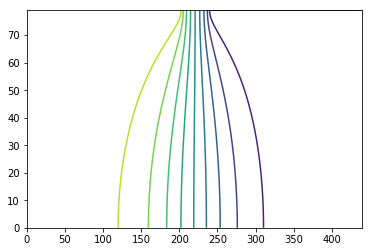

In [9]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
## Dam
ldam = 200
rdam = 240

## Head
h = np.zeros([80, 440])
lhead = 105
rhead = 80

# Error and tolerance
tolerance = 1.E-9
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

# Gauss-Seidel iteration
while error > tolerance:
    step = step + 1
    # Copy the head grid to residual
    residual = h.copy()
    
    b = np.zeros([80, 440])
    for i in range(0, nrows):
        for j in range(0, ncols):
            # Top left side of dam boundary assign head
            if i == 0 and j <= (ldam + 1):
                b[i,j] = lhead
            
            # Top boundary beneath the dam
            elif i == 0 and j > (ldam + 1) and j < (rdam + 1):
                b[i,j] = (h[i,j-1]+h[i,j+1]+2*h[i+1,j])/4;
            
            # Top right side of dam boundary assign head
            elif i == 0 and j > (rdam):
                b[i,j]= rhead
                
            # Left boundary
            elif j == 0 and i > 0 and i < (nrows -1):
                b[i,j]=(h[i-1,j]+h[i+1,j]+2*h[i,j+1])/4

            # Right boundary
            elif j == (ncols -1) and i > 0 and i < (nrows - 1):
                b[i,j]=(2*h[i,j-1]+h[i-1,j]+h[i+1,j])/4
            
            # Left bottom corner
            elif i == (nrows -1) and j == 0:
                b[i,j]=(h[i-1,j]+h[i,j+1])/2
            
            # Bottom boundary
            elif i == (nrows -1) and j > 0 and j < (ncols - 1):
                b[i,j]=(h[i,j-1]+h[i,j+1]+2*h[i-1,j])/4
            
            # Right bottom corner
            elif i == (nrows -1) and  j == (ncols -1):
                b[i,j]=(h[i,j-1]+h[i-1,j])/2
            
            # Domain
            else:
                b[i,j]=(h[i-1,j]+h[i+1,j]+h[i,j-1]+h[i,j+1])/4
    
    h = b.copy()
    # Error
    error = (np.square(np.subtract(h, residual))).max()
    print(step, error)

print('# of steps: %d, error: %le' %(step, error))
plt.contour(np.flipud(h), levels=10)